IA & Data science (LU3IN0226) -- 2023-2024
--------
*&copy; Equipe pédagogique: Téo Guichoux, Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# TD-TME11: projet final

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Abdallah Nassur et Lin-Jie Wu

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et **un seul rendu sur un des deux comptes Moodle doit être fait**.

Les groupes de plus de 2 personnes ne sont pas autorisés.

**Ce TD-TME11 est prévu pour être fait lors de la dernière séance de TD-TME11 de votre groupe.**

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *tme-11-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Le compte-rendu est soumis sur la page Moodle.**

# Projet 2 - avril-mai 2024


## Date de remise 

Le travail doit être rendu (sur le site Moodle) avant le <font size="+1" color="RED"><b>vendredi 17 mai 2024, à 18h</b></font>
    

<b>Il n'y aura pas d'extension de la date de remise autorisée : <font size="+1" color="RED">aucun rendu ne sera accepté après 18h.</font></b>

<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

## Travail à faire

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

Appliquer les algorithmes d'apprentissage non supervisés vus en cours (CAH et k-moyennes) sur les données comme décrit ci-dessous afin de mettre en évidence des résultats intéressants.


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *tme11-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et **seulement** les fichiers demandés.
- *Tous les fichiers demandés doivent être soumis avant la date limite*, le jour de la soutenance, vous pourrez fournir des versions (légèrement) modifiées.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mardi 21 mai 2024**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.


**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- tme-11/
              -- ce_notebook.ipynb

Les données seront chargées par les commandes de chargement des données fournies dans ce notebook (ci-dessous).

Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.



In [1]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Données pour le projet : Pen-Based Recognition of Handwritten Digits

documentation: <a href="https://archive.ics.uci.edu/dataset/81/pen+based+recognition+of+handwritten+digits" target="NEW">page UCI</a> (mais l'essentiel est donné ci-après).

Pour télécharger les données, la façon la plus simple est d'installer la librairie de l'UCI:

    pip install -U ucimlrepo

ensuite, on peut lancer la boîte suivante.

S'il n'est pas possible d'installer cette librairie, les données sont accessibles sur la page web citée ci-dessus (cliquer sur "Download" en haut et à droite de la page).

### Chargement des données

In [2]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
#list_available_datasets()

# import dataset
pen_dataset = fetch_ucirepo(id=81)

# access data
X = pen_dataset.data.features
y = pen_dataset.data.targets

# access metadata
print(pen_dataset.metadata.uci_id)
print(pen_dataset.metadata.num_instances)
print(pen_dataset.metadata.additional_info.summary)

# access variable info in tabular format
print(pen_dataset.variables)

81
10992
We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format.

We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds. 

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution.  Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to wr

### Apprentissage non-supervisé

Pour ce sujet, vous considèrerez seulement les données de description (features X) sur lesquelles vous proposerez des expérimentations des algorithmes d'apprentissage non-supervisé vus en cours mettant en évidence des clusters et leur évaluation.

Ainsi, vous devrez:
- étudier l'application d'un clustering hiérarchique et son résultat;
- étudier les résultats de l'application de l'algorithme des k-moyennes, pour différentes valeurs de k;
- proposer des évaluations des clusters trouvés afin de mettre en évidence les plus intéressants:
    - en utilisant les indices d'évaluation présentés en cours;
    - en comparant par diverses méthodes les clusters trouvés avec les vrais labels des classes (targets y).


   


### Le poster

Votre poster doit décrire de façon synthétique **l'ensemble des expérimentations** menées sur les données *Pen-Based Recognition of Handwritten Digits*, les résultats obtenus lors de l'apprentissage supervisé (études et résultats de votre TME-10) et lors de l'apprentissage non-supervisé (études et résultats de votre TME-11) ainsi que les conclusions/bilans que vous tirez de ces expérimentations (ie. ce que vous avez appris sur ces données).

*Remarque*: vous devez indiquer vos noms/prénoms et groupe (1, 2, ou 3) sur le poster.


In [3]:
X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,36,100,24,70,0,38,49,33,95,47,87,55,96,21,100,0
10988,16,75,41,100,52,64,32,27,0,0,21,9,62,2,100,14
10989,56,100,27,79,0,39,12,0,66,15,100,51,93,93,38,93
10990,19,100,0,61,3,23,48,0,97,27,100,66,62,97,10,81


## Expérimentations

*Réflexion préalable :*

Reconnaissance des chiffres manuscrits.

Il y'a 16 attributs formant 8 paires de coordonnées. Une fois ces 8 points reliés, ils représentent un chiffre manuscrit.

Absence de labels (correspondant au chiffre manuscrit).

Objectif : regrouper les exemples d'écriture selon le chiffre qu'ils représentent.

On veut donc regrouper en clusters. L'idéal serait d'obtenir 10 clusters (un pour chaque chiffre). Cependant cela peut être compliqué par : 

    - l'inertie intra-classe : les écritures d'un même chiffre doivent être suffisamment similaires pour les regrouper en un cluster -> on veut une inertie faible
    
    - distance inter-classes : les écritures de chiffres différents doivent être suffisamment distinctes pour les regrouper en clusters distincts -> on veut une distance moyenne élevée 

Procédure : 

    - normaliser le dataset (éventuellement réduire la dimensionalité)

    - appliquer l'algorithme de clustering hiérarchique ascendant (CHA) selon les 4 approches de linkage vus (centroid, complete, simple, average).

    Comment comparer les différentes approches ? 
    
        - visualisation des dendrogrammes : structures et cohérences des clusters formés

    - appliquer l'algorithme des k moyennes, avec k variant pour k clusters

################################################################

Comment faire un clustering hiérarchique ascendant ? 

    - initialise_CHA -> créer une partition avec autant de clusters que d'exemples
    - lancer CHA avec le linkage qu'on veut
    
Attention : CHA efficace sur un dataset assez réduit + calculs très coûteux $$(\geq O(n^2))$$

=> Envisager de réduire le nombre d'exemples traités et/ou leur dimensionalité
    
################################################################

################################################################

Comment faire un k-moyennes ? 

    - lancer kmoyennes avec nombre de clusters, data, eps et nb iter max
    
    Cette fonction fait : 
    
        - init_kmeans -> rends k exemples (centroïdes) aléatoires définissant les clusters
        
        - jusqu'à convergence ou iter max atteint : 
        
            - affecte_cluster -> rend la matrice d'affectation des exemples aux clusters
            
            - nouveaux_centroides : rend de nouveaux centroïdes (en faisant la moyenne des exemples de chaque cluster)
            
            - print (inertie_globale) -> somme des inerties de chaque cluster
            
Attention : 

    - risque de convergence de l'inertie globale vers un minimum local => 
    
        - faire plusieurs initialisations aléatoires donc lancer plusieurs fois kmoyennes pour un même k 
        
        - OU BIEN trouver un moyen de choisir intelligemment les centroïdes initiaux 
        
        - OU BIEN réduire la dimensionalité du dataset 
    
    - convergence peut être longue => bien choisir eps
                        
################################################################

### Diminution du dataset

La fonction suivante devrait nous permettre de pratiquer le CHA sur une partie du dataset

In [4]:
import random

# FONCTION POUR NE GARDER QU'UNE PARTIE DU DATASET (AVEC LE MÊME NOMBRE DE D'EXEMPLES PAR CLASSE)

def partitionneDonnee(X, Y, pourcentage):
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(Y, pd.DataFrame):
        Y = Y.values   
    
    sous_X = []
    sous_Y = []
    nb_total = len(X)
    nb_class = 10
    
    nb_par_classe = int((nb_total * (pourcentage/100)) // nb_class)
    
    for classe in range(nb_class):
        indices_classe = [i for i in range(nb_total) if Y[i][0] == classe]
        indices_melange = random.sample(indices_classe, nb_par_classe)
        sous_X += [X[i] for i in indices_melange]
        sous_Y += [Y[i][0] for i in indices_melange]
    
    return sous_X, sous_Y

### Visualisation des données : Réduction 16-D => 2D

[[ 0.18074264  0.11754863 -0.16373073 -0.5329954   0.04152023  0.54560639
   0.34065406 -0.08299738  0.09236442  0.28267796  0.26962819  0.09045689
  -0.2006627  -0.09886322  0.02803139  0.01155448]
 [ 0.39435471  0.15358139  0.03752916 -0.18421414 -0.02011339  0.02241599
  -0.13285612 -0.00918026 -0.62531895 -0.12334379  0.2185733  -0.38925566
   0.35298403  0.02930906 -0.15816659 -0.10443483]
 [ 0.19214373 -0.1755822   0.0405091  -0.2823012   0.27782242 -0.05803863
   0.15134203  0.65084036  0.22738056  0.07503826 -0.32206755 -0.02003299
   0.32485968  0.2017248  -0.1039368  -0.0733097 ]
 [ 0.39138957 -0.09574487  0.14131942 -0.22608209 -0.03060081  0.04913658
  -0.2373256  -0.06025975 -0.2194607  -0.18882191 -0.45957195  0.15772735
  -0.38262965  0.13722946  0.36056918  0.29683131]
 [ 0.23503408 -0.23801336  0.2578876   0.17483899  0.57325143 -0.2843133
   0.04670275  0.06379148 -0.08555818  0.26905197  0.34547564 -0.07547616
  -0.28350958 -0.26557172  0.10361422  0.09450407]
 [ 0.3

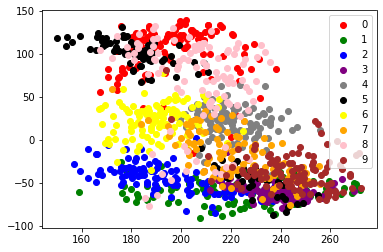

In [5]:
from itertools import cycle

Xpartitionne10, ypartitionne10 = partitionneDonnee(X, y, 10)

ypartitionne10 = np.array(ypartitionne10)
Xpartitionne10 = np.array(Xpartitionne10)

# 1) calcul des vecteurs propres

lam, V = np.linalg.eig(X.T@X)

# 2) affichage (print)

print(V)
# 3) tri et sélection des 2 vecteurs associés aux 2 plus grandes valeurs propres
indexes_tries = np.argsort(lam)[::-1]
#print(indexes_tries)

V2_max = V[:, indexes_tries[:2]]

#print(main_V1,main_V2)

# 4) affichage (plot) avec un code couleur pour les classes
projected_data = Xpartitionne10.dot(V2_max)


#plt.scatter(projected_data[:,0], projected_data[:,1], label='Points de données', c=Yu[:200], cmap='viridis', marker='o')
colors = cycle(['red', 'green', 'blue', 'purple', 'grey', 'black', 'yellow', 'orange', 'pink', 'brown'])
for i, c in zip(range(len(np.unique(ypartitionne10))), colors):
    class_data = projected_data[ypartitionne10 == i]
    plt.scatter(class_data[:, 0], class_data[:, 1], c=c, marker='o', label=f'Classe {i}')

# ####################################
plt.legend(np.arange(10))

### Calcul de l'indice de Dunn

C'est le rapport entre la distance maximum qui sépare deux éléments classés ensemble et la distance minimum qui sépare deux éléments classés séparément.

Une valeur d'indice Dunn plus élevée indique des clusters mieux définis avec une plus grande séparation entre eux.

In [6]:
# CALCUL DE LA DISTANCE MINIMUM ENTRE 2 CENTROIDES DE CLUSTERS

def min_dist_inter_clusters(dataset, clusters) : 
    liste_dist = []
    
    centroides_clusters = [clust.centroide(dataset[value]) for value in clusters.values()]
    
    dist_min = -1
    
    for i in range(len(centroides_clusters)):
        for j in range(i + 1, len(centroides_clusters)):  # Seulement les paires distinctes
            # Calculer la distance euclidienne entre les points
            distance = clust.dist_euclidienne(centroides_clusters[i], centroides_clusters[j])
            # Mettre à jour la distance minimale si la distance est plus petite
            if distance < dist_min or dist_min == -1:
                dist_min = distance

    return dist_min
        

In [7]:
#print(np.array(Xpartitionne2)[0])
#print(min_dist_inter_clusters(np.array(Xpartitionne2), l_affectation))

In [8]:
# CALCUL DE LA DISTANCE MAXIMUM ENTRE 2 POINTS D'UN MEME CLUSTER

def max_dist_intra_cluster(dataset, clusters) :  
    max_dist = -1
    
    for cluster in clusters.values():
        points = dataset[cluster]
        centroid = clust.centroide(points)
        distances = clust.dist_euclidienne(points, centroid)  # Calculer les distances de chaque point au centroïde
        max_intra_cluster_dist = np.max(distances)  # Trouver la distance maximale à l'intérieur du cluster
        
        if max_intra_cluster_dist > max_dist:
            max_dist = max_intra_cluster_dist

    return max_dist

In [9]:
#print(max_dist_intra_cluster(np.array(Xpartitionne2), l_affectation))

In [10]:
# CALCUL DE L'INDICE DE DUNN

def Dunn(dataset, clusters) : 
    min_inter_clusters_dist = min_dist_inter_clusters(dataset, clusters)
    max_intra_cluster_dist = max_dist_intra_cluster(dataset, clusters)
    
    dunn = min_inter_clusters_dist / max_intra_cluster_dist
    return dunn

In [11]:
#print(Dunn(np.array(Xpartitionne2), l_affectation))

### Evaluation de l'attribution des clusters

In [12]:
# OBTENIR LE LABEL MAJORITAIRE D'UN CLUSTER OU SON NOMBRE D'OCCURENCES

from collections import Counter

def entier_plus_occurrences(liste):
    # Compter le nombre d'occurrences de chaque entier dans la liste
    occurrences = Counter(liste)
    # Récupérer l'entier avec le plus d'occurrences et son nombre d'occurrences
    entier_max_occurrences, max_occurrences = occurrences.most_common(1)[0]
    return entier_max_occurrences

def nb_plus_occurrences(liste):
    # Compter le nombre d'occurrences de chaque entier dans la liste
    occurrences = Counter(liste)
    # Récupérer l'entier avec le plus d'occurrences et son nombre d'occurrences
    entier_max_occurrences, max_occurrences = occurrences.most_common(1)[0]
    return max_occurrences




In [13]:
# ON REATTRIBUE LES CLES DES CLUSTERS EN FONCTION DU LABEL MAJORITAIRE

def key_clust(clusters, label_set): 
    new_dict = {}
    
    if isinstance(label_set, pd.DataFrame):
        label_set = label_set.values
    
    for cluster in clusters.values() : 
        labels = [label_set[i] for i in cluster]
        
        k = entier_plus_occurrences(labels)
        
        new_dict[k] = cluster
        
    return new_dict



#### Précision, Rappel et Score F1

Précision : mesure la proportion d'échantillons correctement attribués à un cluster parmi tous les échantillons attribués à ce cluster.

Rappel : mesure la proportion d'échantillons correctement attribués à un cluster parmi tous les échantillons qui sont censés être dans ce cluster selon les vrais labels.

Score F1 : représente la moyenne harmonique de la précision et du rappel.

In [14]:
# CALCUL PRECISION ET RAPPEL

def precision_clusters(clusters, label_set) : 
    
    new_dict = {}
    
    if isinstance(label_set, pd.DataFrame):
        label_set = label_set.values
    
    for k,cluster in clusters.items() : 
        labels = [label_set[i] for i in cluster]
        
        nb_max = nb_plus_occurrences(labels)
        
        new_dict[k] = (nb_max, nb_max / len(cluster))
        
    return new_dict
    

def rappel_clusters(clusters, label_set) :     
    
    new_dict = {}
    
    if isinstance(label_set, pd.DataFrame):
        label_set = label_set.values
        
    for k,cluster in clusters.items() :
        taille_classe = np.count_nonzero(label_set == k)
        
        labels = [label_set[i] for i in cluster]
        
        nb_max = nb_plus_occurrences(labels)
        
        new_dict[k] = (nb_max, nb_max / taille_classe)
        
    return new_dict

In [15]:
# SCORE F1 = moyenne harmonique de la précision et du rappel
# formule : (2 * precision * rappel) / (precision + rappel)

def scoreF1 (clusters, label_set) : 
    
    precision = precision_clusters(clusters, label_set)
    rappel = rappel_clusters(clusters, label_set)
    
    new_dict = {k: ((2*(precision[k])[1]*(rappel[k])[1])/((precision[k])[1]+(rappel[k])[1])) for k in precision}
    
    return new_dict

#### Accuracy

A quel point le clustering dans son ensemble est correct ? 

In [16]:
# CALCUL DE LA PRECISION DU CLUSTERING 

def accuracy(label_set, clusters):
    if isinstance(label_set, pd.DataFrame):
        label_set = label_set.values
    
    n_total = np.size(label_set)
    nb_accurate = 0
    
    for k,cluster in clusters.items(): 
        for i in cluster : 
            if label_set[i] == k : 
                nb_accurate += 1
                
    return nb_accurate / n_total

### Clustering hiérarchique ascendant

A cause de la complexité algorithmique du CHA, nous allons réduire le dataset à 0,5%, c'est à dire 50 écritures avec 5 de chaque classe (5 par chiffres). 

De plus, nous allons utiliser une version modifiée des fonctions CHA, qui nous permet d'obtenir les clusters formés quand il y en a 10. (les fonctions sont dans Clustering.py) 

In [17]:

Xpartitionne, ypartitionne = partitionneDonnee(X, y, 1/2)
attributs = ['Attribute1', 'Attribute2','Attribute3','Attribute4','Attribute5','Attribute6','Attribute7','Attribute8','Attribute9','Attribute10','Attribute11','Attribute12','Attribute13','Attribute14','Attribute15', 'Attribute16']

Xpartitionne = np.array(Xpartitionne)
Xpartitionne = pd.DataFrame(Xpartitionne, columns= attributs)
Xpartitionne

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16
0,27,82,3,47,13,6,67,0,100,34,96,76,51,100,0,82
1,23,100,0,58,8,12,58,0,99,29,100,75,56,100,14,78
2,0,39,2,62,11,5,63,0,100,43,89,99,36,100,0,57
3,18,95,6,63,16,11,65,0,100,40,84,90,31,100,0,57
4,27,100,6,95,0,42,30,0,79,4,100,51,74,96,24,98
5,0,72,32,100,45,99,42,68,39,37,20,7,26,2,100,0
6,0,40,32,59,71,82,100,100,85,75,71,50,64,25,75,0
7,0,52,31,78,60,100,56,61,56,22,33,2,55,0,100,2
8,0,40,35,58,67,80,100,100,86,78,68,52,49,27,38,0
9,0,75,29,79,71,91,100,100,82,74,68,48,57,21,58,0


#### CHA Centroid

Groupes résultants avec 10 clusters :
{1: [0, 1, 2, 3, 4], 4: [5, 7, 10, 11, 12, 13, 14, 37, 38], 5: [6, 8, 9, 15, 16, 17, 18, 19, 28, 35, 39, 41, 45, 46, 47, 48, 49], 6: [20, 21, 23, 24], 7: [22], 3: [25, 26, 27, 36], 9: [29], 8: [30, 31, 32, 33, 34], 2: [40, 42, 43, 44]}


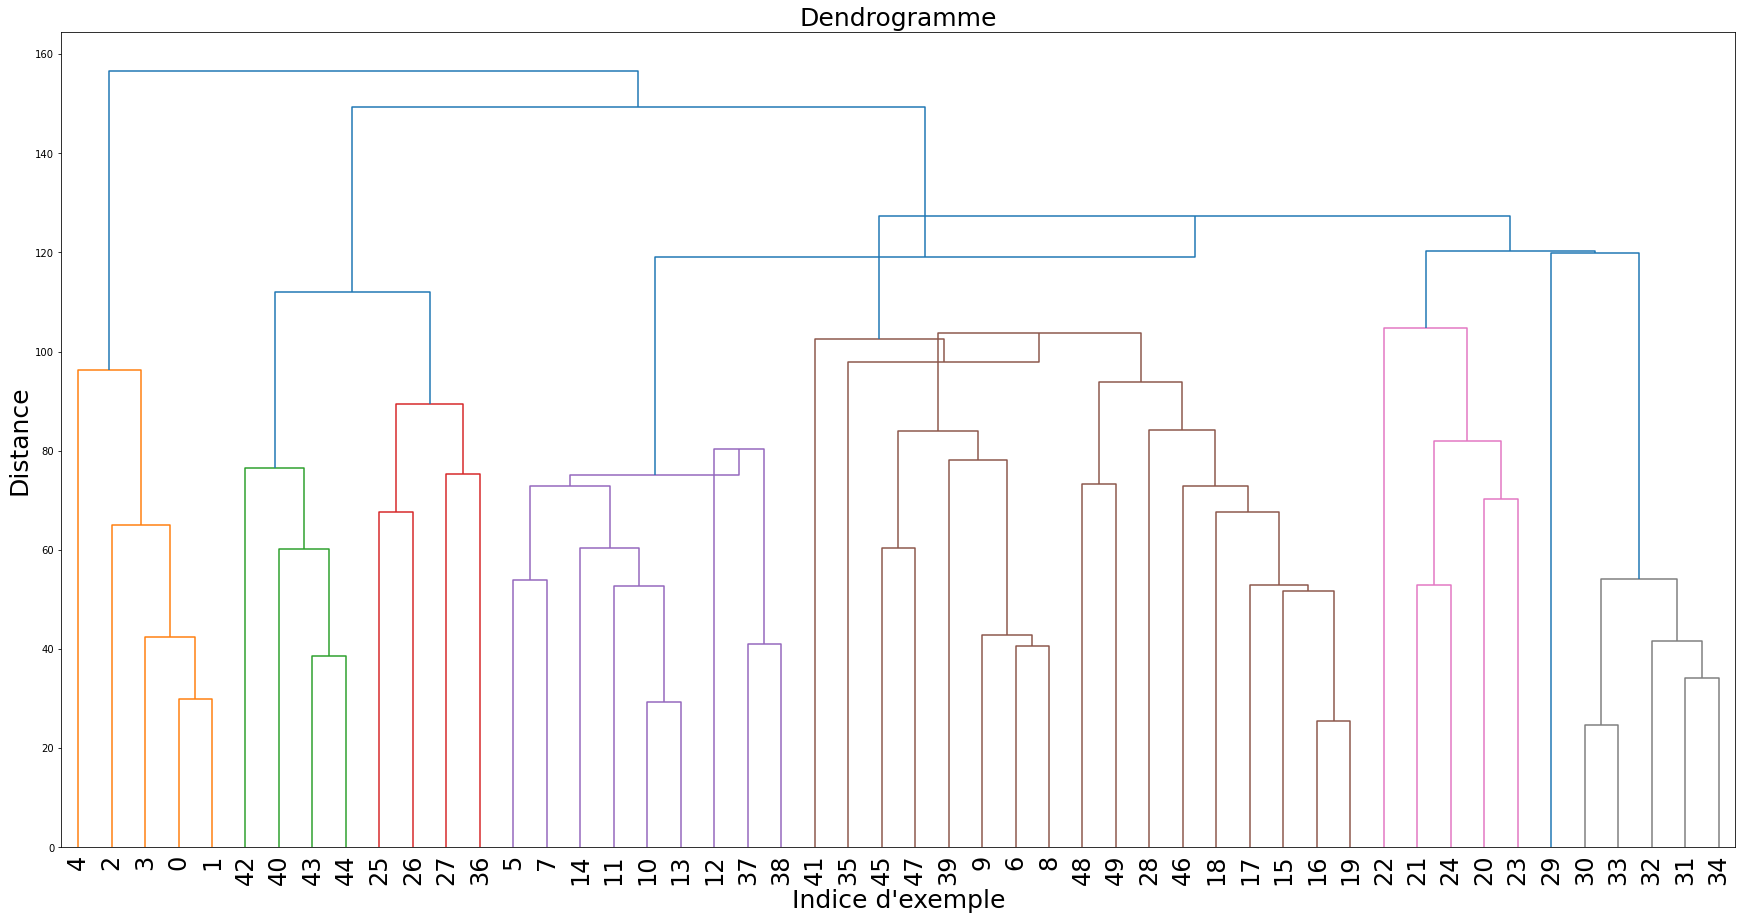

Clustering réalisé en : 8.0794 secondes.


In [18]:
tic = time.time()  # On lance le chrono
_,clusters = clust.CHA_centroid10(Xpartitionne, verbose=False,dendrogramme=True)
toc = time.time()  # On arrête le chrono

tempsCentroid = toc-tic

print(f'Clustering réalisé en : {(toc-tic):0.4f} secondes.')

In [19]:
# INDICE DE DUNN DU CLUSTER OBTENU

dunn_index_centroid = Dunn(np.array(Xpartitionne), clusters)

print("indice de Dunn : ", dunn_index_centroid)

indice de Dunn :  0.3153392886509454


In [20]:
# EVALUATION DE L'ATTRIBUTION DES CLUSTERS

nouveau_dict = key_clust(clusters, ypartitionne)

precisionCentroid = precision_clusters(nouveau_dict, ypartitionne)
rappelCentroid = rappel_clusters(nouveau_dict, ypartitionne)
F1_Centroid = scoreF1(nouveau_dict, ypartitionne)
accuracyCentroid = accuracy(ypartitionne, nouveau_dict)

print("labels prédits sur les clusters : ", nouveau_dict)
print()
print("précision : ", precisionCentroid)
print()
print("rappel : ", rappelCentroid)
print()
print("scoreF1 : ", F1_Centroid)
print()
print("accuracy : ",accuracyCentroid)

labels prédits sur les clusters :  {0: [0, 1, 2, 3, 4], 2: [5, 7, 10, 11, 12, 13, 14, 37, 38], 3: [6, 8, 9, 15, 16, 17, 18, 19, 28, 35, 39, 41, 45, 46, 47, 48, 49], 4: [22], 5: [29], 6: [30, 31, 32, 33, 34], 8: [40, 42, 43, 44]}

précision :  {0: (5, 1.0), 2: (5, 0.5555555555555556), 3: (5, 0.29411764705882354), 4: (1, 1.0), 5: (1, 1.0), 6: (5, 1.0), 8: (4, 1.0)}

rappel :  {0: (5, 1.0), 2: (5, 1.0), 3: (5, 1.0), 4: (1, 0.2), 5: (1, 0.2), 6: (5, 1.0), 8: (4, 0.8)}

scoreF1 :  {0: 1.0, 2: 0.7142857142857143, 3: 0.45454545454545453, 4: 0.33333333333333337, 5: 0.33333333333333337, 6: 1.0, 8: 0.888888888888889}

accuracy :  0.52


#### CHA Simple

Groupes résultants avec 10 clusters :
{2: [0, 1, 2, 3, 4], 4: [5, 7, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 25, 26, 27, 36, 37, 38], 6: [6, 8, 9, 39, 45, 47], 8: [15, 16, 17, 18, 19, 28, 46], 9: [29], 1: [30, 31, 32, 33, 34], 5: [35], 3: [40, 42, 43, 44], 10: [41], 7: [48, 49]}


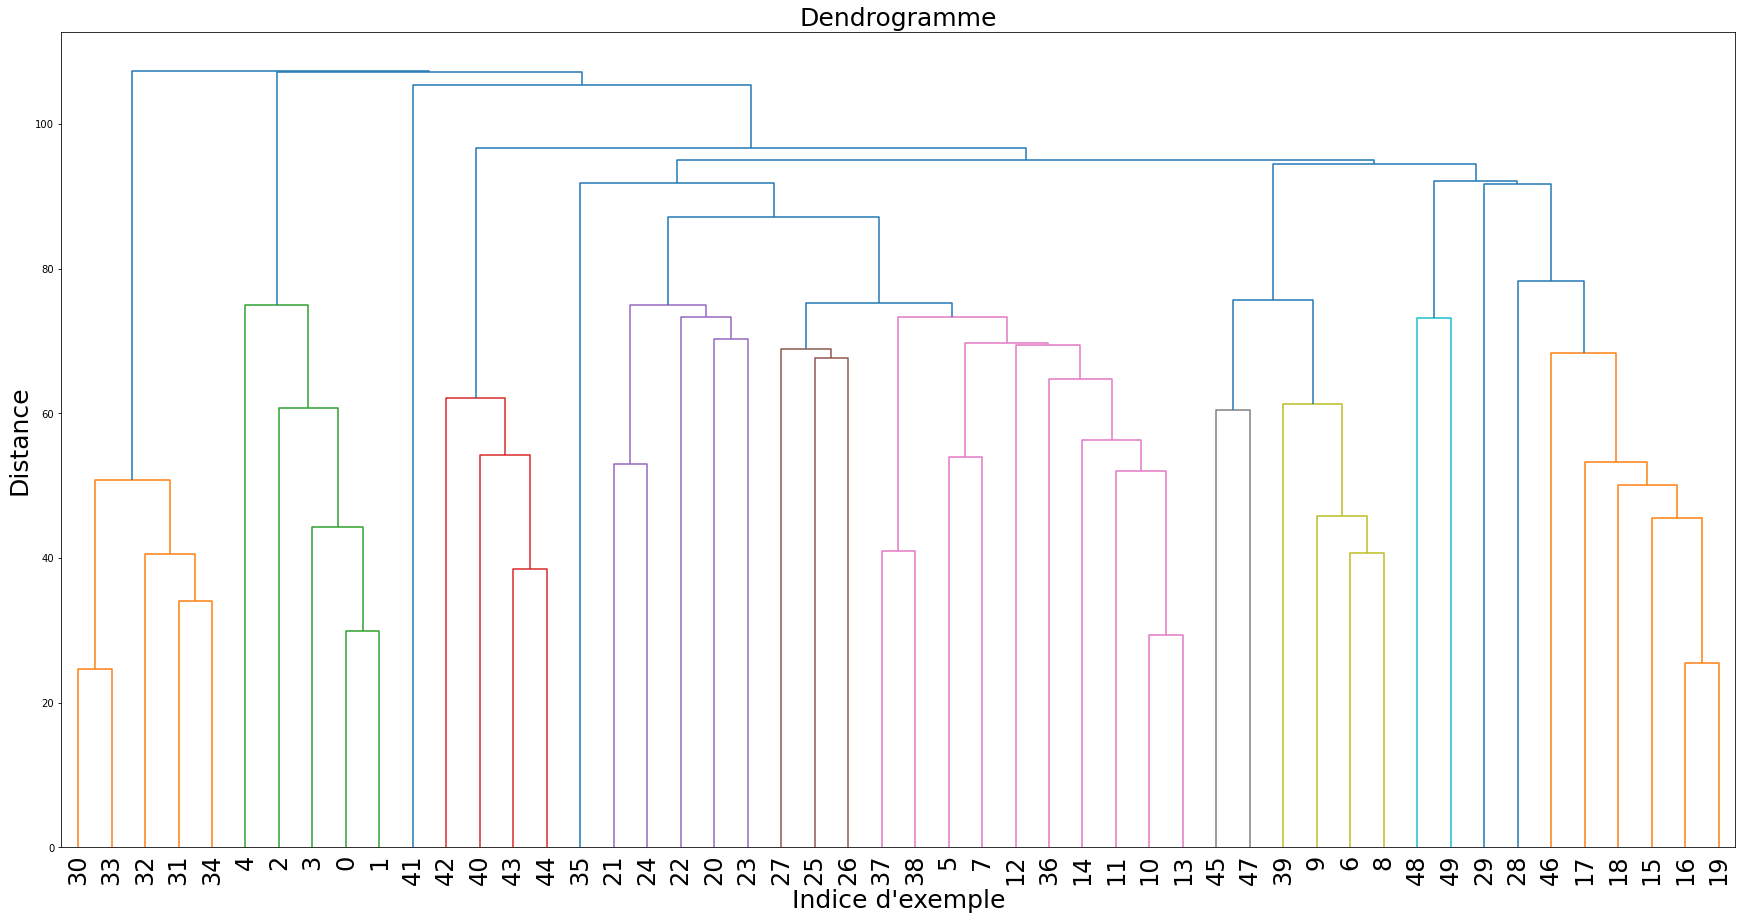

Clustering réalisé en : 8.3490 secondes.


In [21]:
tic = time.time()  # On lance le chrono
_,clusters2 = clust.CHA_simple10(Xpartitionne, verbose=False,dendrogramme=True)
toc = time.time()  # On arrête le chrono

tempsSimple = toc-tic

print(f'Clustering réalisé en : {(toc-tic):0.4f} secondes.')

In [22]:
# INDICE DE DUNN DU CLUSTER OBTENU

dunn_index_simple = Dunn(np.array(Xpartitionne), clusters2)

print("indice de Dunn : ", dunn_index_simple)

indice de Dunn :  0.23606933718019119


In [23]:
# EVALUATION DE L'ATTRIBUTION DES CLUSTERS

nouveau_dict = key_clust(clusters2, ypartitionne)

precisionSimple = precision_clusters(nouveau_dict, ypartitionne)
rappelSimple = rappel_clusters(nouveau_dict, ypartitionne)
F1_Simple = scoreF1(nouveau_dict, ypartitionne)
accuracySimple = accuracy(ypartitionne, nouveau_dict)

print("labels prédits sur les clusters : ", nouveau_dict)
print()
print("précision : ", precisionSimple)
print()
print("rappel : ", rappelSimple)
print()
print("scoreF1 : ", F1_Simple)
print()
print("accuracy : ", accuracySimple)

labels prédits sur les clusters :  {0: [0, 1, 2, 3, 4], 2: [5, 7, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 25, 26, 27, 36, 37, 38], 1: [6, 8, 9, 39, 45, 47], 3: [15, 16, 17, 18, 19, 28, 46], 5: [29], 6: [30, 31, 32, 33, 34], 7: [35], 8: [41], 9: [48, 49]}

précision :  {0: (5, 1.0), 2: (5, 0.2777777777777778), 1: (3, 0.5), 3: (5, 0.7142857142857143), 5: (1, 1.0), 6: (5, 1.0), 7: (1, 1.0), 8: (1, 1.0), 9: (2, 1.0)}

rappel :  {0: (5, 1.0), 2: (5, 1.0), 1: (3, 0.6), 3: (5, 1.0), 5: (1, 0.2), 6: (5, 1.0), 7: (1, 0.2), 8: (1, 0.2), 9: (2, 0.4)}

scoreF1 :  {0: 1.0, 2: 0.4347826086956522, 1: 0.5454545454545454, 3: 0.8333333333333333, 5: 0.33333333333333337, 6: 1.0, 7: 0.33333333333333337, 8: 0.33333333333333337, 9: 0.5714285714285715}

accuracy :  0.56


#### CHA Complete

Groupes résultants avec 10 clusters :
{1: [0, 1, 2, 3, 4], 7: [5, 7, 12, 35, 37, 38], 9: [6, 8, 9, 39, 45, 47], 6: [10, 11, 13, 14], 8: [15, 16, 17, 18, 19, 46, 48, 49], 5: [20, 21, 22, 23, 24], 3: [25, 26, 27, 36], 4: [28, 29, 30, 31, 32, 33, 34], 2: [40, 42, 43, 44], 10: [41]}


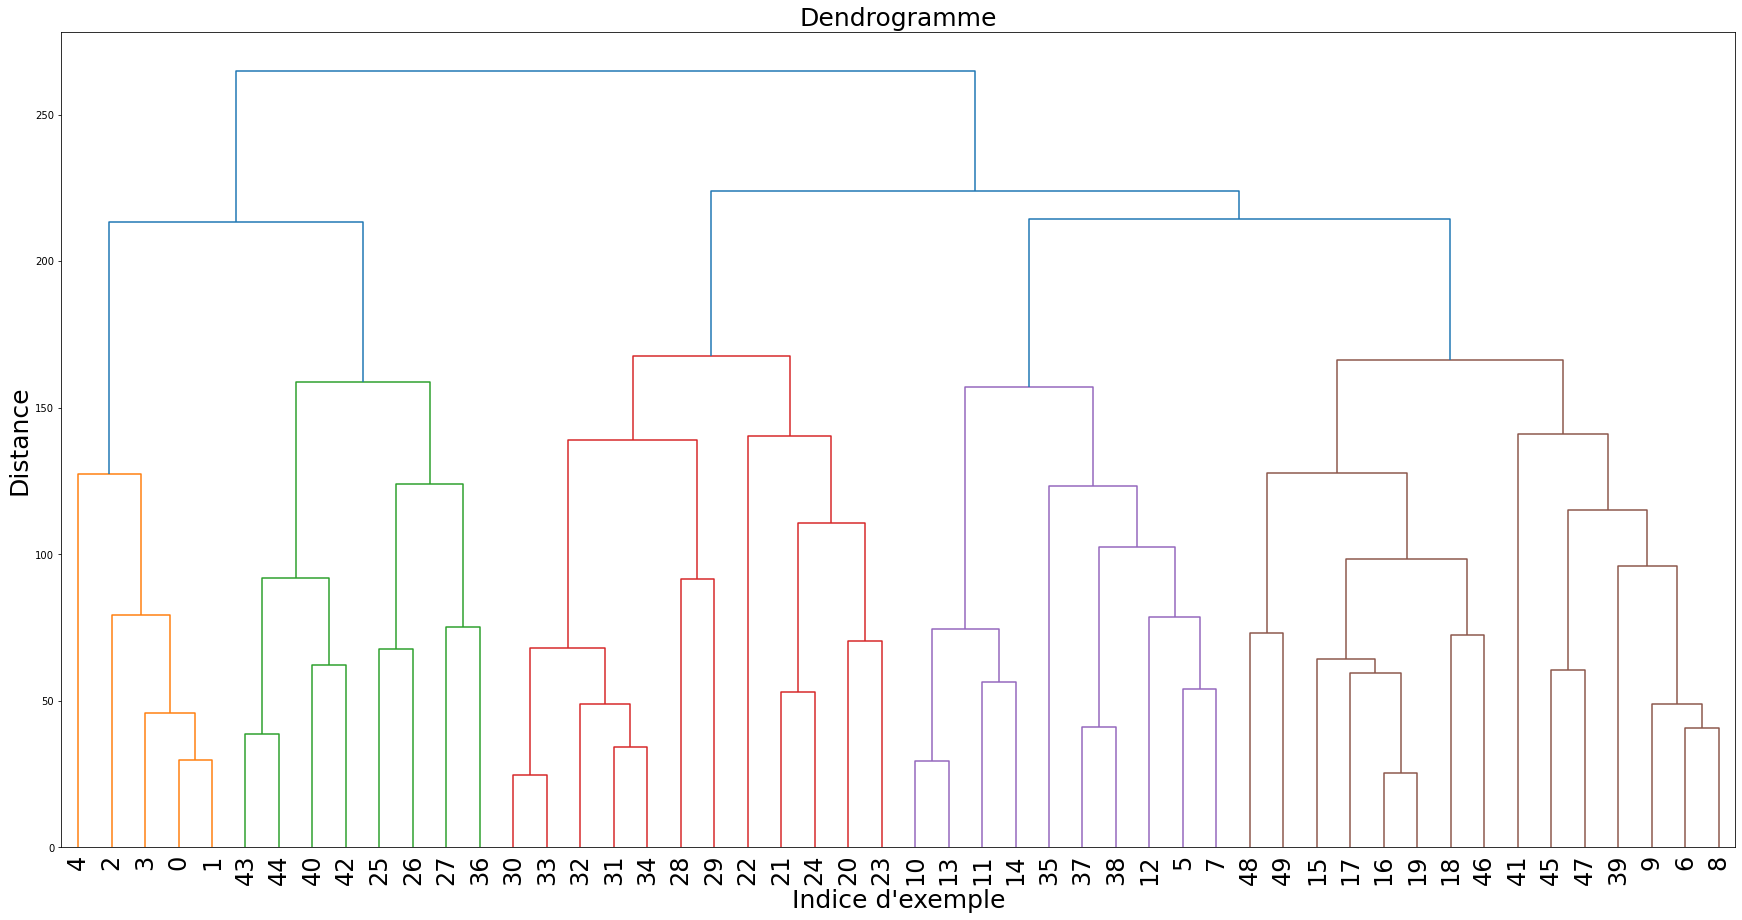

Clustering réalisé en : 7.9963 secondes.


In [24]:
tic = time.time()  # On lance le chrono
_,clusters3 = clust.CHA_complete10(Xpartitionne, verbose=False,dendrogramme=True)
toc = time.time()  # On arrête le chrono

tempsComplete = toc-tic

print(f'Clustering réalisé en : {(toc-tic):0.4f} secondes.')

In [25]:
# INDICE DE DUNN DU CLUSTER OBTENU

dunn_index_complete = Dunn(np.array(Xpartitionne), clusters3)

print("indice de Dunn : ", dunn_index_complete)

indice de Dunn :  0.4668250253299942


In [26]:
# EVALUATION DE L'ATTRIBUTION DES CLUSTERS

nouveau_dict = key_clust(clusters3, ypartitionne)

precisionComplete = precision_clusters(nouveau_dict, ypartitionne)
rappelComplete = rappel_clusters(nouveau_dict, ypartitionne)
F1_Complete = scoreF1(nouveau_dict, ypartitionne)
accuracyComplete = accuracy(ypartitionne, nouveau_dict)

print("labels prédits sur les clusters : ", nouveau_dict)
print()
print("précision : ", precisionComplete)
print()
print("rappel : ", rappelComplete)
print()
print("scoreF1 : ", F1_Complete)
print()
print("accuracy : ",accuracyComplete)

labels prédits sur les clusters :  {0: [0, 1, 2, 3, 4], 7: [5, 7, 12, 35, 37, 38], 1: [6, 8, 9, 39, 45, 47], 2: [10, 11, 13, 14], 3: [15, 16, 17, 18, 19, 46, 48, 49], 4: [20, 21, 22, 23, 24], 5: [25, 26, 27, 36], 6: [28, 29, 30, 31, 32, 33, 34], 8: [41]}

précision :  {0: (5, 1.0), 7: (3, 0.5), 1: (3, 0.5), 2: (4, 1.0), 3: (5, 0.625), 4: (5, 1.0), 5: (3, 0.75), 6: (5, 0.7142857142857143), 8: (1, 1.0)}

rappel :  {0: (5, 1.0), 7: (3, 0.6), 1: (3, 0.6), 2: (4, 0.8), 3: (5, 1.0), 4: (5, 1.0), 5: (3, 0.6), 6: (5, 1.0), 8: (1, 0.2)}

scoreF1 :  {0: 1.0, 7: 0.5454545454545454, 1: 0.5454545454545454, 2: 0.888888888888889, 3: 0.7692307692307693, 4: 1.0, 5: 0.6666666666666665, 6: 0.8333333333333333, 8: 0.33333333333333337}

accuracy :  0.68


#### CHA Average

Groupes résultants avec 10 clusters :
{8: [0, 1, 2, 3, 4], 4: [5, 7, 10, 11, 12, 13, 14, 37, 38], 6: [6, 8, 9, 39, 45, 47], 5: [15, 16, 17, 18, 19, 35, 46, 48, 49], 1: [20, 21, 22, 23, 24], 10: [25, 26, 27, 36], 3: [28, 29], 2: [30, 31, 32, 33, 34], 9: [40, 42, 43, 44], 7: [41]}


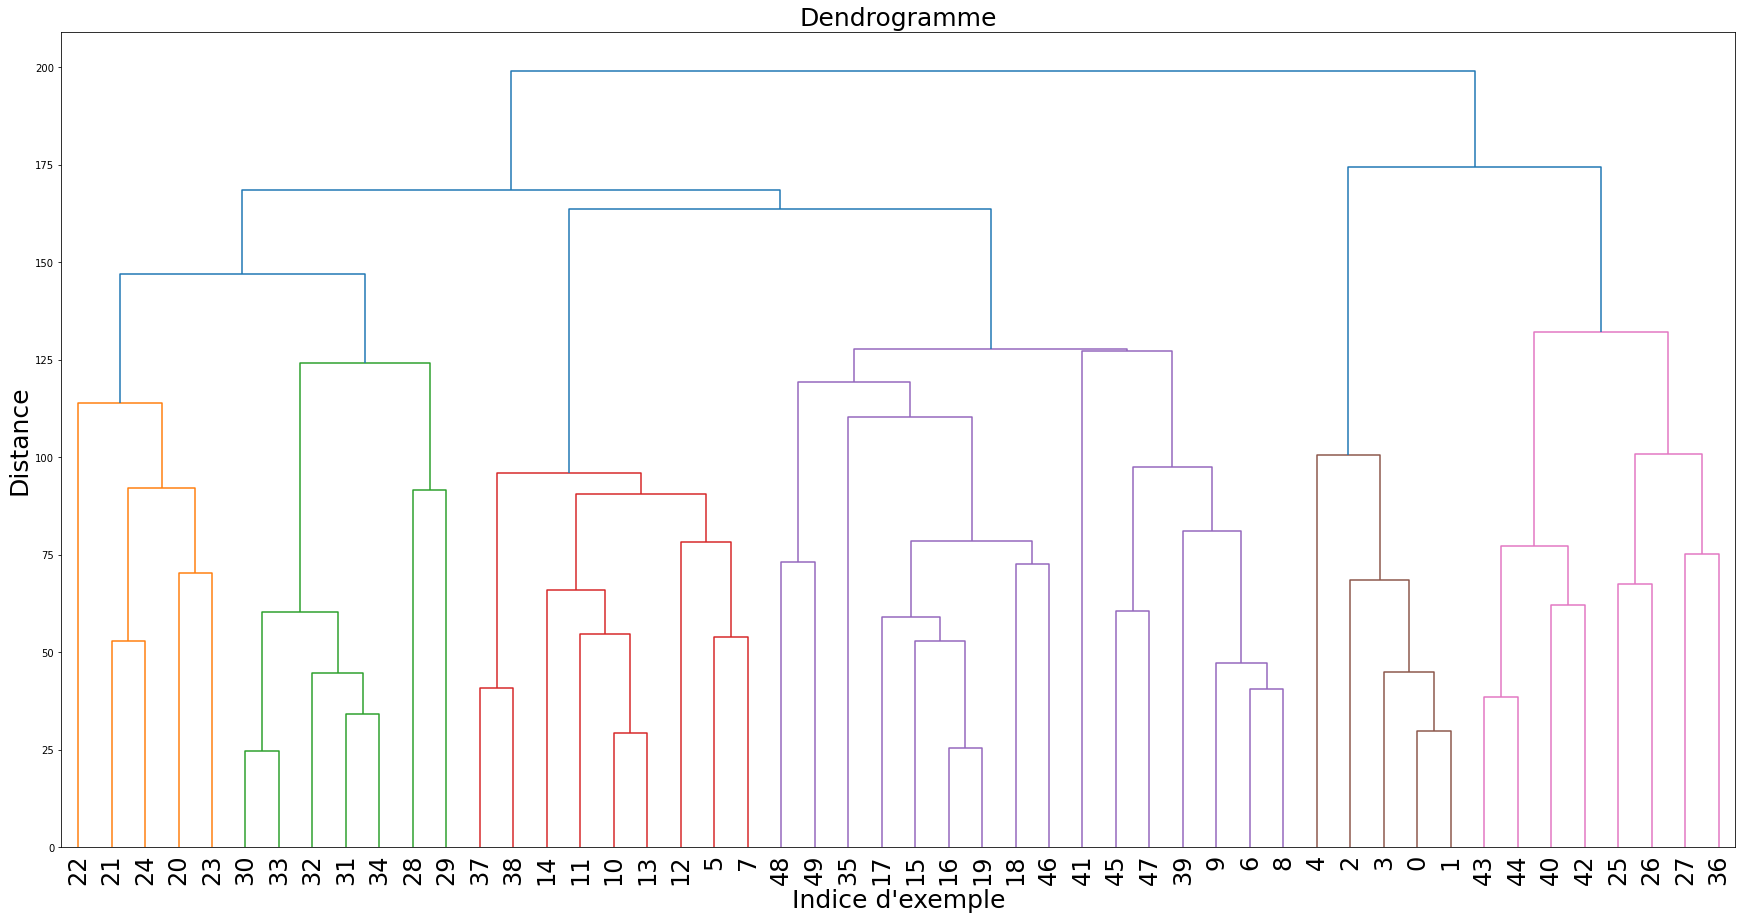

Clustering réalisé en : 7.1350 secondes.


In [27]:
tic = time.time()  # On lance le chrono
_,clusters4 = clust.CHA_average10(Xpartitionne, verbose=False,dendrogramme=True)
toc = time.time()  # On arrête le chrono

tempsAverage = toc-tic

print(f'Clustering réalisé en : {(toc-tic):0.4f} secondes.')

In [28]:
# INDICE DE DUNN DU CLUSTER OBTENU

dunn_index_average = Dunn(np.array(Xpartitionne), clusters4)

print("indice de Dunn : ", dunn_index_average)

indice de Dunn :  0.47911927546078326


In [29]:
# EVALUATION DE L'ATTRIBUTION DES CLUSTERS

nouveau_dict = key_clust(clusters4, ypartitionne)

precisionAverage = precision_clusters(nouveau_dict, ypartitionne)
rappelAverage = rappel_clusters(nouveau_dict, ypartitionne)
F1_Average = scoreF1(nouveau_dict, ypartitionne)
accuracyAverage = accuracy(ypartitionne, nouveau_dict)

print("labels prédits sur les clusters : ", nouveau_dict)
print()
print("précision : ", precisionAverage)
print()
print("rappel : ", rappelAverage)
print()
print("scoreF1 : ", F1_Average)
print()
print("accuracy : ",accuracyAverage)

labels prédits sur les clusters :  {0: [0, 1, 2, 3, 4], 2: [5, 7, 10, 11, 12, 13, 14, 37, 38], 1: [6, 8, 9, 39, 45, 47], 3: [15, 16, 17, 18, 19, 35, 46, 48, 49], 4: [20, 21, 22, 23, 24], 5: [28, 29], 6: [30, 31, 32, 33, 34], 8: [41]}

précision :  {0: (5, 1.0), 2: (5, 0.5555555555555556), 1: (3, 0.5), 3: (5, 0.5555555555555556), 4: (5, 1.0), 5: (2, 1.0), 6: (5, 1.0), 8: (1, 1.0)}

rappel :  {0: (5, 1.0), 2: (5, 1.0), 1: (3, 0.6), 3: (5, 1.0), 4: (5, 1.0), 5: (2, 0.4), 6: (5, 1.0), 8: (1, 0.2)}

scoreF1 :  {0: 1.0, 2: 0.7142857142857143, 1: 0.5454545454545454, 3: 0.7142857142857143, 4: 1.0, 5: 0.5714285714285715, 6: 1.0, 8: 0.33333333333333337}

accuracy :  0.62


### Comparaison des différents Clustering

#### Indice de Dunn

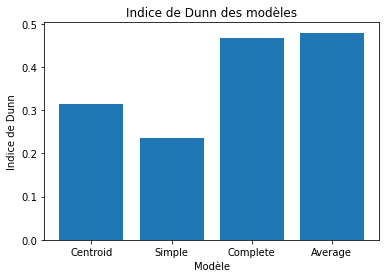

In [30]:
# Histogramme avec les 4 modèles
modeles = ['Centroid', 'Simple', 'Complete', 'Average']
liste_dunn = [dunn_index_centroid, dunn_index_simple, dunn_index_complete, dunn_index_average]  # Valeurs associées à chaque catégorie

# Création de l'histogramme
plt.bar(modeles, liste_dunn)

# Ajout de labels et de titres
plt.xlabel('Modèle')
plt.ylabel('Indice de Dunn')
plt.title("Indice de Dunn des modèles")

# Affichage de l'histogramme
plt.show()

Observation : le CHA Complete possède ici le meilleur indice de Dunn, indiquant une qualité de clustering supérieure aux autres modèles.

Au contraire le CHA Simple a le plus faible indice de Dunn, montrant que les clusters n'y sont pas bien séparés et/ou les points en leur sein ne sont pas très rapprochés.

#### Accuracy des clusters

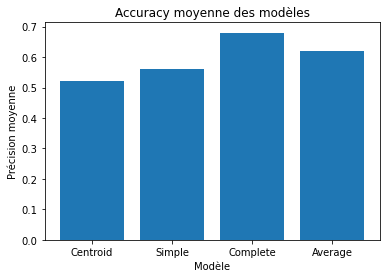

In [31]:
# Histogramme avec les 4 modèles
modeles = ['Centroid', 'Simple', 'Complete', 'Average']
liste_accuracies = [accuracyCentroid, accuracySimple, accuracyComplete, accuracyAverage]  # Valeurs associées à chaque catégorie

# Création de l'histogramme
plt.bar(modeles, liste_accuracies)

# Ajout de labels et de titres
plt.xlabel('Modèle')
plt.ylabel('Précision moyenne')
plt.title("Accuracy moyenne des modèles")

# Affichage de l'histogramme
plt.show()

Observation : le CHA Complete semble supérieur aux autres sur cet échantillons en ce qui concerne la bonne classification générale des écritures.

#### Précision

{0: (5, 1.0), 2: (5, 0.5555555555555556), 3: (5, 0.29411764705882354), 4: (1, 1.0), 5: (1, 1.0), 6: (5, 1.0), 8: (4, 1.0)} 
 {0: (5, 1.0), 1: (3, 0.5), 2: (5, 0.2777777777777778), 3: (5, 0.7142857142857143), 5: (1, 1.0), 6: (5, 1.0), 7: (1, 1.0), 8: (1, 1.0), 9: (2, 1.0)} 
 {0: (5, 1.0), 1: (3, 0.5), 2: (4, 1.0), 3: (5, 0.625), 4: (5, 1.0), 5: (3, 0.75), 6: (5, 0.7142857142857143), 7: (3, 0.5), 8: (1, 1.0)} 
 {0: (5, 1.0), 1: (3, 0.5), 2: (5, 0.5555555555555556), 3: (5, 0.5555555555555556), 4: (5, 1.0), 5: (2, 1.0), 6: (5, 1.0), 8: (1, 1.0)}


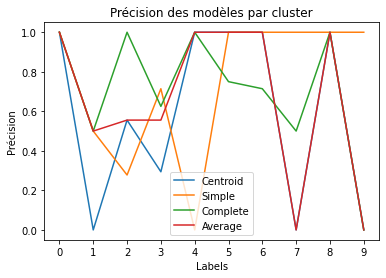

In [32]:
centroid_trie = {cle: precisionCentroid[cle] for cle in sorted(precisionCentroid)}
simple_trie = {cle: precisionSimple[cle] for cle in sorted(precisionSimple)}
complete_trie = {cle: precisionComplete[cle] for cle in sorted(precisionComplete)}
average_trie = {cle: precisionAverage[cle] for cle in sorted(precisionAverage)}

donnees = [centroid_trie, simple_trie, complete_trie, average_trie]

print(centroid_trie, "\n", simple_trie, "\n", complete_trie, "\n", average_trie)

# Création de listes pour stocker les valeurs des clés et les valeurs des plots
cles = []
valeurs = []

# Parcourir chaque dictionnaire
for dic in donnees:
    # Ajouter les clés manquantes avec des valeurs nulles
    for i in range(10):
        if i not in dic:
            dic[i] = (0,0.0)
    
    # Trier le dictionnaire par les clés et récupérer les valeurs
    valeurs_cles_triees = sorted(dic.items())
    cles_d, vals_d = zip(*valeurs_cles_triees)
    
    # Ajouter les valeurs des clés et des plots dans les listes
    cles.append(list(cles_d))
    valeurs.append([v[1] for v in vals_d])

# Tracer le graphique
plt.plot(cles[0], valeurs[0], label="Centroid")
plt.plot(cles[1], valeurs[1], label="Simple")
plt.plot(cles[2], valeurs[2], label="Complete")
plt.plot(cles[3], valeurs[3], label="Average")

plt.xlabel("Labels")
plt.ylabel("Précision")
plt.title("Précision des modèles par cluster")
plt.legend()
plt.xticks(range(10))
plt.show()


#### Rappel

{0: (5, 1.0), 2: (5, 1.0), 3: (5, 1.0), 4: (1, 0.2), 5: (1, 0.2), 6: (5, 1.0), 8: (4, 0.8)} 
 {0: (5, 1.0), 1: (3, 0.6), 2: (5, 1.0), 3: (5, 1.0), 5: (1, 0.2), 6: (5, 1.0), 7: (1, 0.2), 8: (1, 0.2), 9: (2, 0.4)} 
 {0: (5, 1.0), 1: (3, 0.6), 2: (4, 0.8), 3: (5, 1.0), 4: (5, 1.0), 5: (3, 0.6), 6: (5, 1.0), 7: (3, 0.6), 8: (1, 0.2)} 
 {0: (5, 1.0), 1: (3, 0.6), 2: (5, 1.0), 3: (5, 1.0), 4: (5, 1.0), 5: (2, 0.4), 6: (5, 1.0), 8: (1, 0.2)}


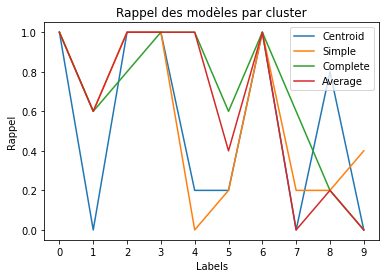

In [33]:
centroidR_trie = {cle: rappelCentroid[cle] for cle in sorted(rappelCentroid)}
simpleR_trie = {cle: rappelSimple[cle] for cle in sorted(rappelSimple)}
completeR_trie = {cle: rappelComplete[cle] for cle in sorted(rappelComplete)}
averageR_trie = {cle: rappelAverage[cle] for cle in sorted(rappelAverage)}

donnees = [centroidR_trie, simpleR_trie, completeR_trie, averageR_trie]

print(centroidR_trie, "\n", simpleR_trie, "\n", completeR_trie, "\n", averageR_trie)

# Création de listes pour stocker les valeurs des clés et les valeurs des plots
cles = []
valeurs = []

# Parcourir chaque dictionnaire
for dic in donnees:
    # Ajouter les clés manquantes avec des valeurs nulles
    for i in range(10):
        if i not in dic:
            dic[i] = (0,0.0)
    
    # Trier le dictionnaire par les clés et récupérer les valeurs
    valeurs_cles_triees = sorted(dic.items())
    cles_d, vals_d = zip(*valeurs_cles_triees)
    
    # Ajouter les valeurs des clés et des plots dans les listes
    cles.append(list(cles_d))
    valeurs.append([v[1] for v in vals_d])

# Tracer le graphique
plt.plot(cles[0], valeurs[0], label="Centroid")
plt.plot(cles[1], valeurs[1], label="Simple")
plt.plot(cles[2], valeurs[2], label="Complete")
plt.plot(cles[3], valeurs[3], label="Average")

plt.xlabel("Labels")
plt.ylabel("Rappel")
plt.title("Rappel des modèles par cluster")
plt.legend()
plt.xticks(range(10))
plt.show()


#### Score F1

{0: 1.0, 2: 0.7142857142857143, 3: 0.45454545454545453, 4: 0.33333333333333337, 5: 0.33333333333333337, 6: 1.0, 8: 0.888888888888889} 
 {0: 1.0, 1: 0.5454545454545454, 2: 0.4347826086956522, 3: 0.8333333333333333, 5: 0.33333333333333337, 6: 1.0, 7: 0.33333333333333337, 8: 0.33333333333333337, 9: 0.5714285714285715} 
 {0: 1.0, 1: 0.5454545454545454, 2: 0.888888888888889, 3: 0.7692307692307693, 4: 1.0, 5: 0.6666666666666665, 6: 0.8333333333333333, 7: 0.5454545454545454, 8: 0.33333333333333337} 
 {0: 1.0, 1: 0.5454545454545454, 2: 0.7142857142857143, 3: 0.7142857142857143, 4: 1.0, 5: 0.5714285714285715, 6: 1.0, 8: 0.33333333333333337}


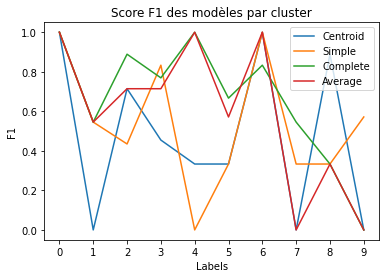

In [34]:
centroidF1_trie = {cle: F1_Centroid[cle] for cle in sorted(F1_Centroid)}
simpleF1_trie = {cle: F1_Simple[cle] for cle in sorted(F1_Simple)}
completeF1_trie = {cle: F1_Complete[cle] for cle in sorted(F1_Complete)}
averageF1_trie = {cle: F1_Average[cle] for cle in sorted(F1_Average)}

donnees = [centroidF1_trie, simpleF1_trie, completeF1_trie, averageF1_trie]

print(centroidF1_trie, "\n", simpleF1_trie, "\n", completeF1_trie, "\n", averageF1_trie)

# Création de listes pour stocker les valeurs des clés et les valeurs des plots
cles = []
valeurs = []

# Parcourir chaque dictionnaire
for dic in donnees:
    # Ajouter les clés manquantes avec des valeurs nulles
    for i in range(10):
        if i not in dic:
            dic[i] = 0.0
    
    # Trier le dictionnaire par les clés et récupérer les valeurs
    valeurs_cles_triees = sorted(dic.items())
    cles_d, vals_d = zip(*valeurs_cles_triees)
    
    # Ajouter les valeurs des clés et des plots dans les listes
    cles.append(list(cles_d))
    valeurs.append([v for v in vals_d])

# Tracer le graphique
plt.plot(cles[0], valeurs[0], label="Centroid")
plt.plot(cles[1], valeurs[1], label="Simple")
plt.plot(cles[2], valeurs[2], label="Complete")
plt.plot(cles[3], valeurs[3], label="Average")

plt.xlabel("Labels")
plt.ylabel("F1")
plt.title("Score F1 des modèles par cluster")
plt.legend()
plt.xticks(range(10))
plt.show()


Observation : Le cluster 0 possède un score F1 élevé pour tous les modèles. Cela signifie qu'on sait très bien à la fois différencier les 0 des autres chiffres, mais aussi les rassembler en un groupe.

### Algorithme des K-moyennes

#### Diminution du dataset

Nous allons réduire le dataset à 10%, c'est à dire 1090 écritures avec 109 de chaque classe

In [35]:

Xpartitionne2, ypartitionne2 = partitionneDonnee(X, y, 10)
Xpartitionne2 = np.array(Xpartitionne2)
Xpartitionne2 = pd.DataFrame(Xpartitionne2, columns= attributs)
Xpartitionne2

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16
0,57,94,18,85,4,37,39,0,94,17,100,65,60,100,0,99
1,25,90,0,48,13,0,79,13,100,61,60,100,3,73,10,29
2,67,100,25,89,0,51,4,8,49,0,88,26,100,68,67,97
3,51,100,17,77,17,21,63,0,100,42,83,93,29,99,0,52
4,93,84,52,100,6,83,0,35,28,0,77,6,100,47,89,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,76,100,29,95,51,70,100,85,100,59,96,15,50,0,0,15
1086,40,100,15,68,85,73,24,89,77,59,100,32,52,0,0,29
1087,93,69,100,100,44,95,12,68,68,69,80,46,50,17,0,0
1088,100,80,65,43,26,55,50,100,90,92,83,42,49,3,0,0


#### K moyennes avec k = 10

iteration  1  Inertie :  6194309.755300529  Difference :  453.70911110433855
iteration  2  Inertie :  5583055.7233723225  Difference :  267.0697523908352
iteration  3  Inertie :  5361611.385727317  Difference :  364.6978396668467
iteration  4  Inertie :  5130102.793104334  Difference :  35.955393448774075
iteration  5  Inertie :  5042224.694480077  Difference :  18.174200547325086
iteration  6  Inertie :  5015732.533027128  Difference :  178.21871529887048
iteration  7  Inertie :  5009247.961321025  Difference :  184.82083354317226
iteration  8  Inertie :  5000752.102625673  Difference :  7.46120984223869
iteration  9  Inertie :  4990236.207652394  Difference :  8.018510236732986
iteration  10  Inertie :  4976507.792628674  Difference :  9.90518116940495
iteration  11  Inertie :  4969248.018743822  Difference :  6.609978166032133
iteration  12  Inertie :  4963299.187338987  Difference :  5.266592864818987
iteration  13  Inertie :  4957491.446418337  Difference :  6.098876911926128
iter

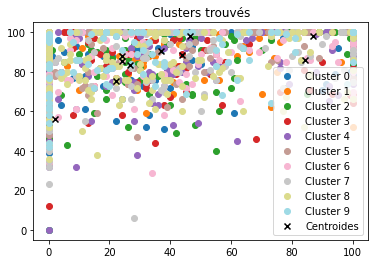

In [36]:

val_k = 10
les_centres, l_affectation = clust.kmoyennes(val_k, Xpartitionne2, 0.05, 100)

#print("Pour k=",val_k,"\nAffichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

clust.affiche_resultat(X,les_centres,l_affectation)


In [37]:
# INDICE DE DUNN DU CLUSTER OBTENU

dunn_index = Dunn(np.array(Xpartitionne2), l_affectation)

print("indice de Dunn : ", dunn_index)

indice de Dunn :  0.07873125364566204


In [38]:
# EVALUATION DE L'ATTRIBUTION DES CLUSTERS

nouveau_dict = key_clust(l_affectation, ypartitionne2)

print("labels prédits sur les clusters : ", nouveau_dict)
print()
print("précision : ", precision_clusters(nouveau_dict, ypartitionne2))
print()
print("rappel : ", rappel_clusters(nouveau_dict, ypartitionne2))
print()
print("scoreF1 : ", scoreF1(nouveau_dict, ypartitionne2))
print()
print("accuracy : ",accuracy(ypartitionne2, nouveau_dict))

labels prédits sur les clusters :  {0: [0, 1, 3, 5, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 26, 27, 28, 29, 31, 32, 33, 34, 36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 53, 55, 56, 57, 58, 59, 62, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 77, 79, 80, 81, 85, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 99, 100, 101, 102, 104, 106, 934], 8: [2, 6, 10, 21, 22, 23, 24, 30, 35, 38, 40, 50, 51, 52, 54, 63, 67, 76, 78, 82, 83, 86, 92, 98, 103, 105, 107, 108, 847, 884, 885, 887, 888, 891, 893, 894, 896, 900, 902, 908, 913, 917, 919, 920, 924, 925, 926, 930, 932, 935, 937, 940, 941, 942, 943, 944, 945, 947, 950, 951, 953, 954, 955, 957, 959, 960, 961, 963, 964, 966, 971, 972, 976, 978], 6: [4, 61, 84, 452, 516, 522, 532, 536, 626, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704,

#### K moyennes avec variation de k

iteration  1  Inertie :  14095985.901756158  Difference :  234.68097198403248
iteration  2  Inertie :  13366785.592365129  Difference :  24.73910072961535
iteration  3  Inertie :  12941992.733181816  Difference :  20.203344981892574
iteration  4  Inertie :  12785935.999008875  Difference :  10.101415883939154
iteration  5  Inertie :  12765379.889175186  Difference :  2.964439313237629
iteration  6  Inertie :  12757717.364236664  Difference :  2.5138031623607815
iteration  7  Inertie :  12757069.552703261  Difference :  0.7134814137279882
iteration  8  Inertie :  12756611.804367187  Difference :  0.6880067413103165
iteration  9  Inertie :  12756611.804367187  Difference :  0.0


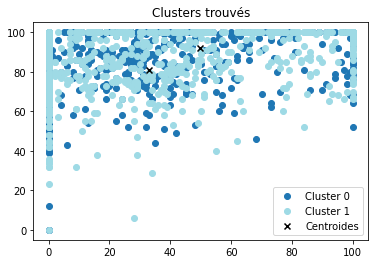

iteration  1  Inertie :  11678660.927314105  Difference :  271.5524903503979
iteration  2  Inertie :  11284069.424653215  Difference :  21.92819102074575
iteration  3  Inertie :  11161314.134541498  Difference :  13.684872481643888
iteration  4  Inertie :  10985653.23575718  Difference :  141.99756768530622
iteration  5  Inertie :  10655664.059214456  Difference :  23.34331610055733
iteration  6  Inertie :  10570527.221620861  Difference :  141.60212586644323
iteration  7  Inertie :  10530995.733307654  Difference :  7.384980337072185
iteration  8  Inertie :  10470078.483175129  Difference :  9.171679458573765
iteration  9  Inertie :  10384386.580107968  Difference :  10.874172466291597
iteration  10  Inertie :  10341372.282230161  Difference :  7.099240597218745
iteration  11  Inertie :  10309762.50970325  Difference :  6.29324751920375
iteration  12  Inertie :  10256482.605678469  Difference :  9.472731425817404
iteration  13  Inertie :  10165609.395526985  Difference :  12.750243457

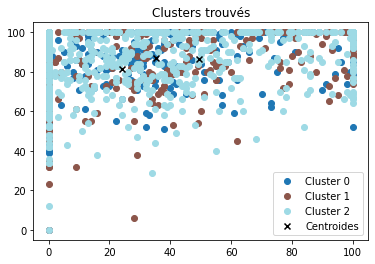

iteration  1  Inertie :  11935435.109288989  Difference :  262.97390781193883
iteration  2  Inertie :  10384176.395461652  Difference :  50.026593169692575
iteration  3  Inertie :  9796442.514004804  Difference :  166.69912376108155
iteration  4  Inertie :  9572985.757396717  Difference :  161.96692520281763
iteration  5  Inertie :  9472110.332400456  Difference :  12.58351054507735
iteration  6  Inertie :  9272510.744060665  Difference :  20.713001024494304
iteration  7  Inertie :  8748106.708000677  Difference :  160.63582960619416
iteration  8  Inertie :  8549008.407342248  Difference :  14.982608633542757
iteration  9  Inertie :  8497190.58942248  Difference :  9.022761996816726
iteration  10  Inertie :  8471853.155099064  Difference :  6.711458131649812
iteration  11  Inertie :  8451887.135142557  Difference :  5.525176157067617
iteration  12  Inertie :  8442752.135575043  Difference :  3.8278644152276713
iteration  13  Inertie :  8435243.263828099  Difference :  3.536865405127579

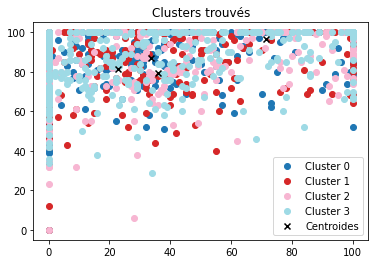

iteration  1  Inertie :  8804177.345921108  Difference :  351.15264686227005
iteration  2  Inertie :  8087561.246510165  Difference :  190.1329812697773
iteration  3  Inertie :  7850453.554721492  Difference :  264.4513207960295
iteration  4  Inertie :  7661655.750760431  Difference :  19.409081763014488
iteration  5  Inertie :  7514206.187909396  Difference :  263.41952540903293
iteration  6  Inertie :  7463334.125283274  Difference :  8.778461978476093
iteration  7  Inertie :  7446174.448366224  Difference :  6.467525623297355
iteration  8  Inertie :  7442634.572546537  Difference :  2.430393067044708
iteration  9  Inertie :  7440362.571297296  Difference :  2.5710845887022065
iteration  10  Inertie :  7439372.546173811  Difference :  1.3896979506350906
iteration  11  Inertie :  7437690.259785408  Difference :  2.834027091355016
iteration  12  Inertie :  7432339.839656084  Difference :  4.5747582500212705
iteration  13  Inertie :  7429855.012443312  Difference :  2.7168599830350955
i

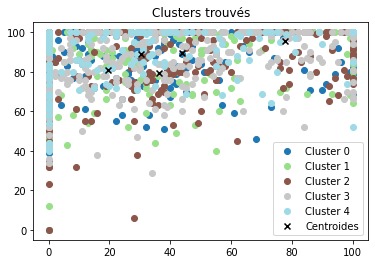

iteration  1  Inertie :  8292453.90914087  Difference :  460.140760773951
iteration  2  Inertie :  7747125.7722609695  Difference :  30.16135788275538
iteration  3  Inertie :  7624848.944855735  Difference :  206.5156041890336
iteration  4  Inertie :  7458257.432495832  Difference :  237.2346792190189
iteration  5  Inertie :  7290773.969091216  Difference :  266.8520211328185
iteration  6  Inertie :  7207517.515441746  Difference :  11.470595559850556
iteration  7  Inertie :  7184384.609509171  Difference :  5.989409416775506
iteration  8  Inertie :  7170386.5890123425  Difference :  5.582520072503382
iteration  9  Inertie :  7166986.205792622  Difference :  2.079276056030084
iteration  10  Inertie :  7165521.026004834  Difference :  2.2245355020402773
iteration  11  Inertie :  7164366.528965128  Difference :  1.7789409607475626
iteration  12  Inertie :  7163088.1130833  Difference :  1.7415566066415058
iteration  13  Inertie :  7162742.385454961  Difference :  0.7433589948887881
itera

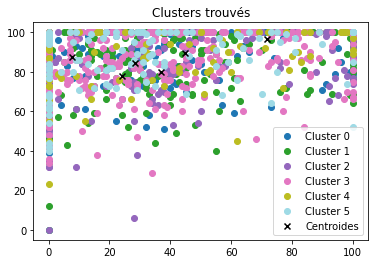

iteration  1  Inertie :  9249455.850336712  Difference :  392.186496209112
iteration  2  Inertie :  7554793.301676774  Difference :  233.04585702328225
iteration  3  Inertie :  6645585.988359055  Difference :  237.09331661221864
iteration  4  Inertie :  6503697.953818746  Difference :  16.325163269055043
iteration  5  Inertie :  6459069.347499841  Difference :  16.51942350550394
iteration  6  Inertie :  6373974.807831003  Difference :  25.91082659152228
iteration  7  Inertie :  6043110.829664592  Difference :  39.200047114053454
iteration  8  Inertie :  5943174.390861943  Difference :  13.266752770461286
iteration  9  Inertie :  5934643.851647386  Difference :  253.9312604103454
iteration  10  Inertie :  5933751.531441167  Difference :  1.3196126577733736
iteration  11  Inertie :  5933417.6884216145  Difference :  1.3640088805140085
iteration  12  Inertie :  5933104.054106145  Difference :  1.362071896216886
iteration  13  Inertie :  5933104.054106145  Difference :  0.0


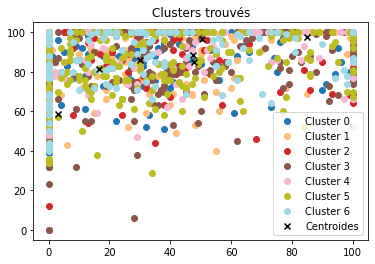

iteration  1  Inertie :  7446342.559031032  Difference :  404.4365757608915
iteration  2  Inertie :  6730473.5777076  Difference :  365.7331331955503
iteration  3  Inertie :  6512221.934331567  Difference :  316.409846266112
iteration  4  Inertie :  6444997.323420622  Difference :  14.990977469823067
iteration  5  Inertie :  6379333.453565288  Difference :  18.33913150391524
iteration  6  Inertie :  6321331.651305705  Difference :  280.9632364111147
iteration  7  Inertie :  6307132.183113244  Difference :  334.9810129882934
iteration  8  Inertie :  6298681.886875796  Difference :  215.7942213697237
iteration  9  Inertie :  6292067.621194968  Difference :  5.149563363837987
iteration  10  Inertie :  6289741.835555771  Difference :  3.2182964005336006
iteration  11  Inertie :  6288375.73238384  Difference :  2.5175594366594156
iteration  12  Inertie :  6286421.709109498  Difference :  2.8789182523047776
iteration  13  Inertie :  6284114.297848893  Difference :  92.43714748191928
iteratio

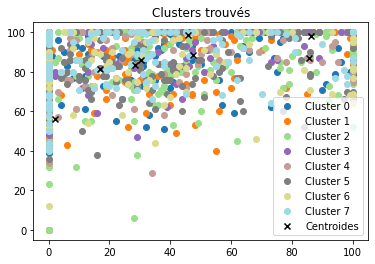

iteration  1  Inertie :  8184251.979266355  Difference :  420.1236994614249
iteration  2  Inertie :  6475275.251592701  Difference :  218.1657235358339
iteration  3  Inertie :  5780144.0543410005  Difference :  338.6181126224023
iteration  4  Inertie :  5670394.892835705  Difference :  385.4362697593578
iteration  5  Inertie :  5626851.360082842  Difference :  13.239917790664434
iteration  6  Inertie :  5595988.970564095  Difference :  304.1573584759545
iteration  7  Inertie :  5574493.844921739  Difference :  10.070866733499765
iteration  8  Inertie :  5556726.389200084  Difference :  290.6328766612466
iteration  9  Inertie :  5527587.700202856  Difference :  12.18746642274302
iteration  10  Inertie :  5495775.061617943  Difference :  11.726948167857392
iteration  11  Inertie :  5468980.993422649  Difference :  10.637373473763725
iteration  12  Inertie :  5449851.329392055  Difference :  8.01617911635581
iteration  13  Inertie :  5447988.402019146  Difference :  3.0153227050137246
ite

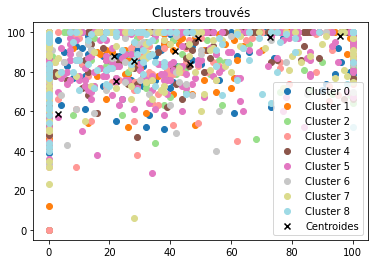

iteration  1  Inertie :  7276952.991202887  Difference :  443.54358819438966
iteration  2  Inertie :  6060276.330577887  Difference :  395.12321778322263
iteration  3  Inertie :  5791621.252079904  Difference :  267.13832494186795
iteration  4  Inertie :  5628851.269768283  Difference :  312.96398517242295
iteration  5  Inertie :  5500233.108651456  Difference :  28.278160571208637
iteration  6  Inertie :  5378047.798739422  Difference :  294.54375411422706
iteration  7  Inertie :  5314584.663180212  Difference :  18.197260043914135
iteration  8  Inertie :  5263775.191490224  Difference :  98.55730324834849
iteration  9  Inertie :  5222650.283708135  Difference :  308.320042966199
iteration  10  Inertie :  5192500.161063859  Difference :  16.12046201199465
iteration  11  Inertie :  5133689.160115633  Difference :  27.31214365693673
iteration  12  Inertie :  5131449.508242945  Difference :  3.8211310681637074
iteration  13  Inertie :  5129894.1048263945  Difference :  3.22343223257741
i

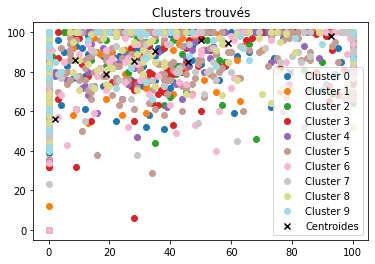

In [39]:
np.random.seed(42)   

liste_affectations = []

for k in range(2,11) : 

    val_k = k
    les_centres, l_affectation = clust.kmoyennes(val_k, Xpartitionne2, 0.05, 100)
    
    liste_affectations.append(l_affectation)

    #print("Pour k=",val_k,"\nAffichage des centres: ",les_centres)
    #print("Affichage des affectations: ",l_affectation)

    clust.affiche_resultat(X,les_centres,l_affectation)


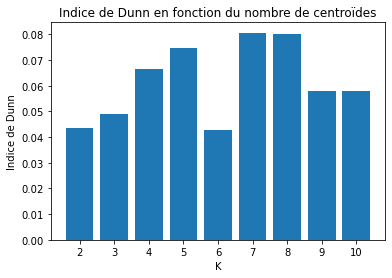

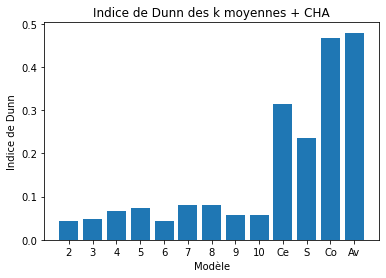

In [40]:
liste_Dunn = []
modeles_k = []

k = 2

for affect in liste_affectations :
    if not isinstance(affect, np.float64):
        modeles_k.append(k)
        liste_Dunn.append(Dunn(np.array(Xpartitionne2), affect))
        k += 1


# Création de l'histogramme
plt.bar(modeles_k, liste_Dunn)

# Ajout de labels et de titres
plt.xlabel('K')
plt.ylabel('Indice de Dunn')
plt.title("Indice de Dunn en fonction du nombre de centroïdes")
plt.xticks(range(2,11))


# Affichage de l'histogramme
plt.show()


# Histogramme avec les 4 modèles
modeles = ['Ce', 'S', 'Co', 'Av']
modeles_plus = [str(k) for k in modeles_k] + modeles
liste_dunn = [dunn_index_centroid, dunn_index_simple, dunn_index_complete, dunn_index_average]  # Valeurs associées à chaque catégorie
liste_dunn_plus = liste_Dunn + liste_dunn

# Création de l'histogramme
plt.bar(modeles_plus, liste_dunn_plus)

# Ajout de labels et de titres
plt.xlabel('Modèle')
plt.ylabel('Indice de Dunn')
plt.title("Indice de Dunn des k moyennes + CHA")

# Affichage de l'histogramme
plt.show()

In [41]:
# EVALUATION DE L'ATTRIBUTION DES CLUSTERS

liste_precisions = []
liste_rappels = []
liste_scoreF1 = []
liste_accuracy = []

for affect in liste_affectations :
    if not isinstance(affect, np.float64):

        nouveau_dict = key_clust(affect, ypartitionne2)
        
        liste_precisions.append(precision_clusters(nouveau_dict, ypartitionne2))
        
        liste_rappels.append(rappel_clusters(nouveau_dict, ypartitionne2))
        
        liste_scoreF1.append(scoreF1(nouveau_dict, ypartitionne2))
        
        liste_accuracy.append(accuracy(ypartitionne2, nouveau_dict))

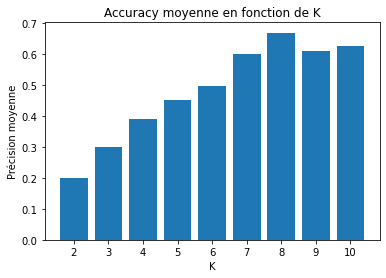

In [42]:
# ACCURACY MOYENNE
# Création de l'histogramme
plt.bar(modeles_k, liste_accuracy)

# Ajout de labels et de titres
plt.xlabel('K')
plt.ylabel('Précision moyenne')
plt.title("Accuracy moyenne en fonction de K")
plt.xticks(range(2,11))


# Affichage de l'histogramme
plt.show()

### Clustering croisé

Clustering sur plusieurs échantillons aléatoires

In [43]:
n = 10

liste_X_ypartitionne = []

for _ in range (n) : 
    Xpartitionne_elt, ypartitionne_elt = partitionneDonnee(X, y, 1/2)
    Xpartitionne_elt = np.array(Xpartitionne_elt)
    Xpartitionne_elt = pd.DataFrame(Xpartitionne_elt, columns= attributs)
    liste_X_ypartitionne.append((Xpartitionne_elt, ypartitionne_elt))


#### CHA Centroid

Groupes résultants avec 10 clusters :
{8: [0, 2, 4, 40, 42], 10: [1], 9: [3], 1: [5, 6, 7, 9, 10, 11, 12, 13, 14, 35, 36, 38, 39], 4: [8, 45], 5: [15, 16, 17, 18, 19, 25, 29, 37, 46, 47, 48], 3: [20, 21, 22, 23, 24, 49], 7: [26, 27, 41, 43], 2: [28, 30, 31, 32, 33, 34], 6: [44]}


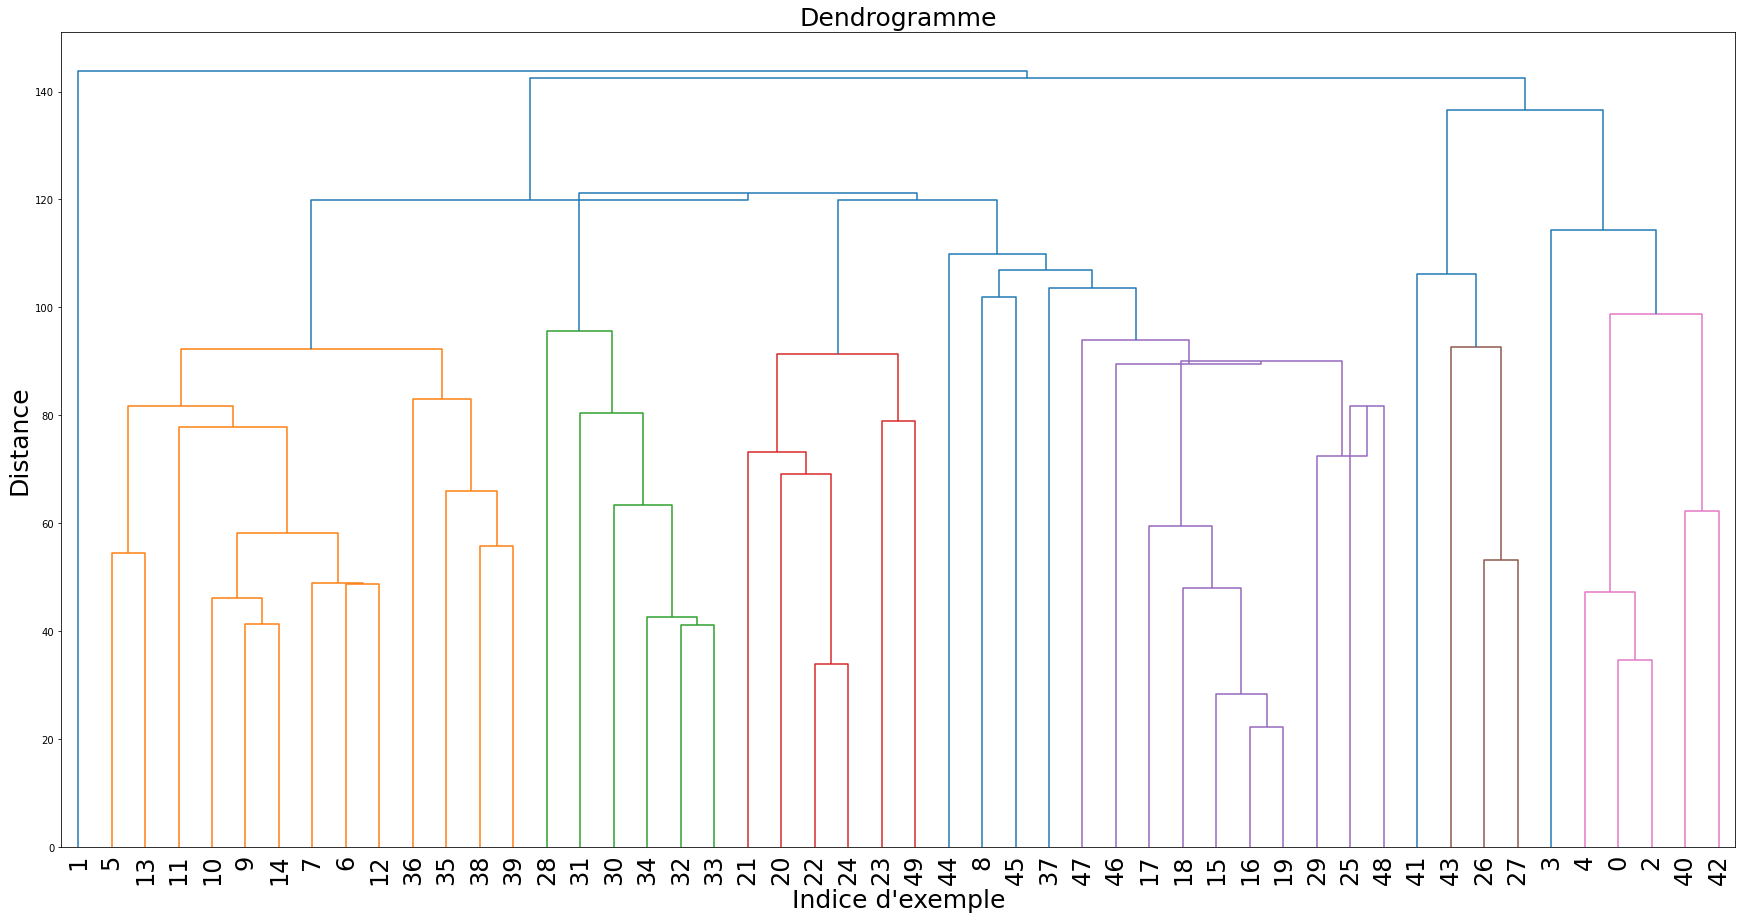

Clustering réalisé en : 9.4024 secondes.
Groupes résultants avec 10 clusters :
{8: [0, 1, 2, 3], 10: [4], 4: [5, 6, 7, 8, 35], 1: [9, 10, 11, 12, 13, 14, 36, 37, 38, 39], 6: [15, 16, 17, 18, 19, 26, 27, 29, 45, 47, 48, 49], 5: [20, 21, 22, 23, 24, 46], 2: [25, 28], 7: [30, 31, 32, 33, 34], 3: [40, 41, 43, 44], 9: [42]}


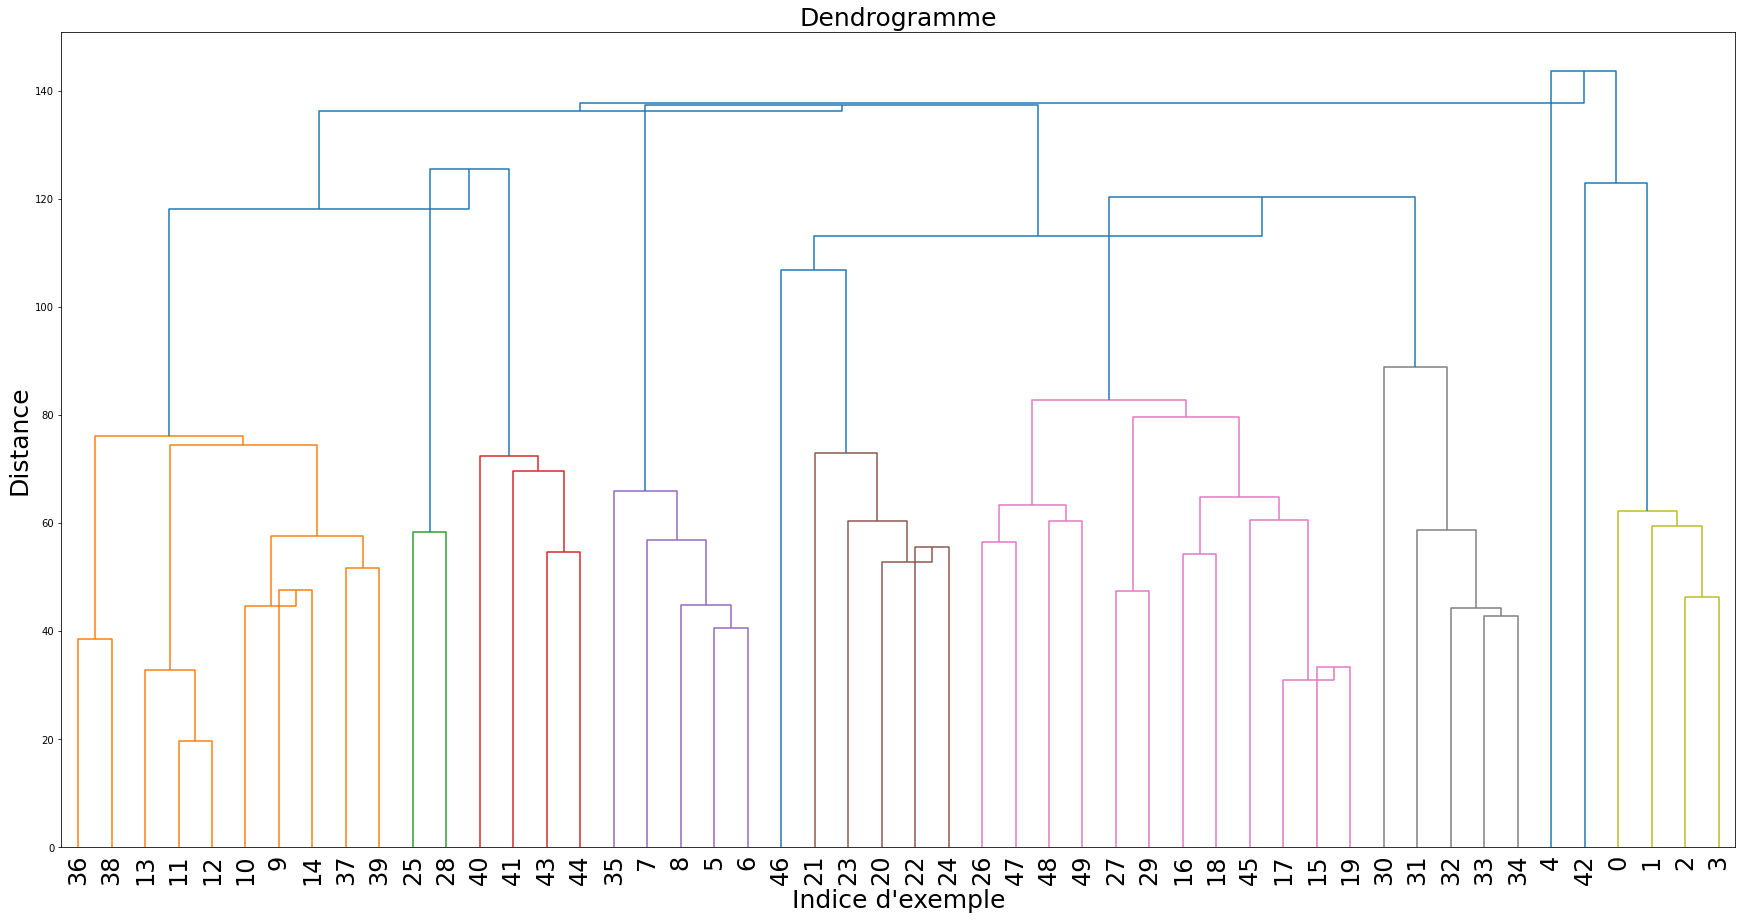

Clustering réalisé en : 10.0157 secondes.
Groupes résultants avec 10 clusters :
{7: [0, 1, 2, 3], 10: [4], 2: [5, 9, 10, 11, 12, 13, 14, 35, 36, 37, 38, 39, 42], 1: [6, 7], 4: [8, 15, 16, 17, 18, 19, 20, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 45, 46, 47, 48, 49], 3: [21, 23], 6: [22], 9: [26], 5: [40], 8: [41, 43, 44]}


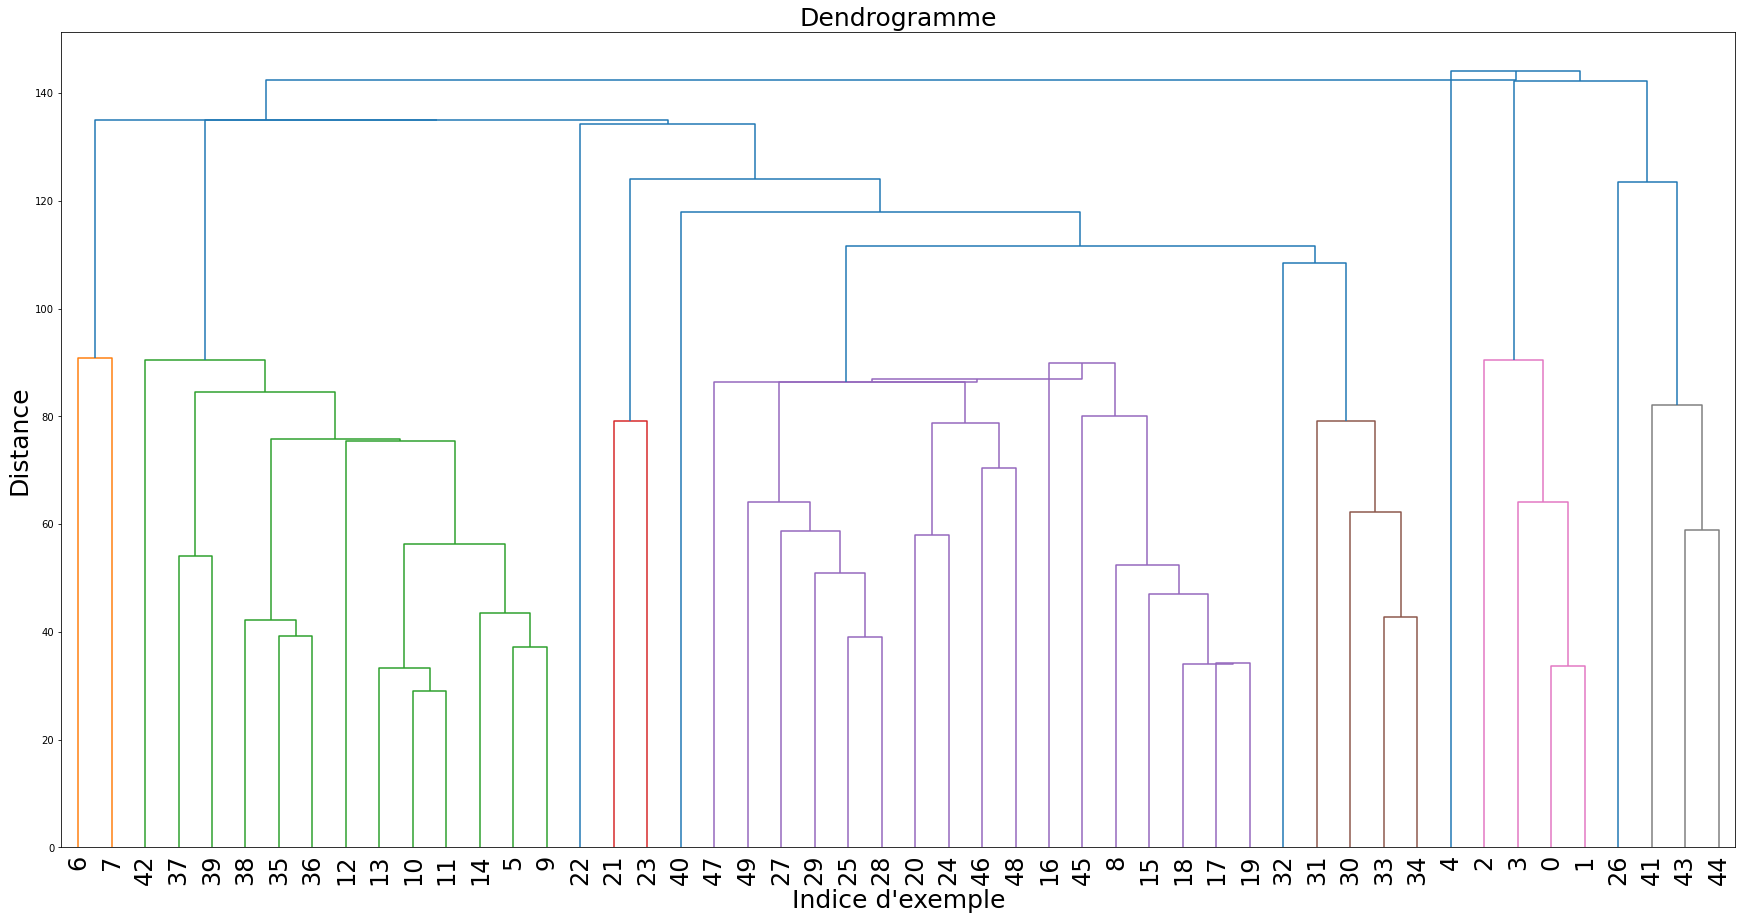

Clustering réalisé en : 9.4043 secondes.
Groupes résultants avec 10 clusters :
{2: [0, 1, 2], 1: [3, 4], 5: [5, 10, 11, 12, 13, 14, 35, 36, 37, 38, 39], 7: [6, 7, 8], 8: [9, 26, 29, 30, 31, 32, 33, 34], 9: [15, 16, 17, 18, 19], 10: [20, 21, 22, 23, 24, 45, 46, 47, 48, 49], 4: [25, 27, 28, 40, 42], 3: [41, 44], 6: [43]}


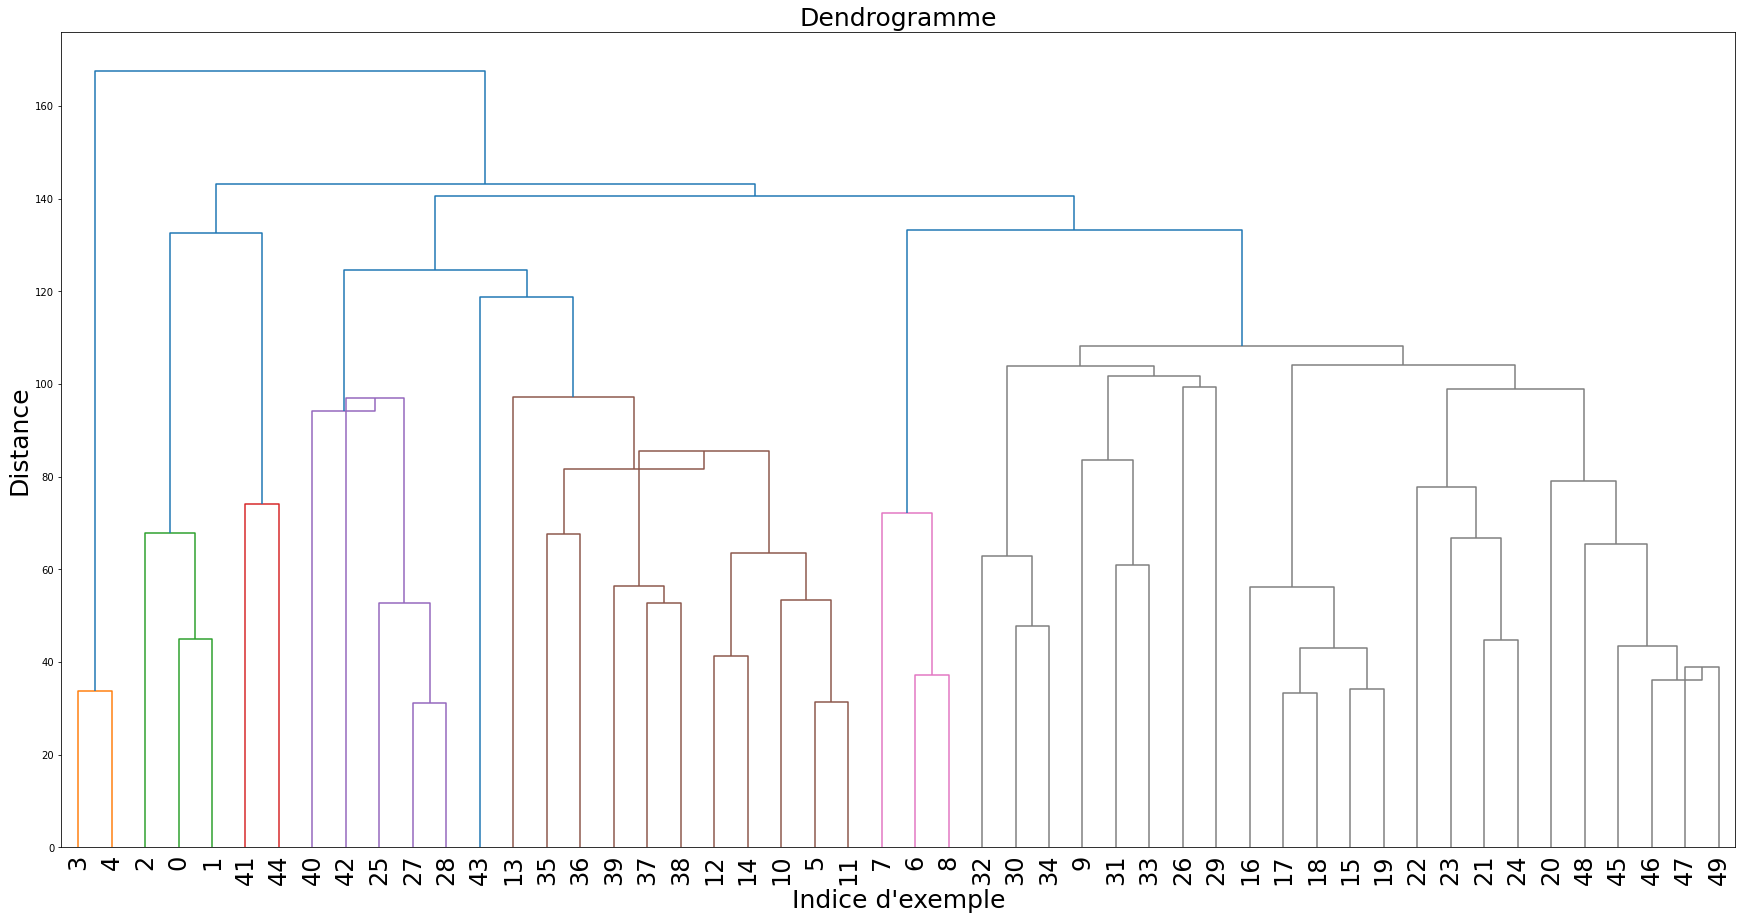

Clustering réalisé en : 7.9850 secondes.
Groupes résultants avec 10 clusters :
{5: [0], 1: [1, 2, 3, 4], 3: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 45, 46, 47, 49], 4: [27, 28, 29, 40, 41, 43, 44], 2: [42], 6: [48]}


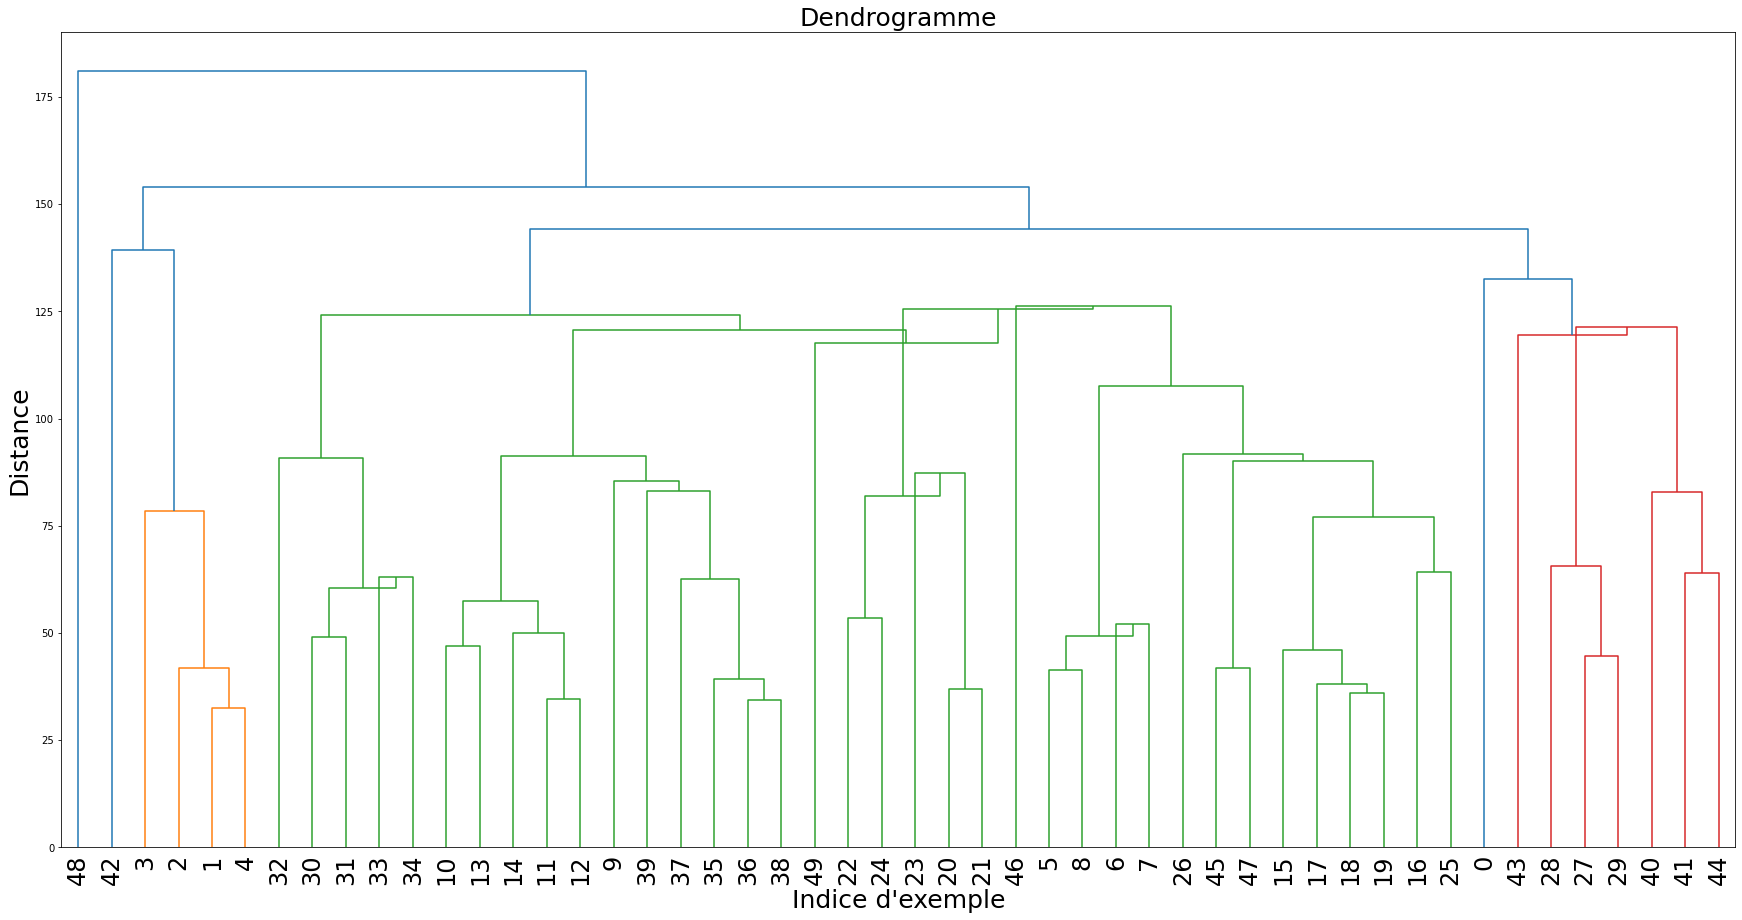

Clustering réalisé en : 8.1062 secondes.
Groupes résultants avec 10 clusters :
{5: [0, 42], 2: [1, 2, 3, 4], 4: [5, 6, 9, 46], 7: [7, 30], 8: [8, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 28, 29, 31, 32, 33, 34, 47, 48, 49], 6: [10, 11, 12, 13, 14, 35, 36, 37, 38, 39], 1: [25, 26], 3: [40, 41, 43, 44], 9: [45]}


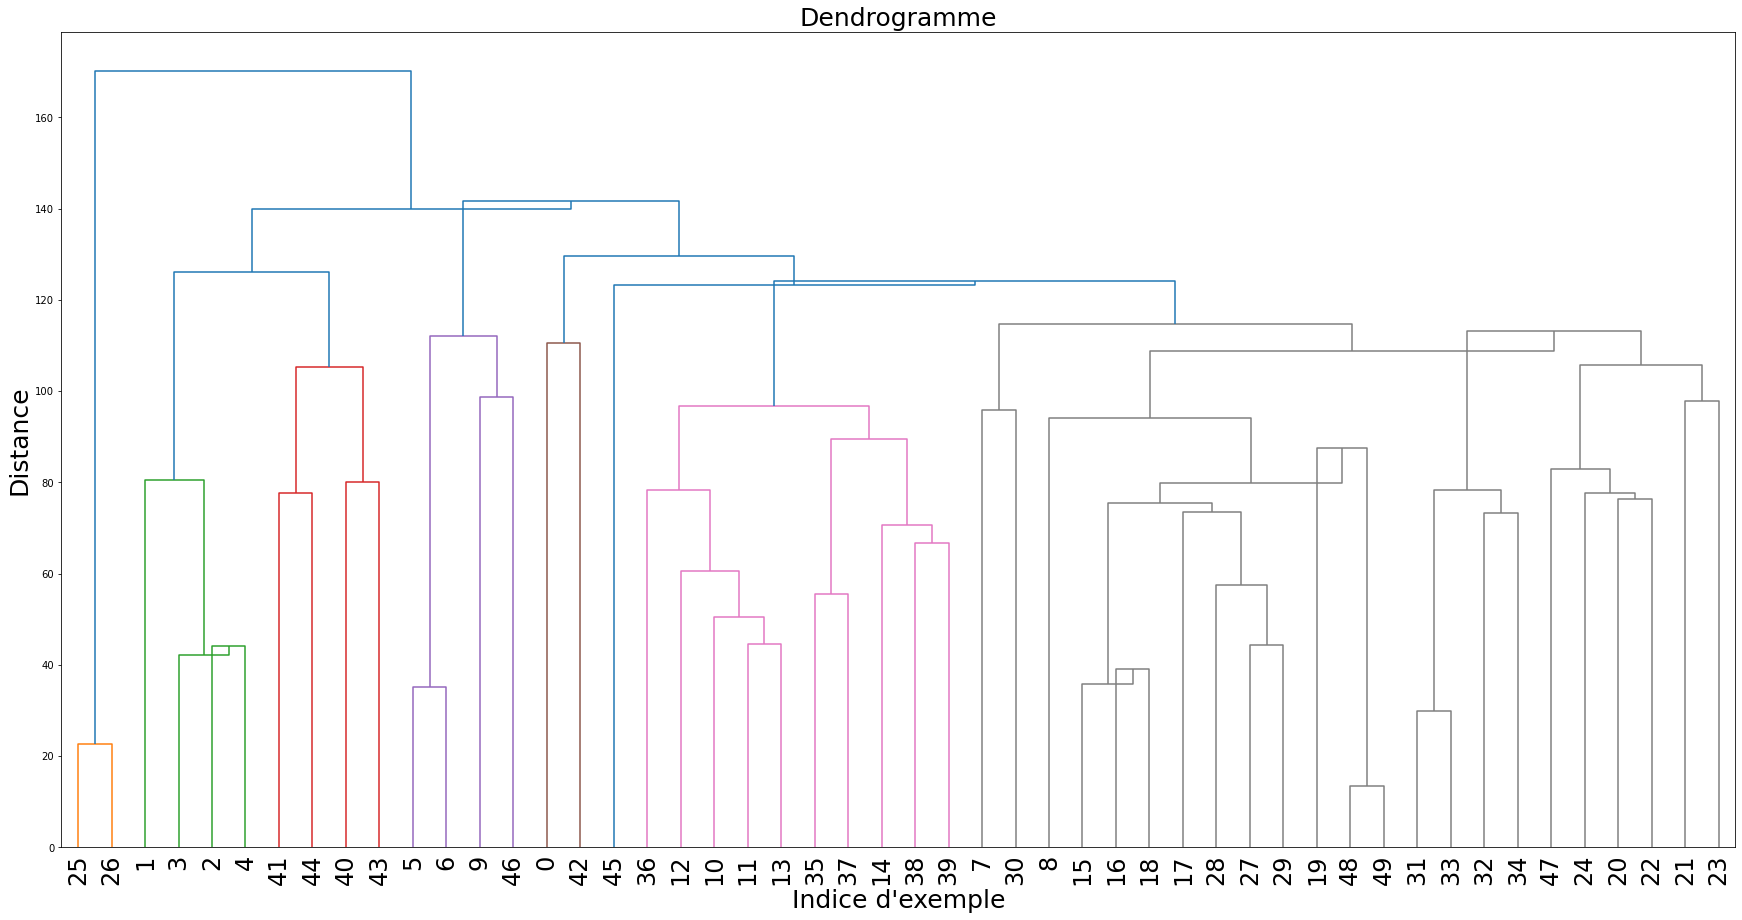

Clustering réalisé en : 7.9532 secondes.
Groupes résultants avec 10 clusters :
{2: [0, 1, 3, 4, 30, 31], 9: [2], 10: [5], 5: [6, 7, 9, 15, 16, 17, 18, 19, 39, 45, 46, 47, 48], 7: [8, 10, 11, 12, 13, 14, 35, 36, 37, 38, 40], 4: [20, 21, 22, 23, 24], 1: [25, 26, 27, 28, 29, 43], 3: [32, 33, 34], 6: [41, 42, 44], 8: [49]}


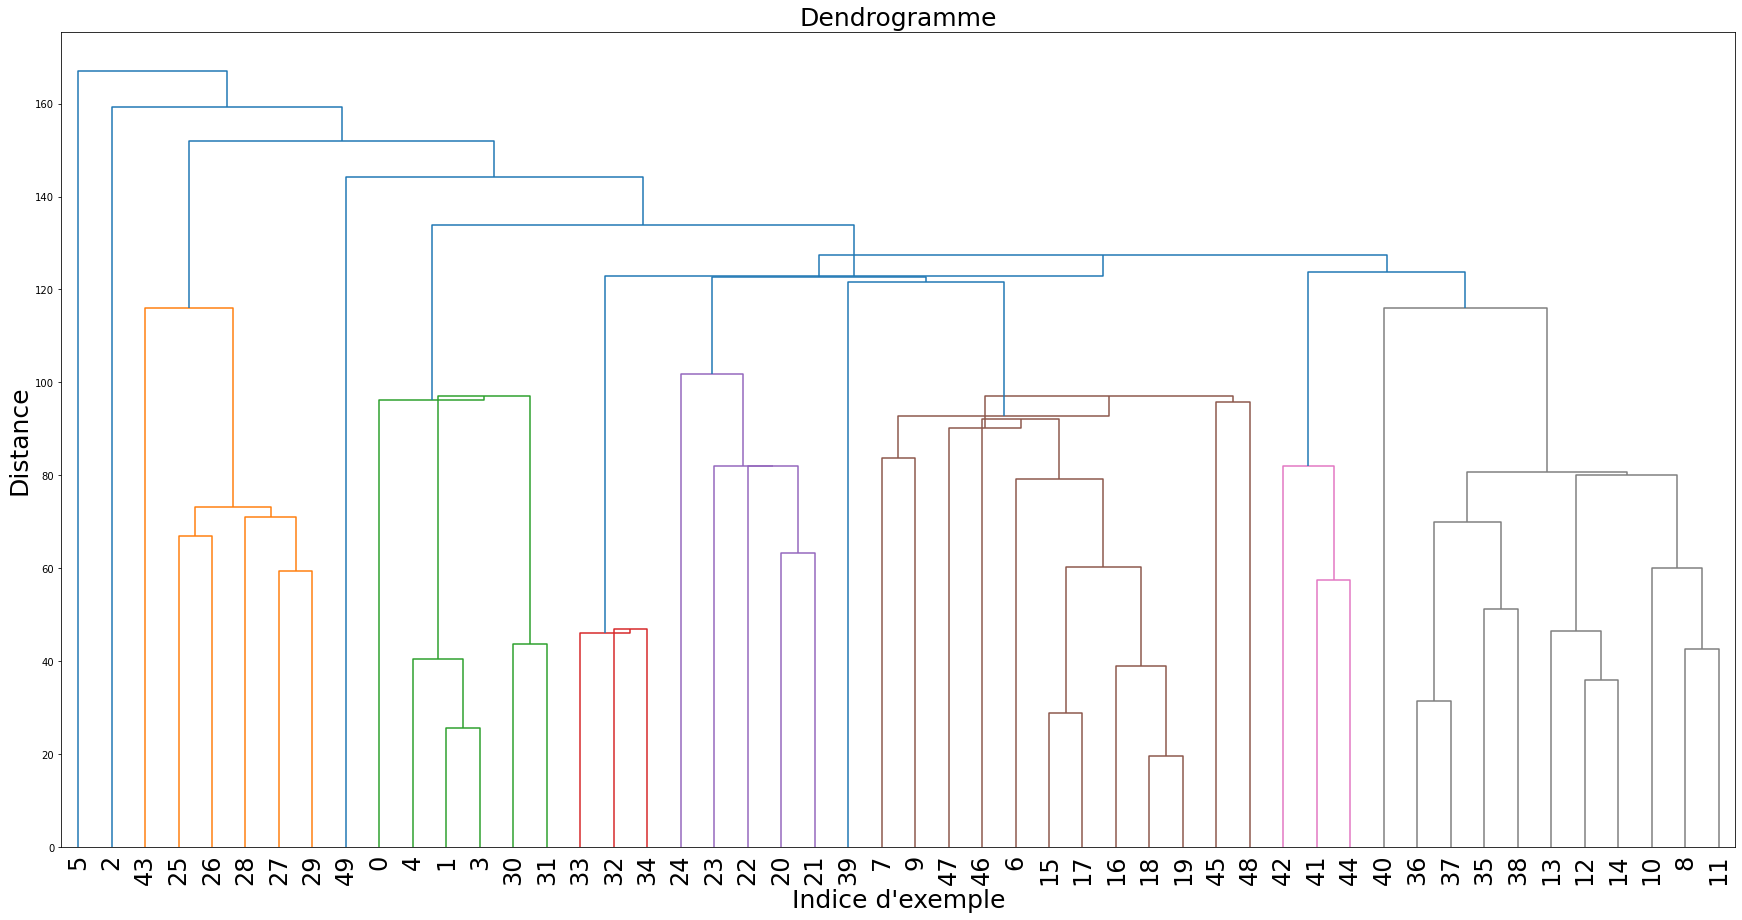

Clustering réalisé en : 7.8648 secondes.
Groupes résultants avec 10 clusters :
{2: [0, 2], 3: [1, 4], 10: [3], 4: [5, 7, 9, 10, 11, 12, 13, 14, 35, 37, 38, 39], 5: [6, 15, 16, 17, 18, 19, 22, 24, 27, 45, 46, 47, 48, 49], 9: [8], 8: [20], 6: [21, 23, 30, 31, 32, 33, 34], 1: [25, 26, 28, 29, 40, 41, 42, 43, 44], 7: [36]}


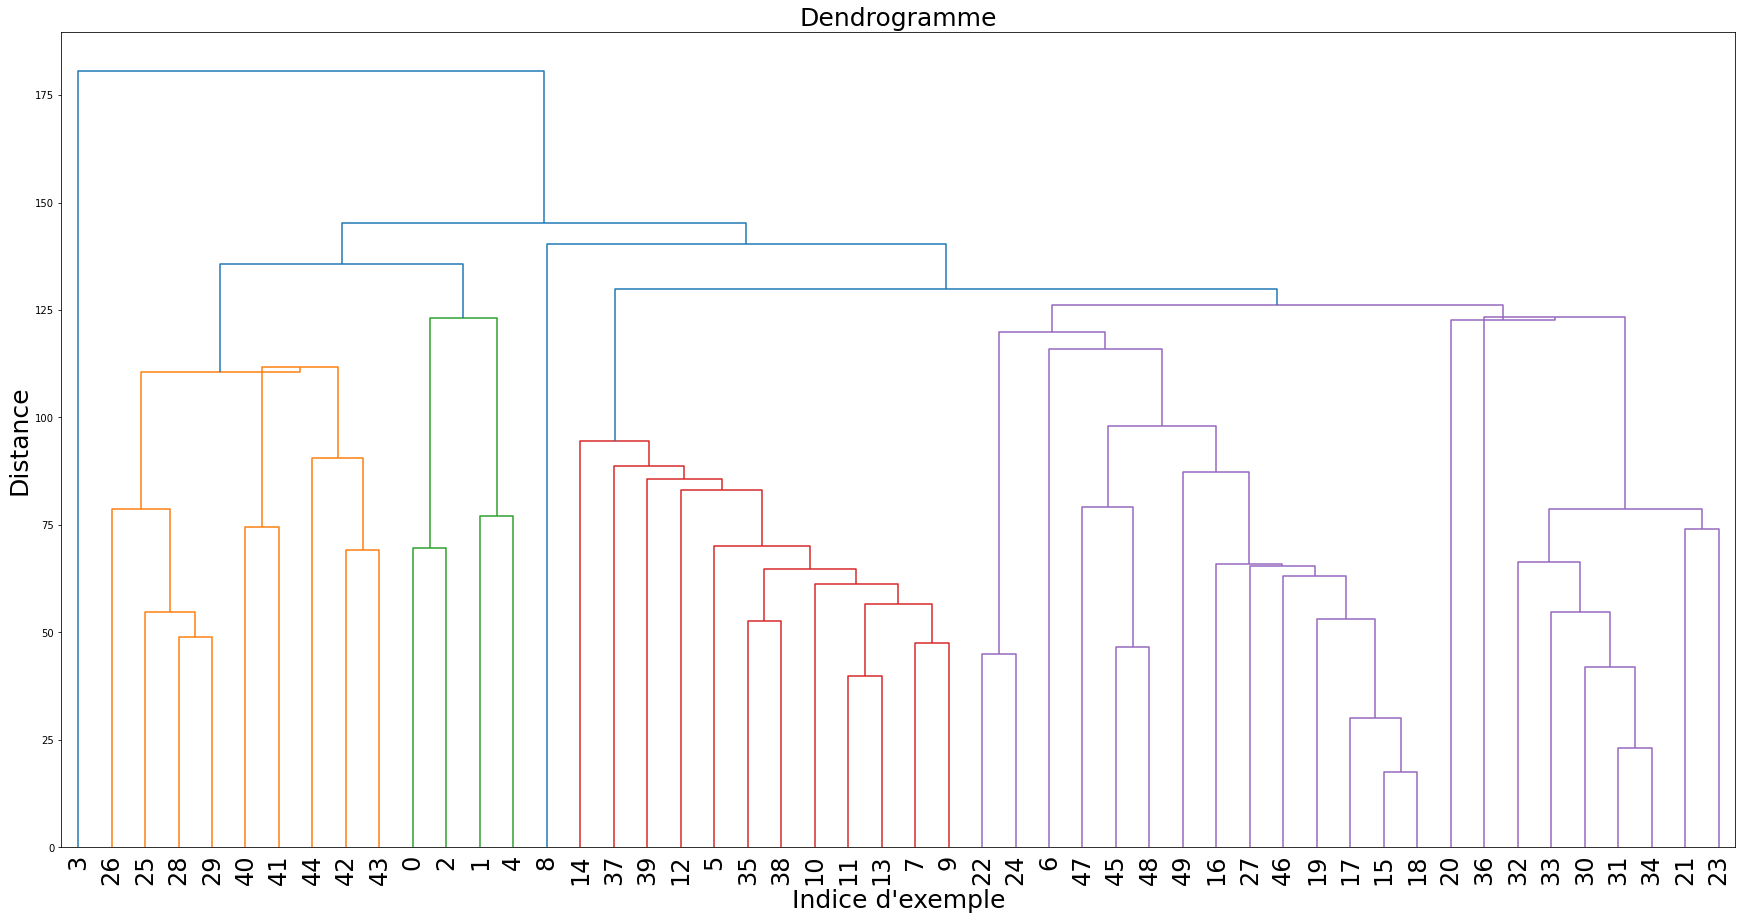

Clustering réalisé en : 8.1982 secondes.
Groupes résultants avec 10 clusters :
{9: [0, 1, 2, 3, 4], 3: [5, 6, 7, 9, 15, 16, 17, 18, 19, 26, 38, 49], 7: [8, 10, 11, 12, 13, 14, 35, 36, 37, 39], 5: [20, 22, 46, 48], 4: [21, 23, 24, 25, 30, 31, 32, 33, 34], 1: [27, 28], 8: [29, 43, 44], 10: [40], 6: [41, 42], 2: [45, 47]}


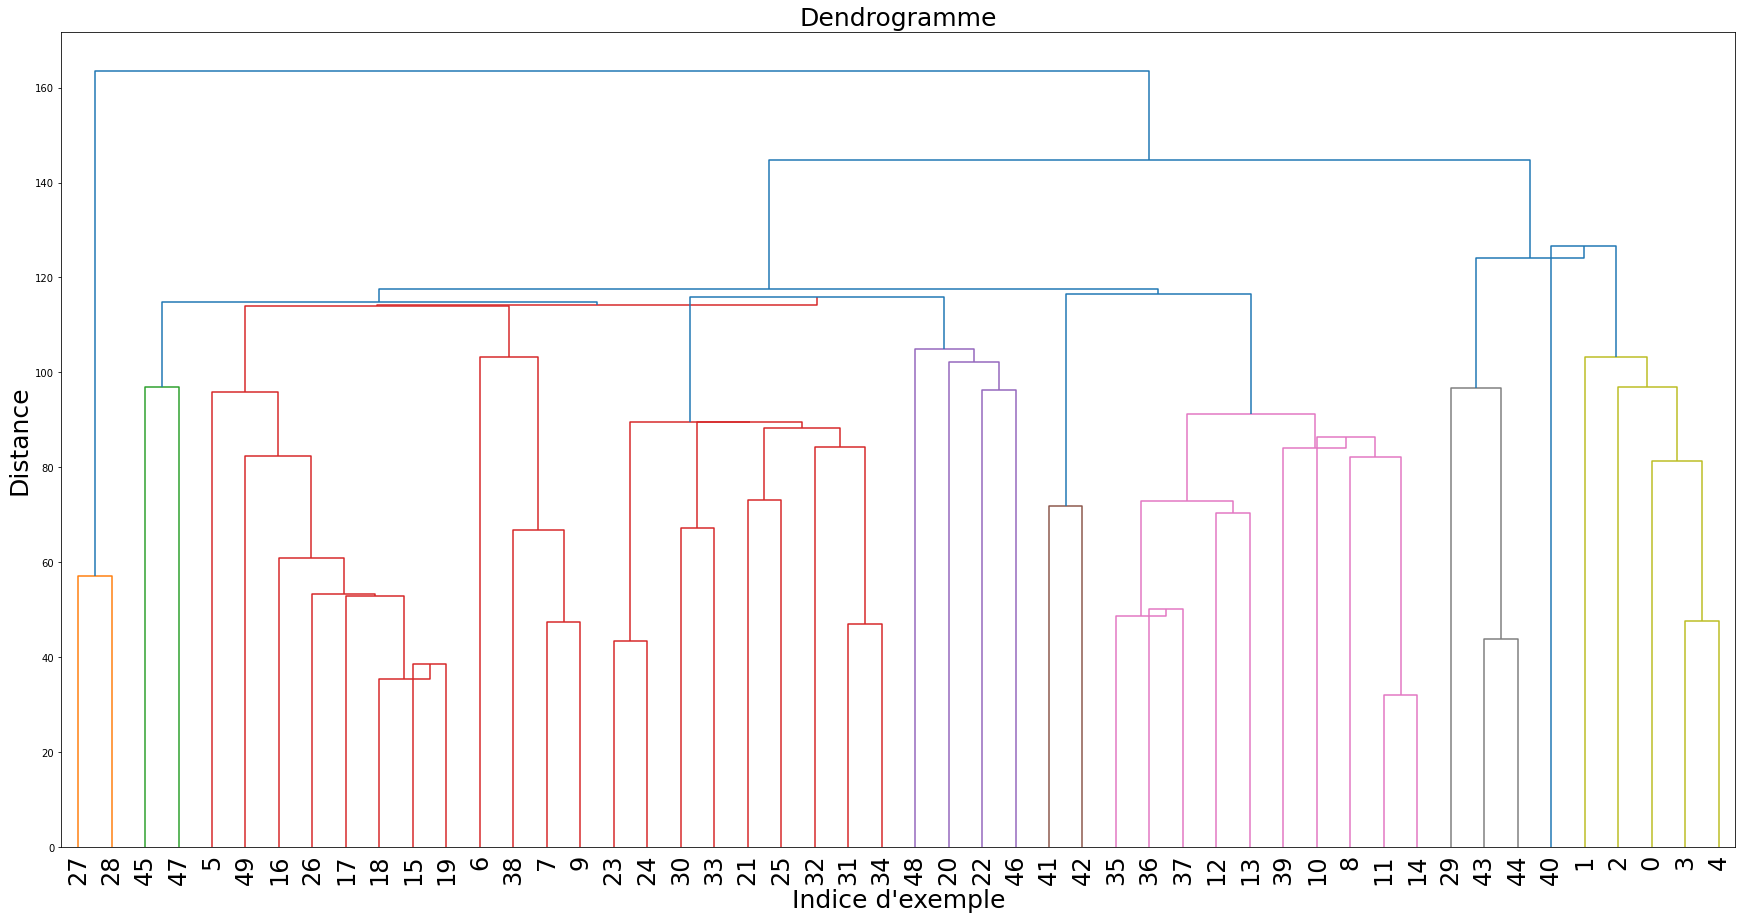

Clustering réalisé en : 7.9816 secondes.
Groupes résultants avec 10 clusters :
{1: [0, 1, 3], 7: [2, 4], 6: [5, 6, 7, 8, 15, 16, 17, 18, 19, 25, 26, 38, 40, 46, 47, 48], 10: [9], 5: [10, 11, 12, 13, 14, 35, 36, 37, 39, 42], 9: [20, 21, 22, 23, 24], 2: [27, 28, 29], 8: [30, 31, 32, 33, 34], 3: [41, 43, 44], 4: [45, 49]}


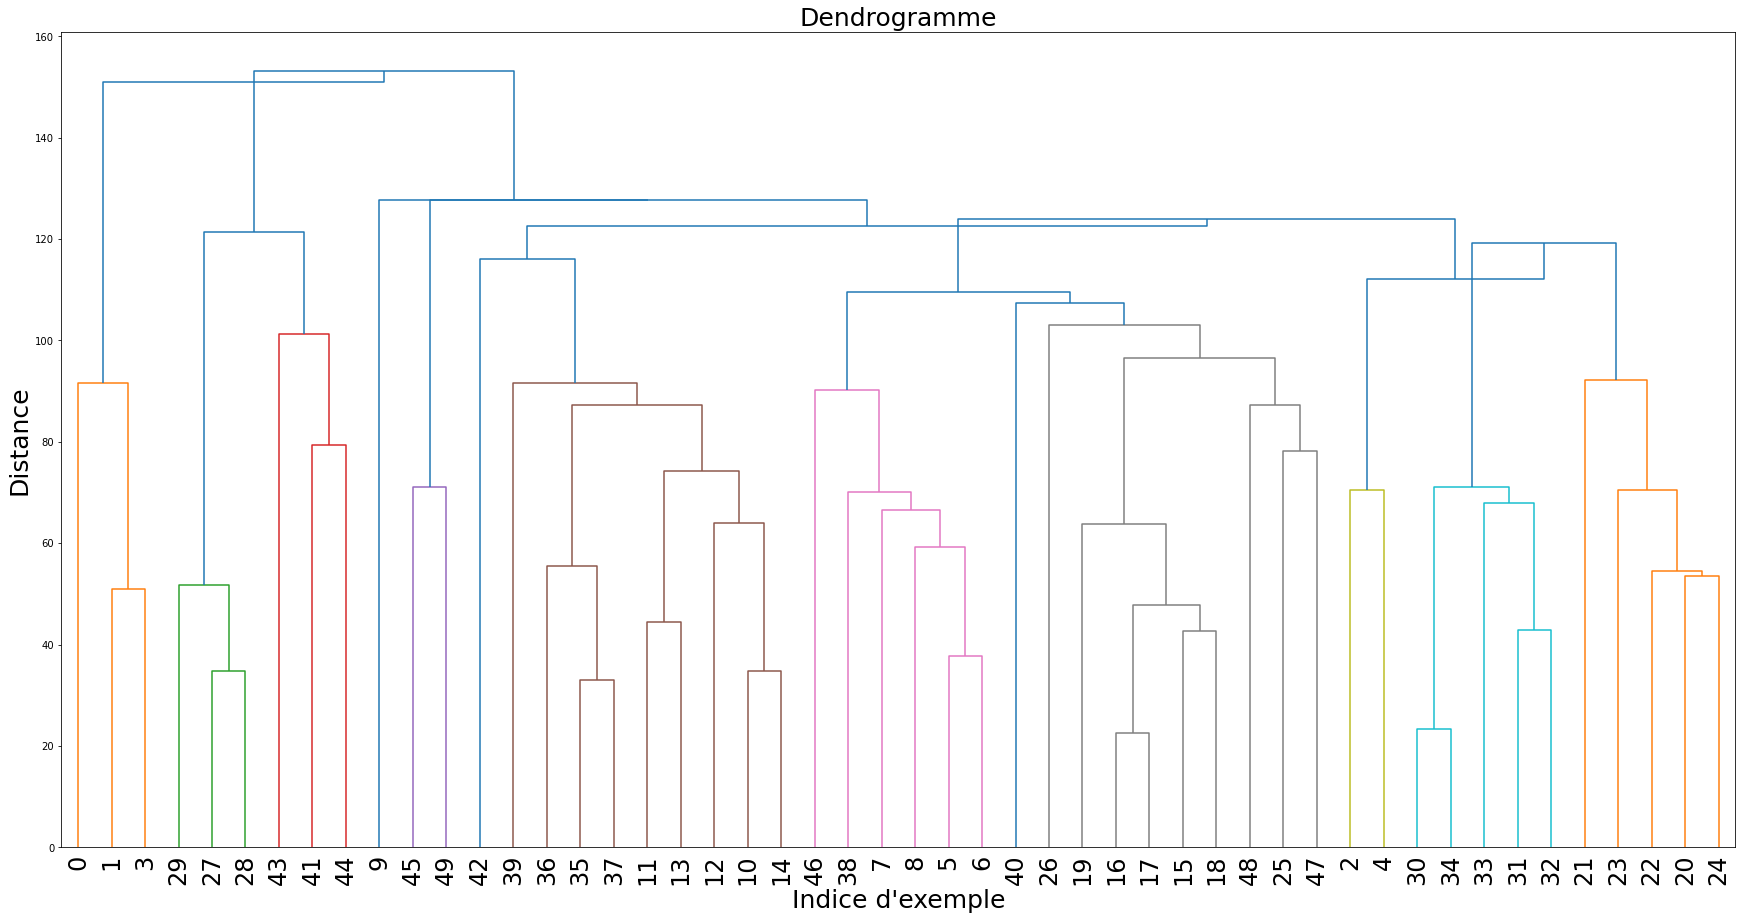

Clustering réalisé en : 7.7316 secondes.


In [44]:
liste_clust_centroid = []

for i in range (10) : 
    Xpartitionne_elt, _ = liste_X_ypartitionne[i]
    
    tic = time.time()  # On lance le chrono
    _,clusters = clust.CHA_centroid10(Xpartitionne_elt, verbose=False,dendrogramme=True)
    toc = time.time()  # On arrête le chrono

    tempsCentroid = toc-tic
    
    liste_clust_centroid.append(clusters)

    print(f'Clustering réalisé en : {(toc-tic):0.4f} secondes.')

In [45]:
# INDICE DE DUNN MOYEN

liste_dunn_index_centroid = []

for i in range (n) : 
    Xpartitionne_elt, _ = liste_X_ypartitionne[i]
    
    dunn_index_centroid = Dunn(np.array(Xpartitionne_elt), liste_clust_centroid[i])

    print("indice de Dunn ", i, ": ", dunn_index_centroid)
    
    liste_dunn_index_centroid.append(dunn_index_centroid)
    
mean_dunn_index_centroid = np.mean(liste_dunn_index_centroid)

print("dunn moyen : ", mean_dunn_index_centroid)

indice de Dunn  0 :  0.435070200504402
indice de Dunn  1 :  0.5530348426373644
indice de Dunn  2 :  0.2992101430604811
indice de Dunn  3 :  0.4751411024198778
indice de Dunn  4 :  0.20914387741430635
indice de Dunn  5 :  0.27105479225331014
indice de Dunn  6 :  0.442492820031073
indice de Dunn  7 :  0.42432446781089944
indice de Dunn  8 :  0.4392783372815754
indice de Dunn  9 :  0.3528666794460157
dunn moyen :  0.39016172628593054


In [46]:
# EVALUATION DE L'ATTRIBUTION DES CLUSTERS

liste_nouveau_dict = []
liste_precisionCentroid = []
liste_rappelCentroid = []
liste_F1_Centroid = []
liste_accuracyCentroid = []

for i in range (n) : 
    
    Xpartitionne_elt, ypartitionne_elt = liste_X_ypartitionne[i]

    nouveau_dict = key_clust(liste_clust_centroid[i], ypartitionne_elt)

    precisionCentroid = precision_clusters(nouveau_dict, ypartitionne_elt)
    rappelCentroid = rappel_clusters(nouveau_dict, ypartitionne_elt)
    F1_Centroid = scoreF1(nouveau_dict, ypartitionne_elt)
    accuracyCentroid = accuracy(ypartitionne_elt, nouveau_dict)
    
    liste_nouveau_dict.append(nouveau_dict)
    liste_precisionCentroid.append(precisionCentroid)
    liste_rappelCentroid.append(rappelCentroid)
    liste_F1_Centroid.append(F1_Centroid)
    liste_accuracyCentroid.append(accuracyCentroid)
    
    print("################# pour le clustering ", i, " #################")
    print()
    print("labels prédits sur les clusters : ", nouveau_dict)
    print()
    print("précision : ", precisionCentroid)
    print()
    print("rappel : ", rappelCentroid)
    print()
    print("scoreF1 : ", F1_Centroid)
    print()
    print("accuracy : ",accuracyCentroid)
    
mean_accuracyCentroid = np.mean(liste_accuracyCentroid)

print("********************* accuracy moyenne : ", mean_accuracyCentroid, " *********************")

################# pour le clustering  0  #################

labels prédits sur les clusters :  {0: [3], 2: [5, 6, 7, 9, 10, 11, 12, 13, 14, 35, 36, 38, 39], 1: [8, 45], 3: [15, 16, 17, 18, 19, 25, 29, 37, 46, 47, 48], 4: [20, 21, 22, 23, 24, 49], 5: [26, 27, 41, 43], 6: [28, 30, 31, 32, 33, 34], 8: [44]}

précision :  {0: (1, 1.0), 2: (5, 0.38461538461538464), 1: (1, 0.5), 3: (5, 0.45454545454545453), 4: (5, 0.8333333333333334), 5: (2, 0.5), 6: (5, 0.8333333333333334), 8: (1, 1.0)}

rappel :  {0: (1, 0.2), 2: (5, 1.0), 1: (1, 0.2), 3: (5, 1.0), 4: (5, 1.0), 5: (2, 0.4), 6: (5, 1.0), 8: (1, 0.2)}

scoreF1 :  {0: 0.33333333333333337, 2: 0.5555555555555556, 1: 0.28571428571428575, 3: 0.625, 4: 0.9090909090909091, 5: 0.4444444444444445, 6: 0.9090909090909091, 8: 0.33333333333333337}

accuracy :  0.5
################# pour le clustering  1  #################

labels prédits sur les clusters :  {0: [4], 1: [5, 6, 7, 8, 35], 2: [9, 10, 11, 12, 13, 14, 36, 37, 38, 39], 3: [15, 16, 17, 18, 19, 

#### CHA Simple

Groupes résultants avec 10 clusters :
{1: [0, 2, 3, 4, 40, 42], 9: [1], 4: [5, 6, 7, 9, 10, 11, 12, 13, 14, 35, 36, 38, 39], 7: [8], 6: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 28, 30, 31, 32, 33, 34, 37, 46, 47, 49], 5: [25, 29, 48], 2: [26, 27, 43], 3: [41], 10: [44], 8: [45]}


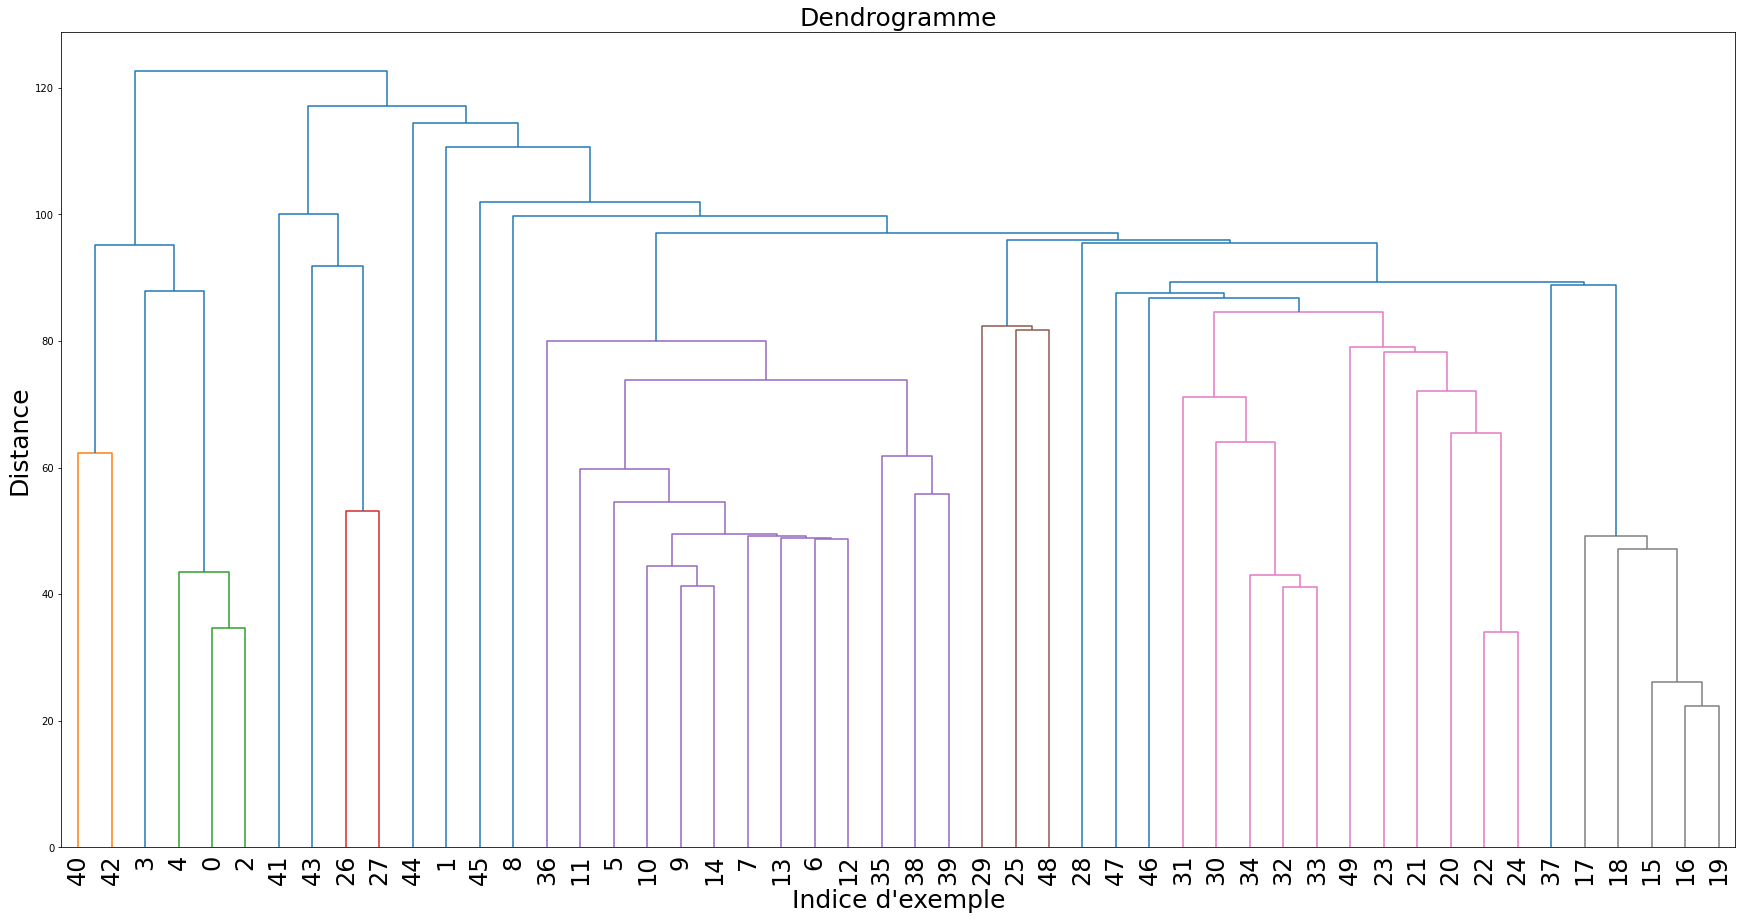

Clustering réalisé en : 7.2650 secondes.
Groupes résultants avec 10 clusters :
{5: [0, 1, 2, 3], 10: [4], 1: [5, 6, 7, 8, 35], 3: [9, 10, 11, 12, 13, 14, 36, 37, 38, 39], 7: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 29, 45, 47, 48, 49], 2: [25, 28], 6: [30, 31, 32, 33, 34], 4: [40, 41, 43, 44], 9: [42], 8: [46]}


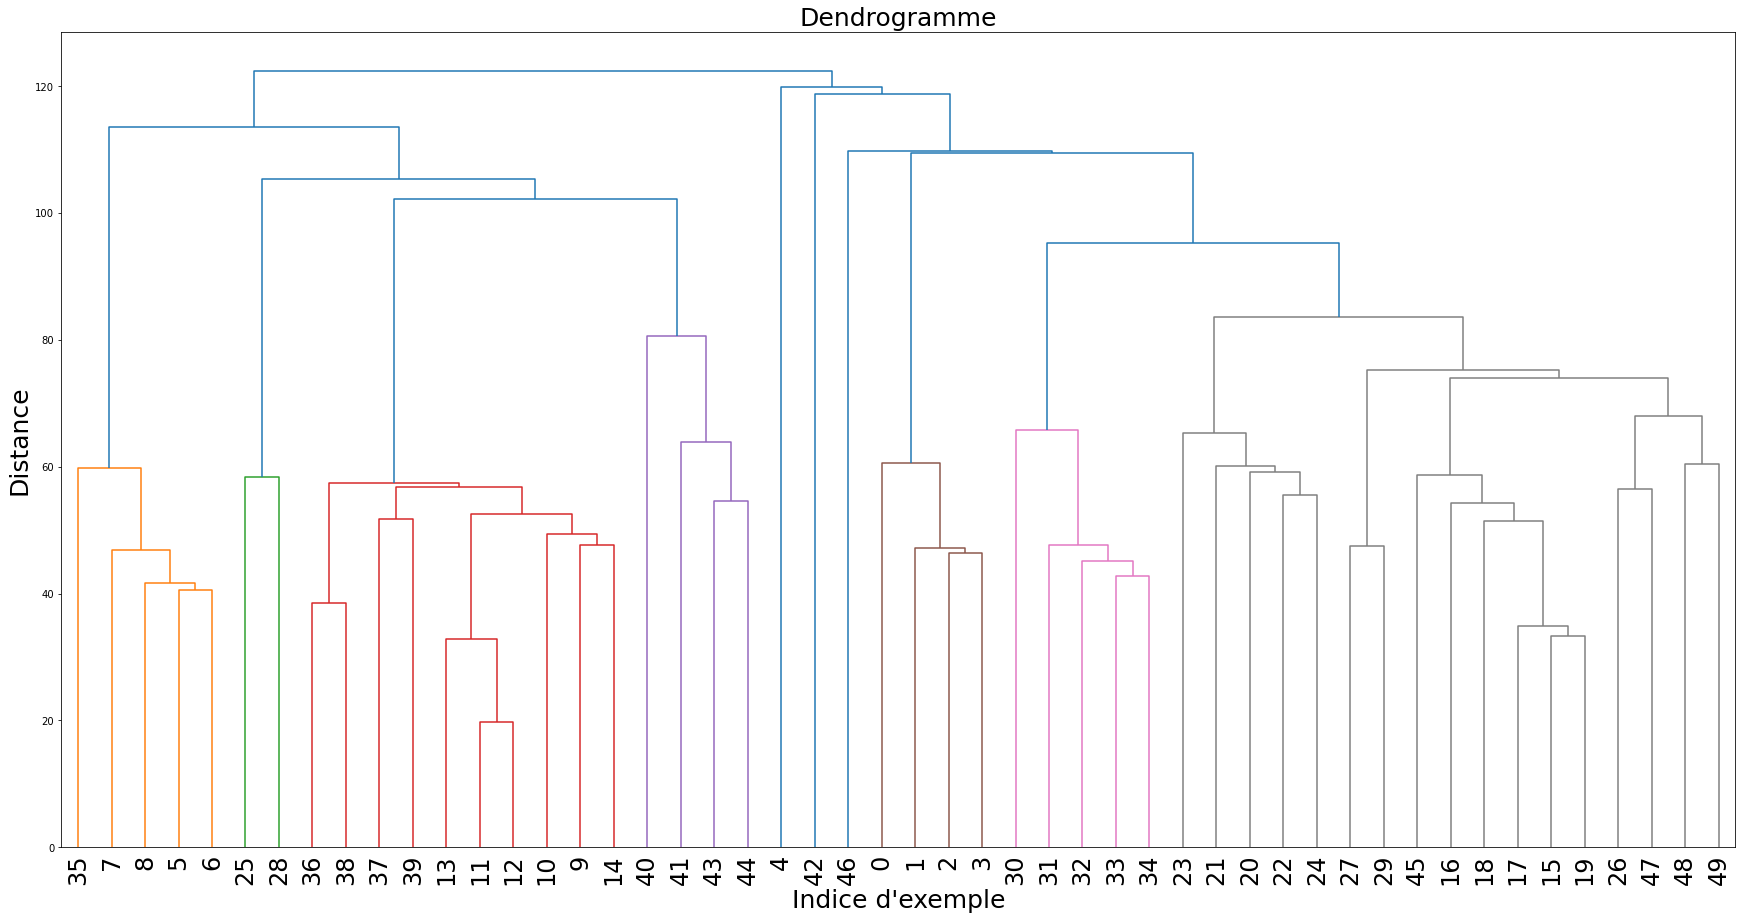

Clustering réalisé en : 7.0150 secondes.
Groupes résultants avec 10 clusters :
{5: [0, 1, 2, 3], 10: [4], 6: [5, 9, 10, 11, 12, 13, 14, 35, 36, 37, 38, 39, 42], 1: [6], 2: [7], 7: [8, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 45, 46, 47, 48, 49], 9: [22], 4: [26], 8: [40], 3: [41, 43, 44]}


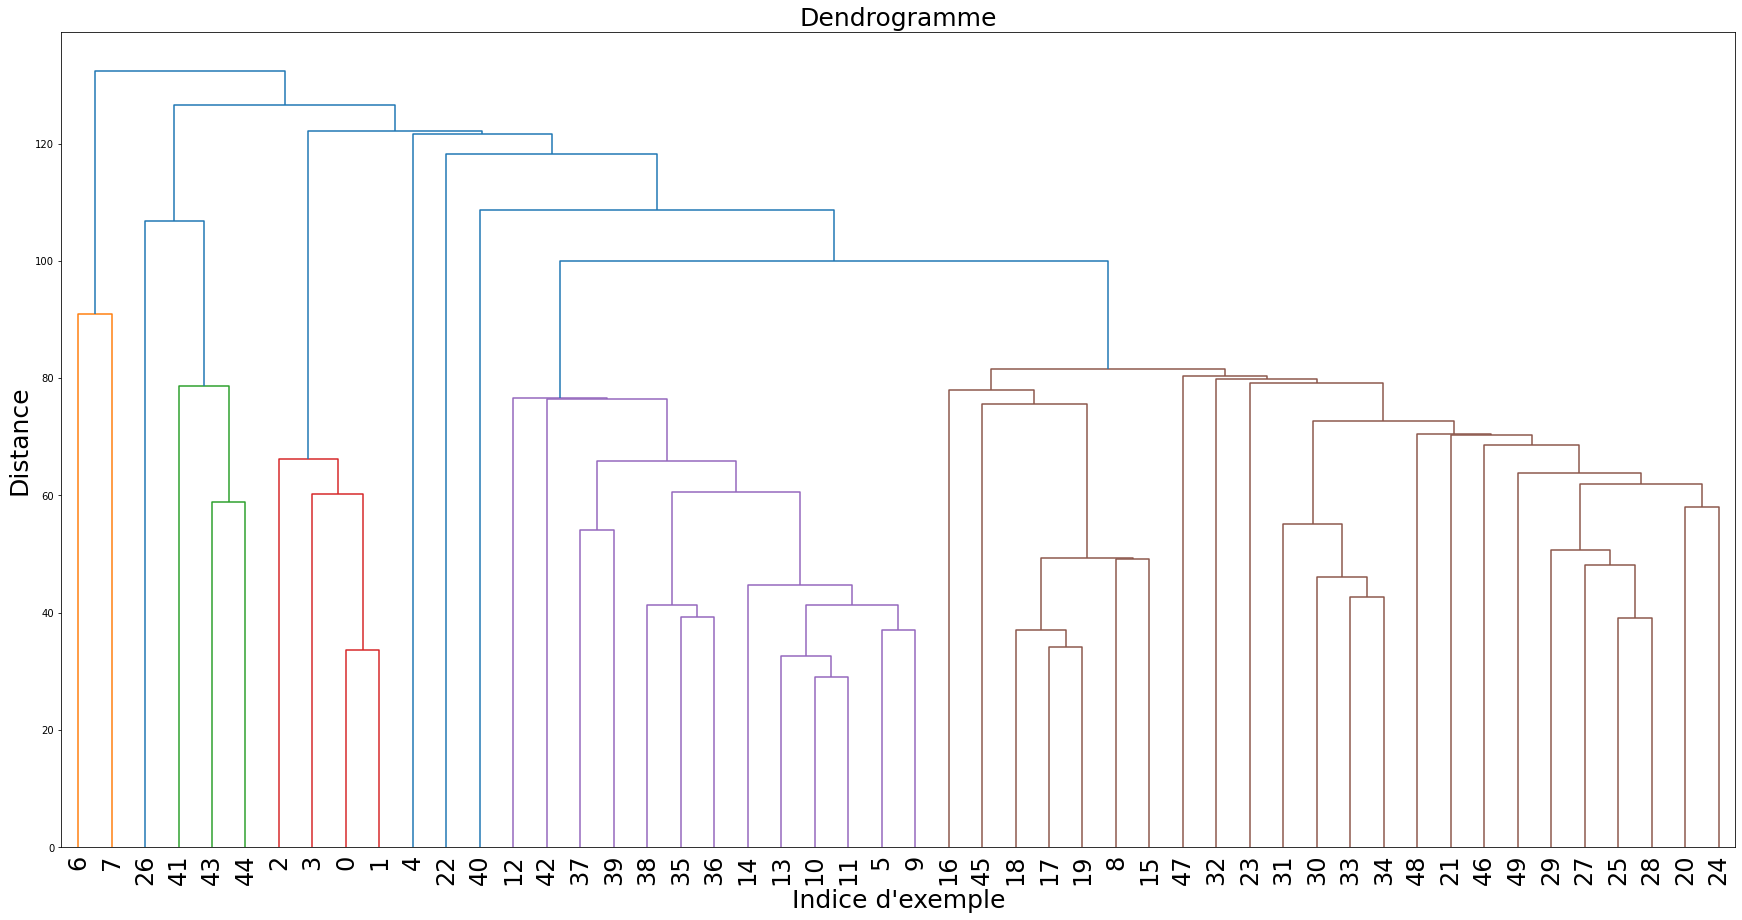

Clustering réalisé en : 6.9323 secondes.
Groupes résultants avec 10 clusters :
{7: [0, 1, 2], 1: [3, 4], 8: [5, 10, 11, 12, 13, 14, 25, 27, 28, 35, 36, 37, 38, 39, 42], 3: [6, 7, 8], 4: [9, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 30, 31, 32, 33, 34, 45, 46, 47, 48, 49], 6: [26], 5: [29], 9: [40], 2: [41, 44], 10: [43]}


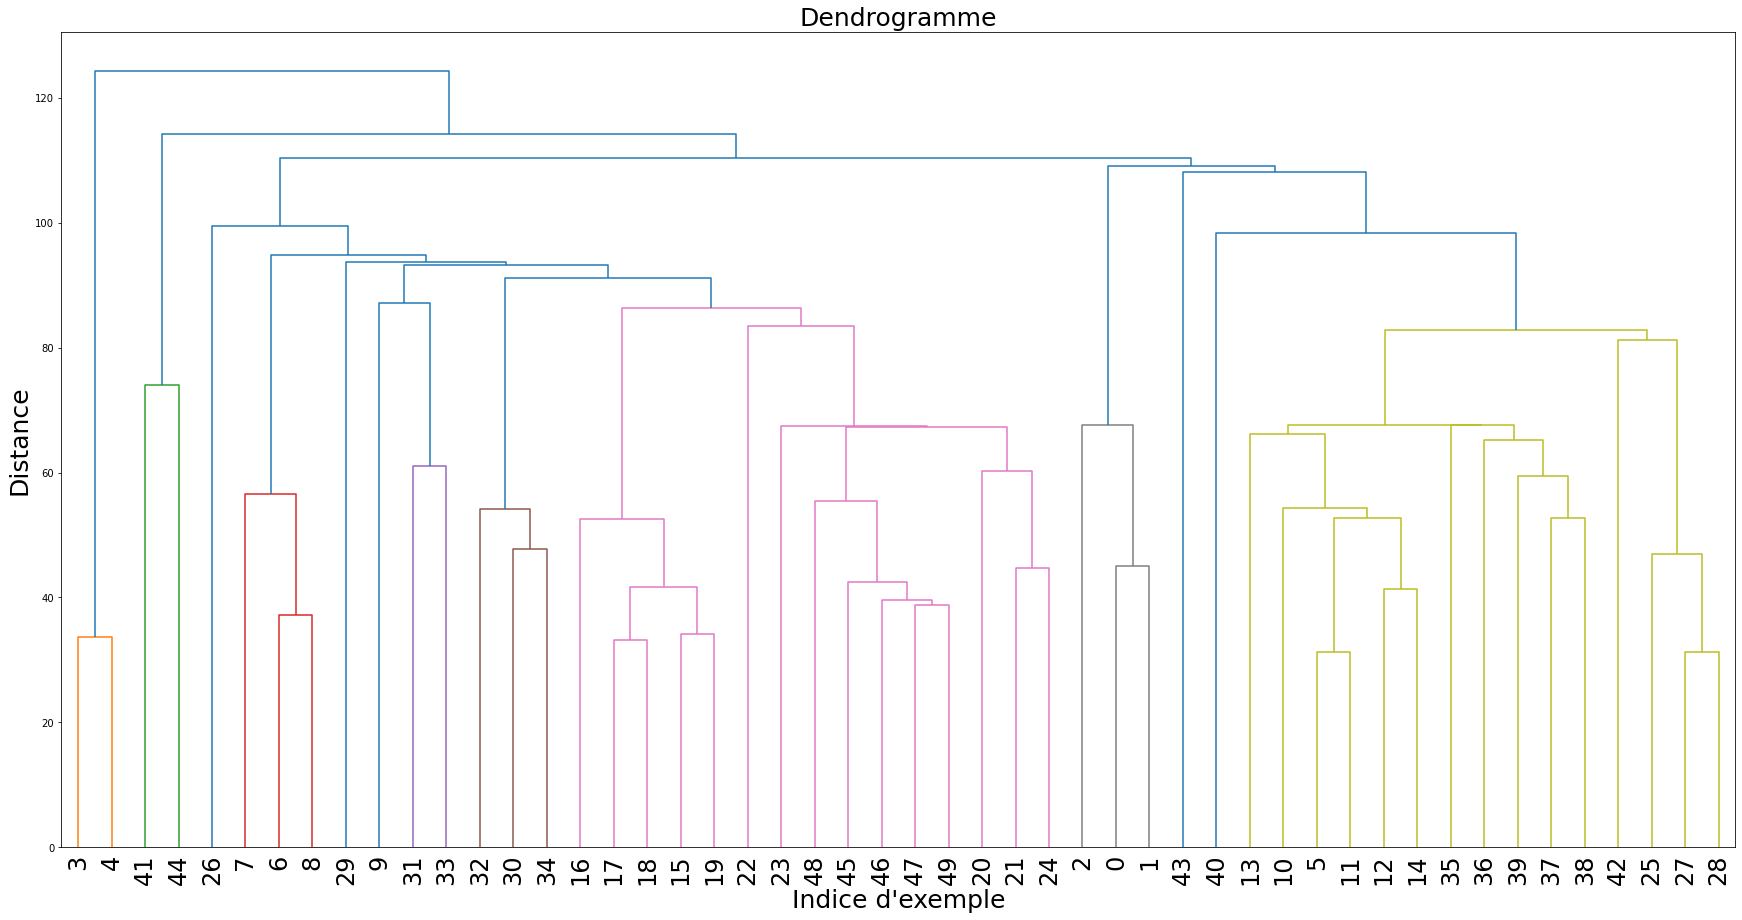

Clustering réalisé en : 7.1646 secondes.
Groupes résultants avec 10 clusters :
{6: [0], 3: [1, 2, 3, 4], 5: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 25, 26, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 45, 47, 49], 4: [20, 21, 22, 23, 24], 1: [27, 28, 29], 2: [40, 41, 44], 10: [42], 9: [43], 7: [46], 8: [48]}


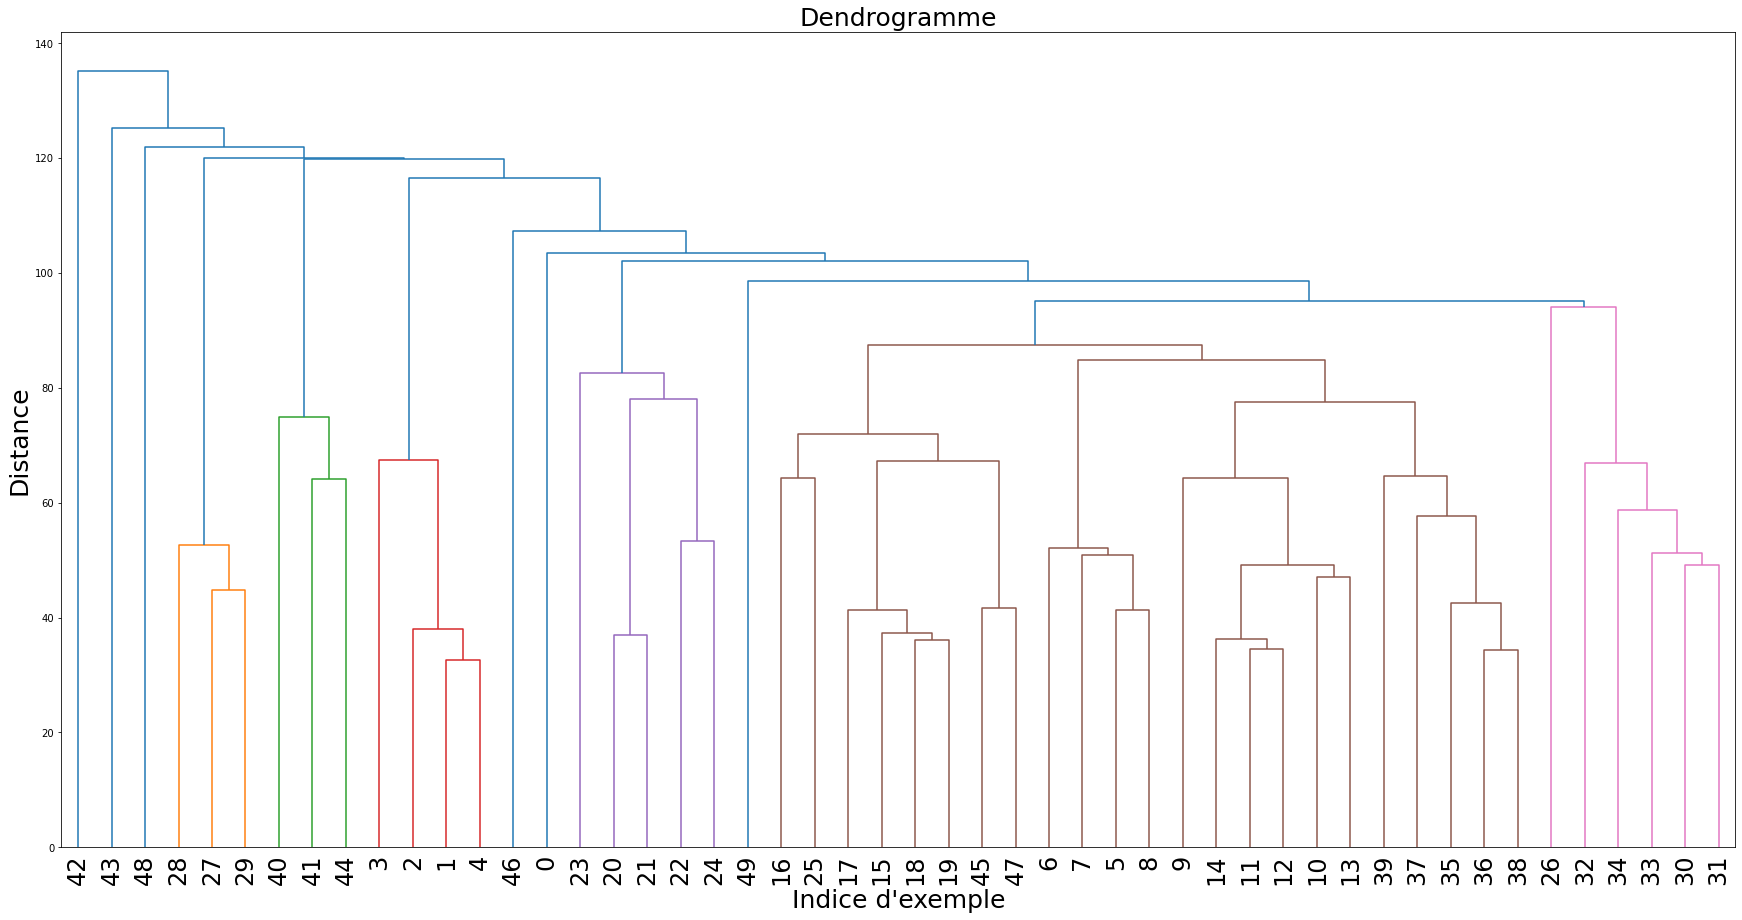

Clustering réalisé en : 6.9986 secondes.
Groupes résultants avec 10 clusters :
{9: [0], 7: [1, 2, 3, 4, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 47, 48, 49], 2: [5, 6], 3: [9], 1: [25, 26], 6: [40, 43], 5: [41, 44], 10: [42], 8: [45], 4: [46]}


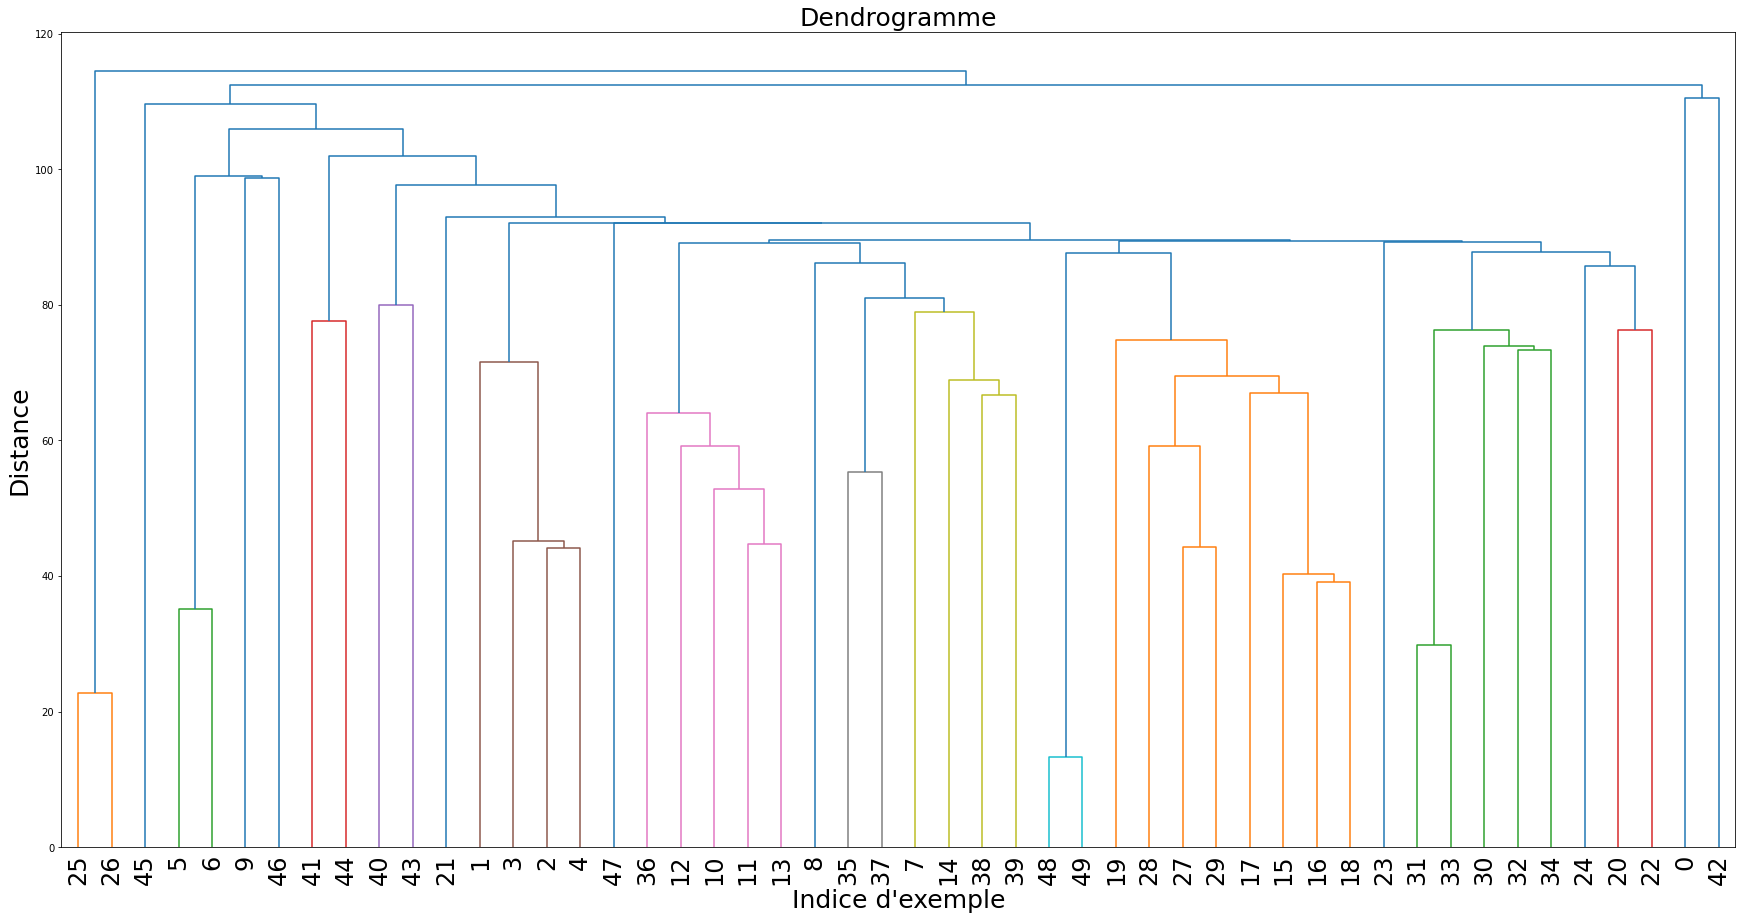

Clustering réalisé en : 8.3533 secondes.
Groupes résultants avec 10 clusters :
{5: [0], 4: [1, 3, 4, 5, 6, 7, 9, 15, 16, 17, 18, 19, 30, 31, 32, 33, 34, 46, 47], 8: [2], 9: [8, 10, 11, 12, 13, 14, 35, 36, 37, 38, 39], 6: [20, 21, 22, 23, 24], 1: [25, 26, 27, 28, 29, 43], 10: [40], 2: [41, 42, 44], 3: [45, 48], 7: [49]}


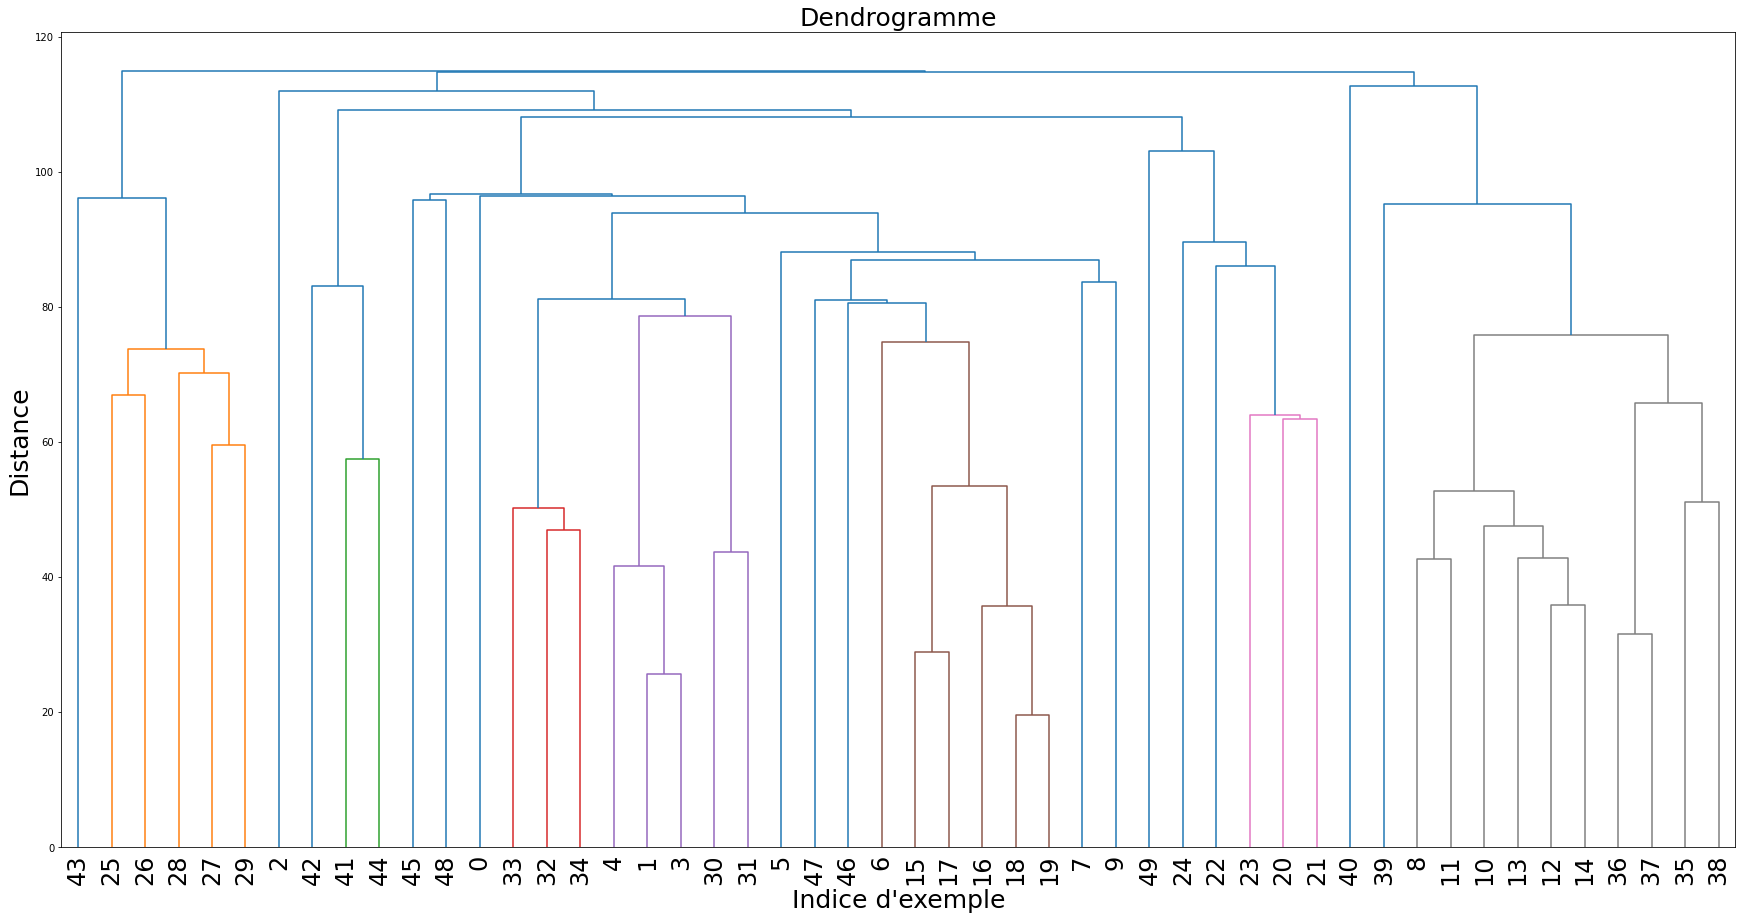

Clustering réalisé en : 8.9519 secondes.
Groupes résultants avec 10 clusters :
{4: [0, 1, 2, 4, 42, 43, 44], 10: [3], 2: [5, 7, 9, 10, 11, 12, 13, 14, 20, 21, 23, 30, 31, 32, 33, 34, 35, 37, 38, 39], 5: [6], 8: [8], 7: [15, 16, 17, 18, 19, 27, 45, 46, 47, 48, 49], 6: [22, 24], 3: [25, 26, 28, 29], 9: [36], 1: [40, 41]}


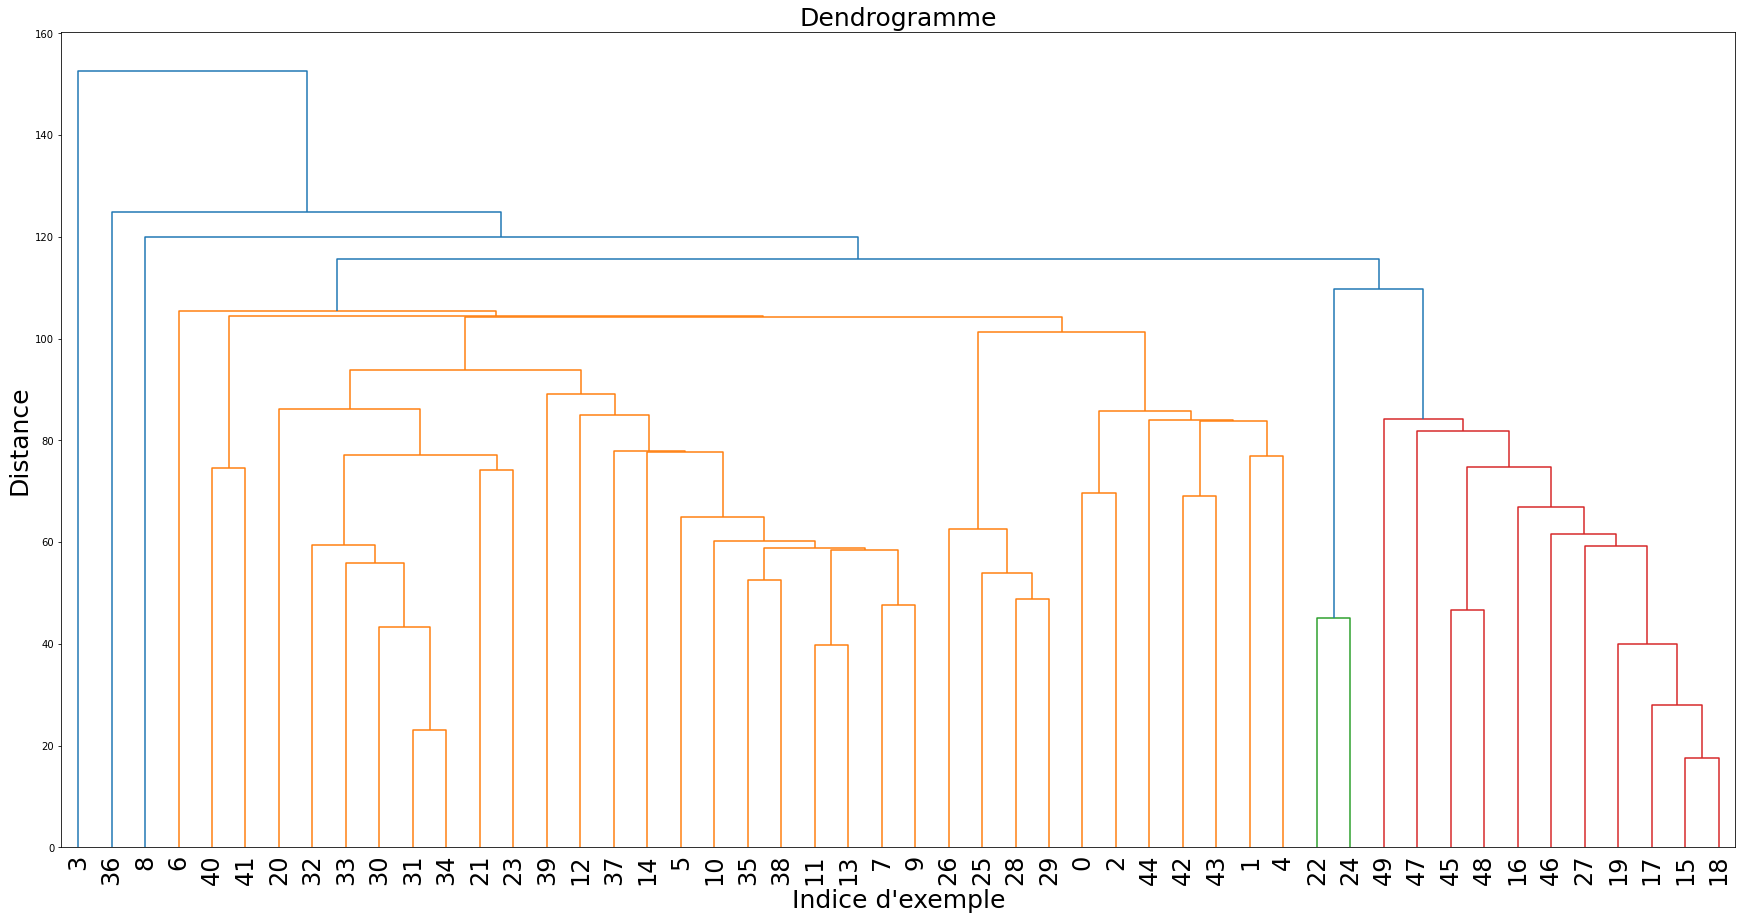

Clustering réalisé en : 7.6993 secondes.
Groupes résultants avec 10 clusters :
{3: [0, 1, 2, 3, 4], 8: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 26, 35, 36, 37, 38, 39, 48, 49], 9: [20], 7: [21, 23, 24, 25, 30, 31, 32, 33, 34], 5: [22, 46], 4: [27, 28, 29, 43, 44], 10: [40], 6: [41, 42], 1: [45], 2: [47]}


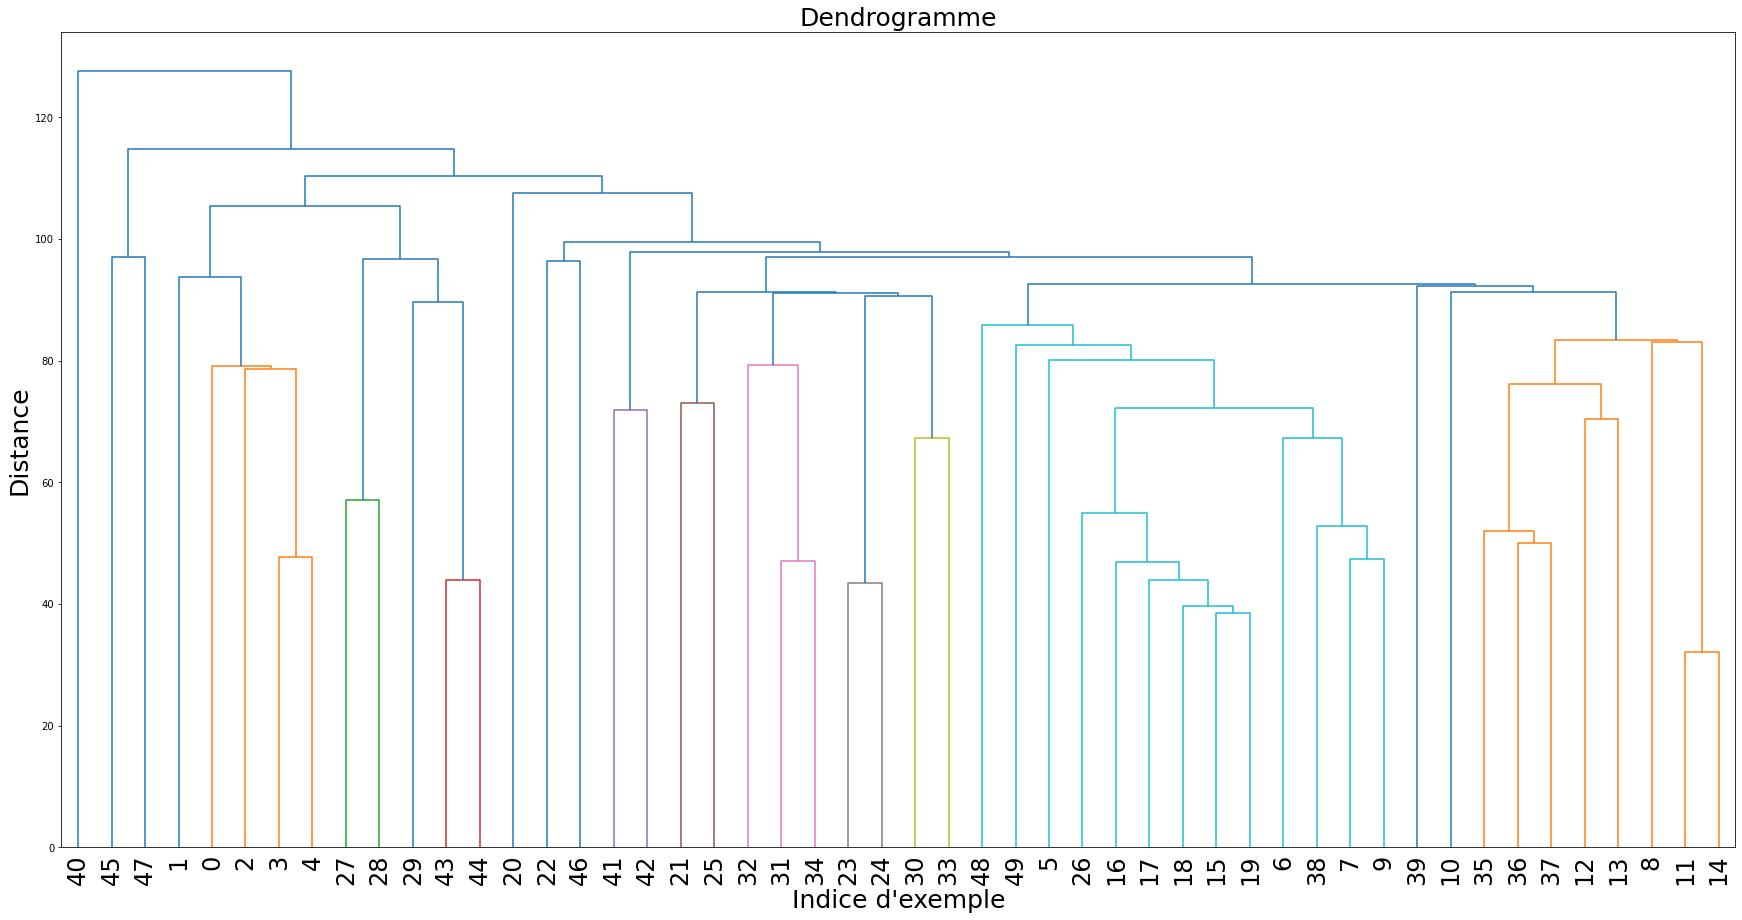

Clustering réalisé en : 7.1091 secondes.
Groupes résultants avec 10 clusters :
{5: [0, 1, 2, 3, 4], 9: [5, 6, 7, 8, 9, 15, 16, 17, 18, 19, 25, 26, 30, 31, 32, 33, 34, 38, 39, 40, 46, 47, 48], 8: [10, 11, 12, 13, 14, 35, 36, 37], 6: [20, 22, 23, 24], 7: [21], 1: [27, 28, 29], 2: [41, 44], 10: [42], 3: [43], 4: [45, 49]}


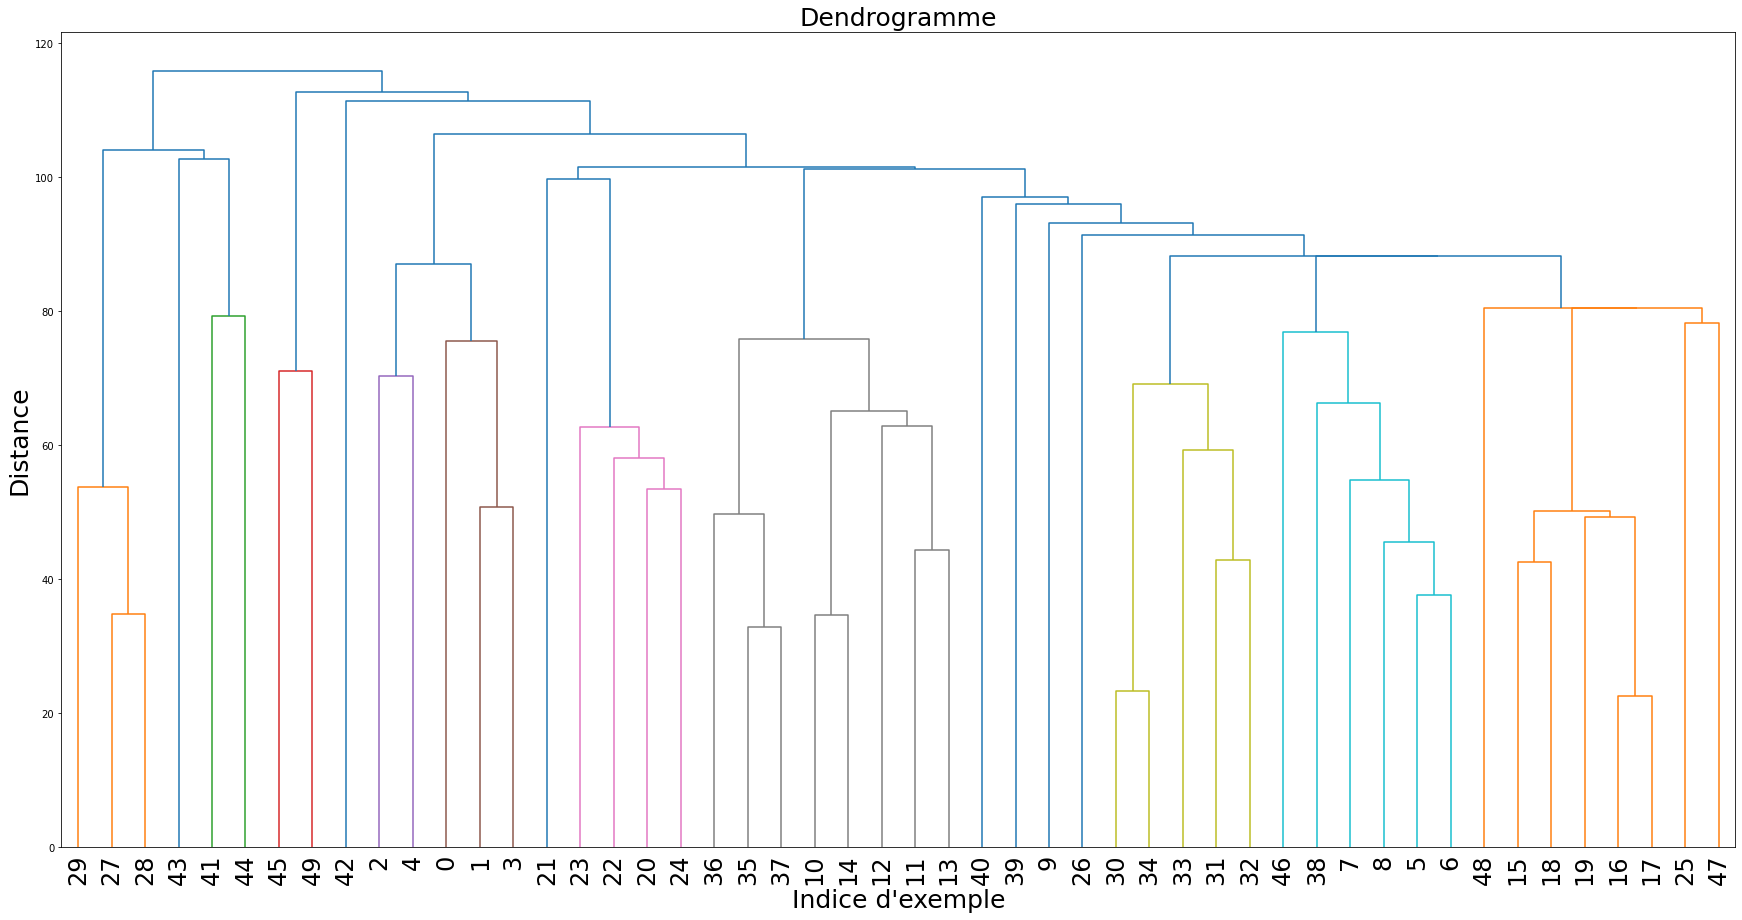

Clustering réalisé en : 7.1516 secondes.


In [47]:
liste_clust_simple = []

for i in range (10) : 
    Xpartitionne_elt, _ = liste_X_ypartitionne[i]
    
    tic = time.time()  # On lance le chrono
    _,clusters = clust.CHA_simple10(Xpartitionne_elt, verbose=False,dendrogramme=True)
    toc = time.time()  # On arrête le chrono

    tempsSimple = toc-tic
    
    liste_clust_simple.append(clusters)

    print(f'Clustering réalisé en : {(toc-tic):0.4f} secondes.')

In [48]:
# INDICE DE DUNN MOYEN

liste_dunn_index_simple = []

for i in range (n) : 
    Xpartitionne_elt, _ = liste_X_ypartitionne[i]
    
    dunn_index_simple = Dunn(np.array(Xpartitionne_elt), liste_clust_simple[i])

    print("indice de Dunn ", i, ": ", dunn_index_simple)
    
    liste_dunn_index_simple.append(dunn_index_simple)
    
mean_dunn_index_simple = np.mean(liste_dunn_index_simple)

print("dunn moyen : ", mean_dunn_index_simple)

indice de Dunn  0 :  0.24327098510713197
indice de Dunn  1 :  0.3090027349524934
indice de Dunn  2 :  0.21048000252104423
indice de Dunn  3 :  0.223667308779884
indice de Dunn  4 :  0.19699772542003985
indice de Dunn  5 :  0.1459411945377547
indice de Dunn  6 :  0.2132371012944494
indice de Dunn  7 :  0.2676664650657234
indice de Dunn  8 :  0.20672331335191652
indice de Dunn  9 :  0.1937734845645879
dunn moyen :  0.22107603155950253


In [49]:
# EVALUATION DE L'ATTRIBUTION DES CLUSTERS

liste_nouveau_dict = []
liste_precisionSimple = []
liste_rappelSimple = []
liste_F1_Simple = []
liste_accuracySimple = []

for i in range (n) : 
    
    Xpartitionne_elt, ypartitionne_elt = liste_X_ypartitionne[i]

    nouveau_dict = key_clust(liste_clust_simple[i], ypartitionne_elt)

    precisionSimple = precision_clusters(nouveau_dict, ypartitionne_elt)
    rappelSimple = rappel_clusters(nouveau_dict, ypartitionne_elt)
    F1_Simple = scoreF1(nouveau_dict, ypartitionne_elt)
    accuracySimple = accuracy(ypartitionne_elt, nouveau_dict)
    
    liste_nouveau_dict.append(nouveau_dict)
    liste_precisionSimple.append(precisionSimple)
    liste_rappelSimple.append(rappelSimple)
    liste_F1_Simple.append(F1_Simple)
    liste_accuracySimple.append(accuracySimple)
    
    print("################# pour le clustering ", i, " #################")
    print()
    print("labels prédits sur les clusters : ", nouveau_dict)
    print()
    print("précision : ", precisionSimple)
    print()
    print("rappel : ", rappelSimple)
    print()
    print("scoreF1 : ", F1_Simple)
    print()
    print("accuracy : ",accuracySimple)
    
mean_accuracySimple = np.mean(liste_accuracySimple)

print("********************* accuracy moyenne : ", mean_accuracySimple, " *********************")

################# pour le clustering  0  #################

labels prédits sur les clusters :  {0: [1], 2: [5, 6, 7, 9, 10, 11, 12, 13, 14, 35, 36, 38, 39], 1: [8], 3: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 28, 30, 31, 32, 33, 34, 37, 46, 47, 49], 5: [26, 27, 43], 8: [44], 9: [45]}

précision :  {0: (1, 1.0), 2: (5, 0.38461538461538464), 1: (1, 1.0), 3: (5, 0.25), 5: (2, 0.6666666666666666), 8: (1, 1.0), 9: (1, 1.0)}

rappel :  {0: (1, 0.2), 2: (5, 1.0), 1: (1, 0.2), 3: (5, 1.0), 5: (2, 0.4), 8: (1, 0.2), 9: (1, 0.2)}

scoreF1 :  {0: 0.33333333333333337, 2: 0.5555555555555556, 1: 0.33333333333333337, 3: 0.4, 5: 0.5, 8: 0.33333333333333337, 9: 0.33333333333333337}

accuracy :  0.32
################# pour le clustering  1  #################

labels prédits sur les clusters :  {0: [4], 1: [5, 6, 7, 8, 35], 2: [9, 10, 11, 12, 13, 14, 36, 37, 38, 39], 3: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 29, 45, 47, 48, 49], 5: [25, 28], 6: [30, 31, 32, 33, 34], 8: [42], 9: [46]}

précision

#### CHA Complete

Groupes résultants avec 10 clusters :
{9: [0, 2, 4, 40, 42], 8: [1, 3], 2: [5, 6, 7, 9, 10, 11, 12, 13, 14], 4: [8, 44, 45], 5: [15, 16, 18, 19, 46, 47, 49], 6: [17, 25, 29, 37, 48], 7: [20, 21, 22, 23, 24], 10: [26, 27, 41, 43], 3: [28, 30, 31, 32, 33, 34], 1: [35, 36, 38, 39]}


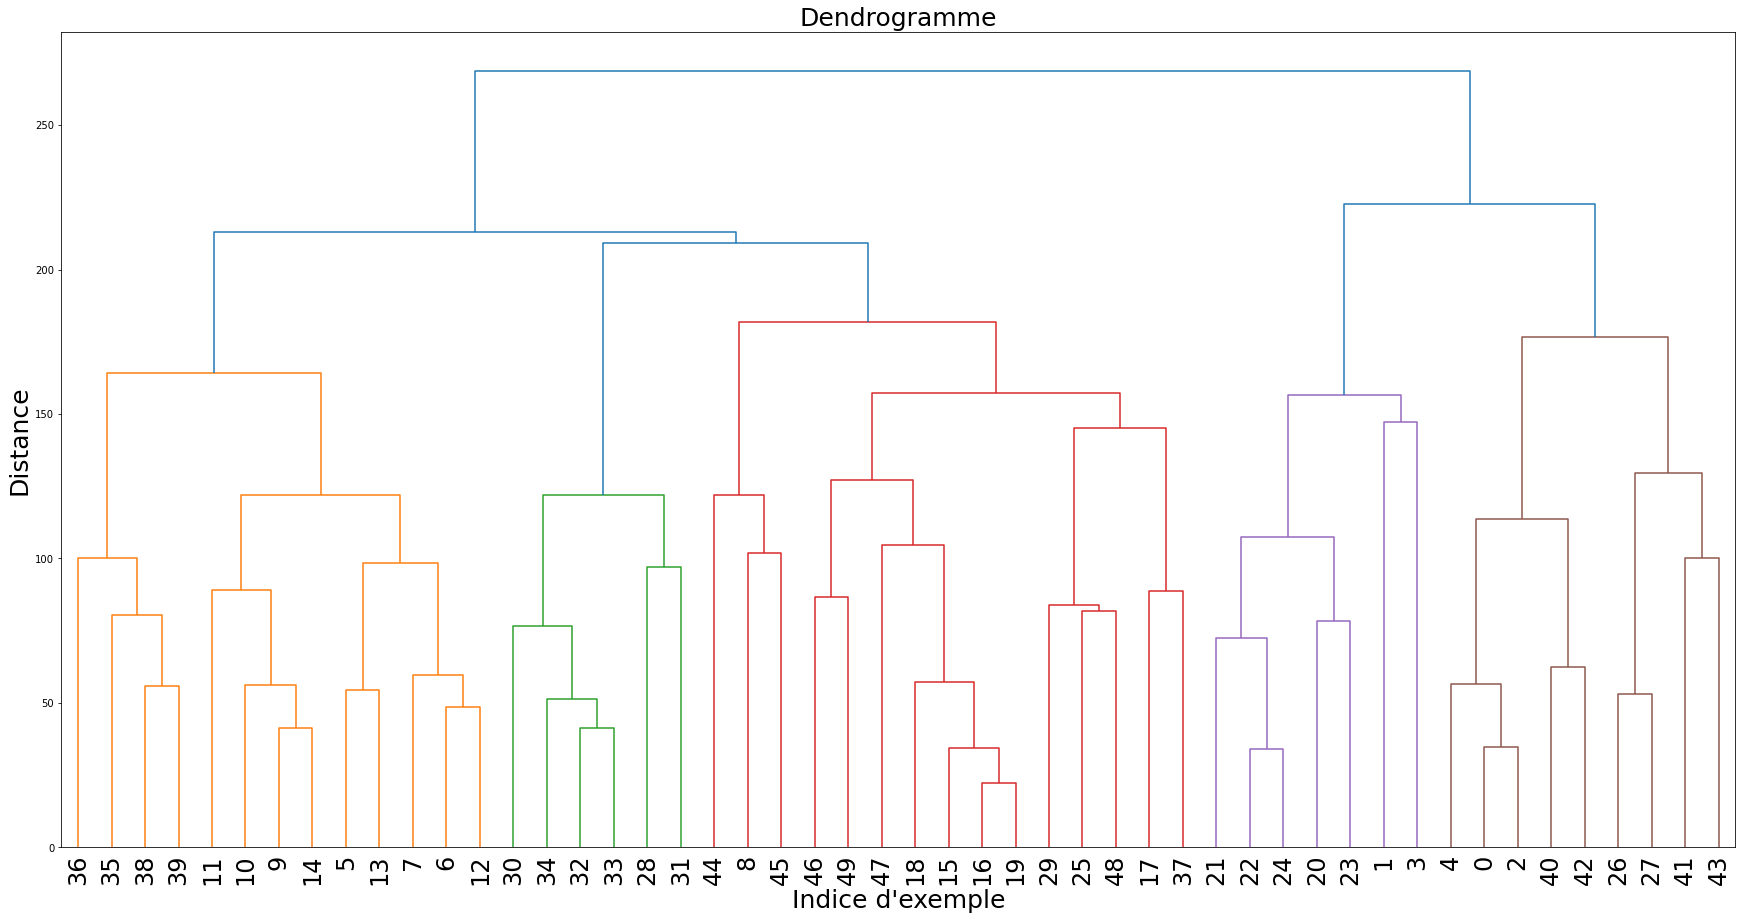

Clustering réalisé en : 6.9424 secondes.
Groupes résultants avec 10 clusters :
{4: [0, 1, 2, 3, 42], 5: [4], 9: [5, 6, 7, 8, 35], 1: [9, 10, 11, 12, 13, 14, 36, 37, 38, 39], 8: [15, 16, 17, 18, 19, 27, 29, 45], 10: [20, 21, 22, 23, 24, 46], 2: [25, 28], 7: [26, 47, 48, 49], 6: [30, 31, 32, 33, 34], 3: [40, 41, 43, 44]}


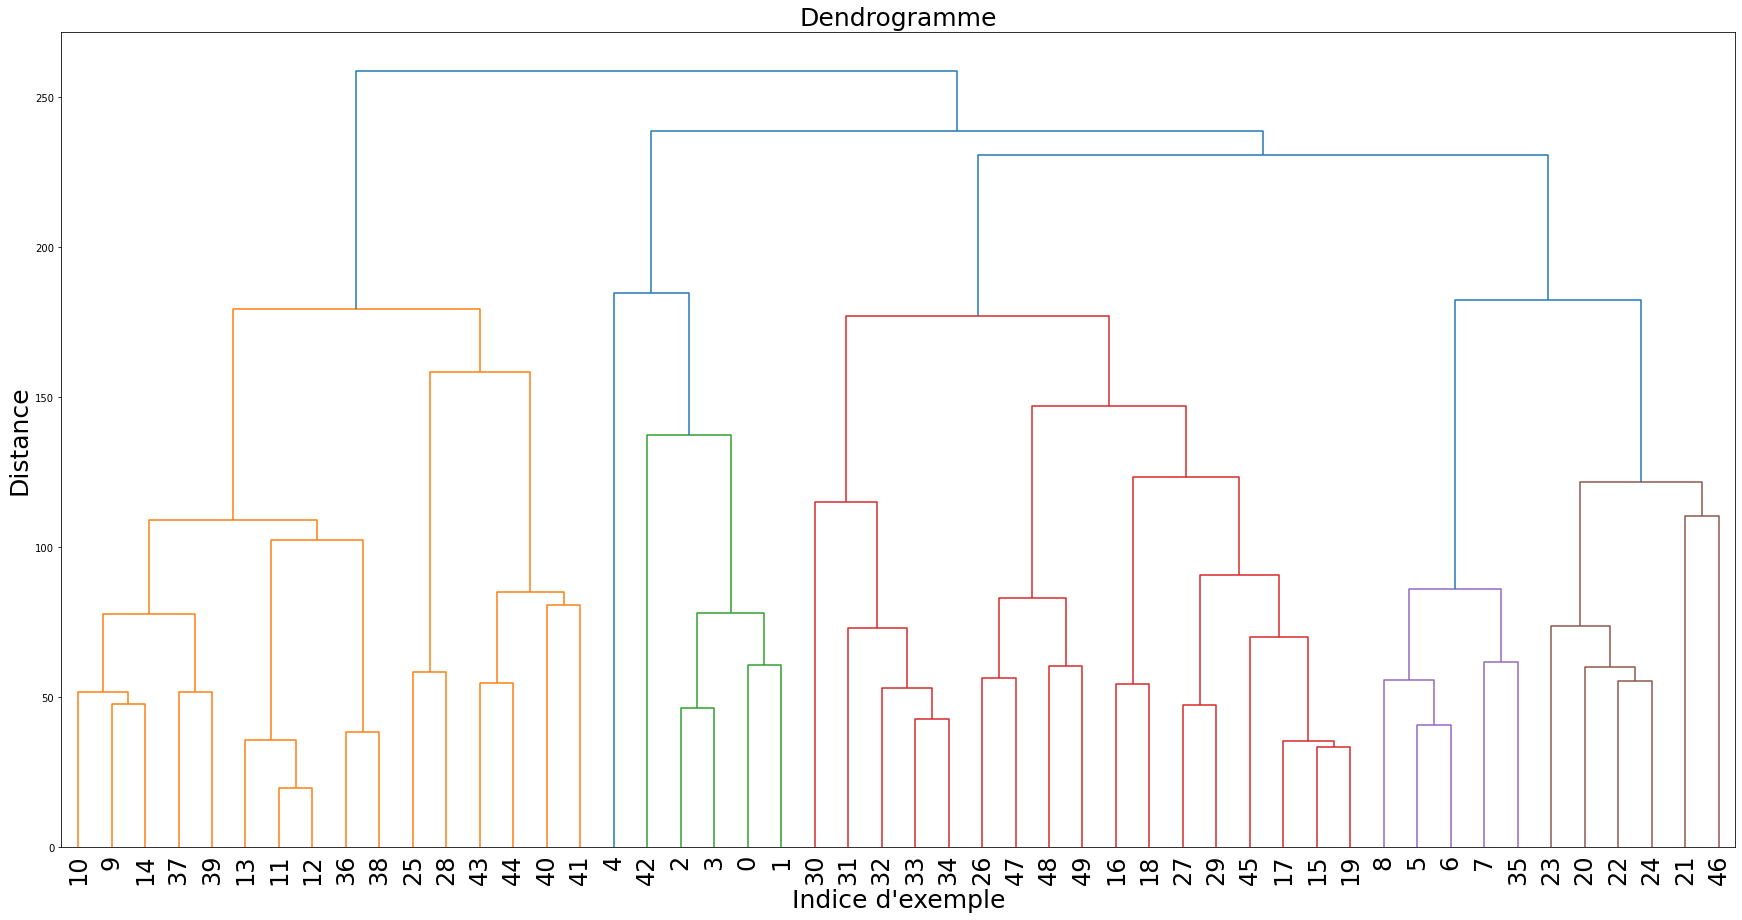

Clustering réalisé en : 7.1696 secondes.
Groupes résultants avec 10 clusters :
{1: [0, 1, 2, 3], 10: [4], 5: [5, 9, 10, 11, 12, 13, 14, 35, 36, 37, 38, 39], 3: [6, 7], 4: [8, 15, 16, 17, 18, 19, 25, 27, 28, 29, 45, 46, 47, 48, 49], 6: [20, 24, 30], 7: [21, 22, 23], 2: [26, 41, 43, 44], 9: [31, 33, 34, 40], 8: [32, 42]}


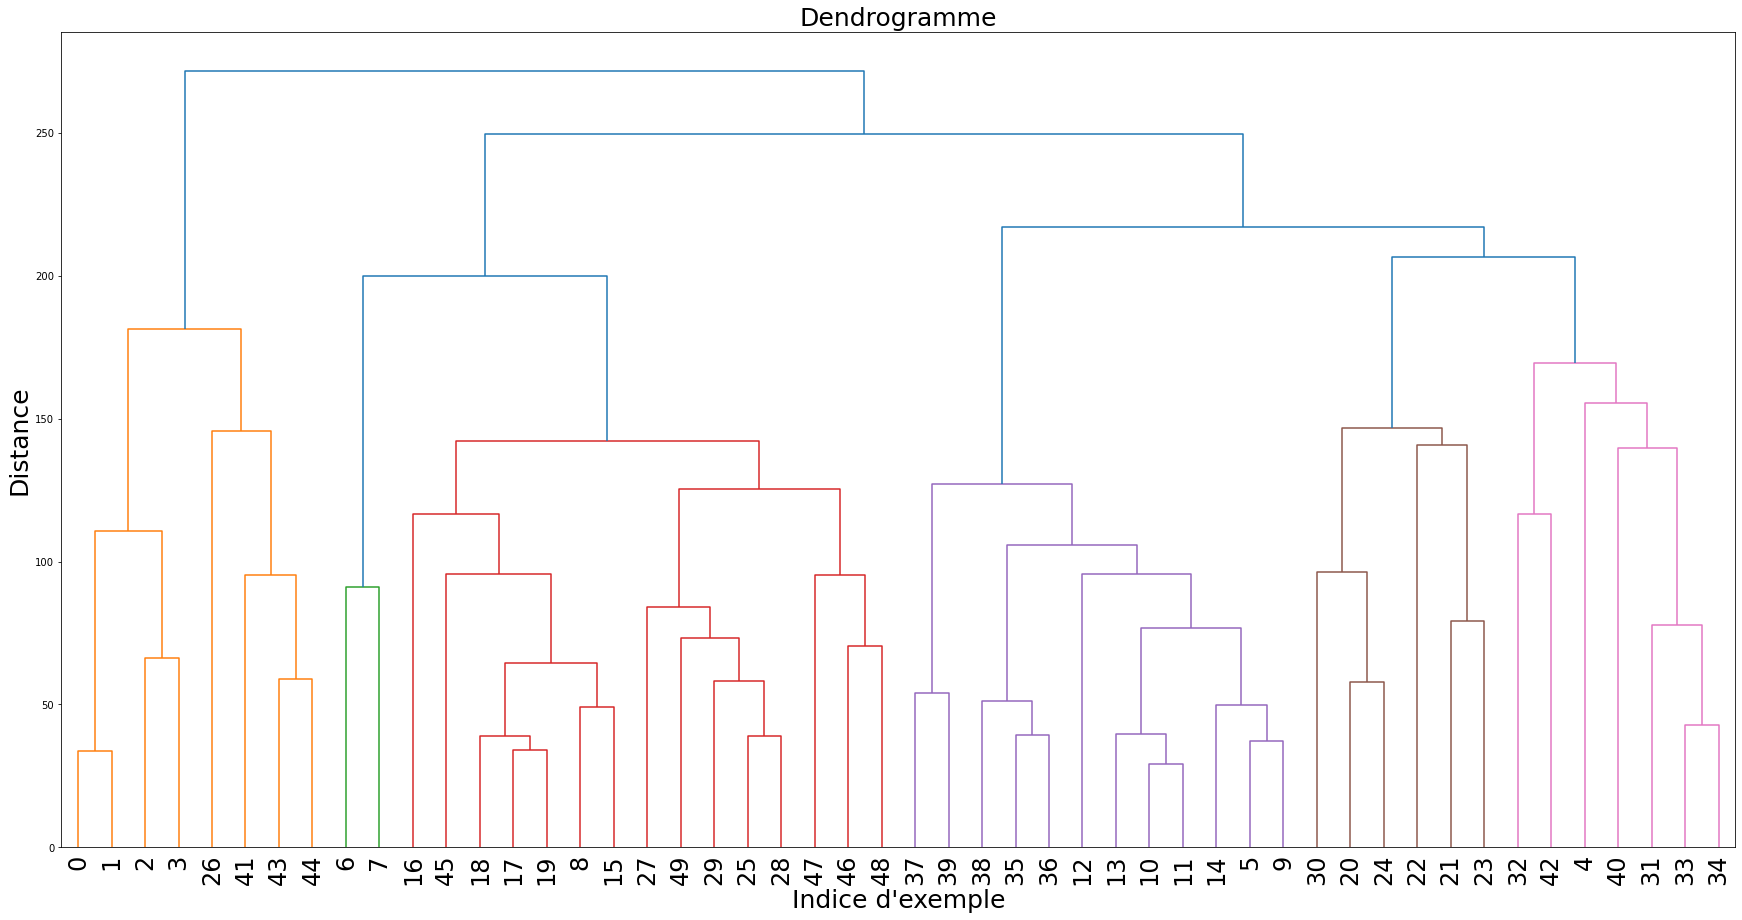

Clustering réalisé en : 6.9783 secondes.
Groupes résultants avec 10 clusters :
{10: [0, 1, 2], 1: [3, 4], 5: [5, 10, 11, 12, 13, 14, 35, 36, 43], 2: [6, 7, 8], 7: [9, 26, 29, 31, 33], 4: [15, 16, 17, 18, 19, 20, 45, 46, 47, 48, 49], 3: [21, 22, 23, 24], 8: [25, 27, 28, 37, 38, 39, 40, 42], 6: [30, 32, 34], 9: [41, 44]}


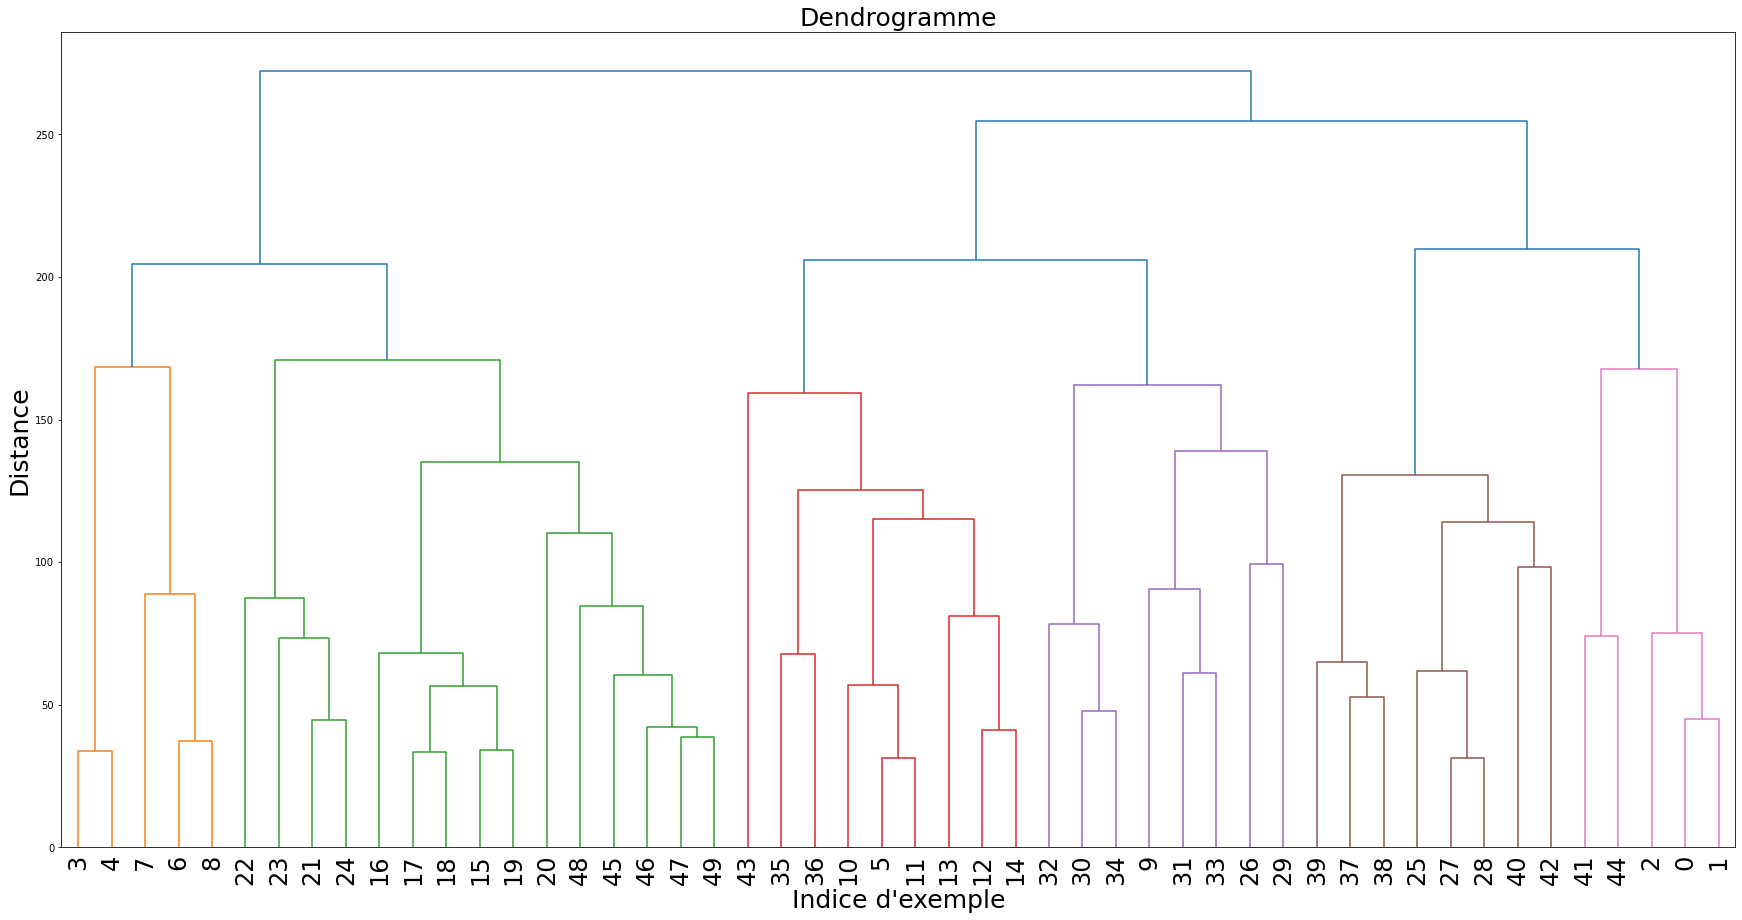

Clustering réalisé en : 8.2614 secondes.
Groupes résultants avec 10 clusters :
{3: [0, 42, 43], 4: [1, 2, 3, 4], 10: [5, 6, 7, 8, 46], 7: [9, 35, 36, 37, 38, 39], 6: [10, 11, 12, 13, 14], 9: [15, 16, 17, 18, 19, 25, 45, 47], 8: [20, 21, 22, 23, 24, 26, 49], 1: [27, 28, 29, 40, 41, 44], 2: [30, 31, 32, 33, 34], 5: [48]}


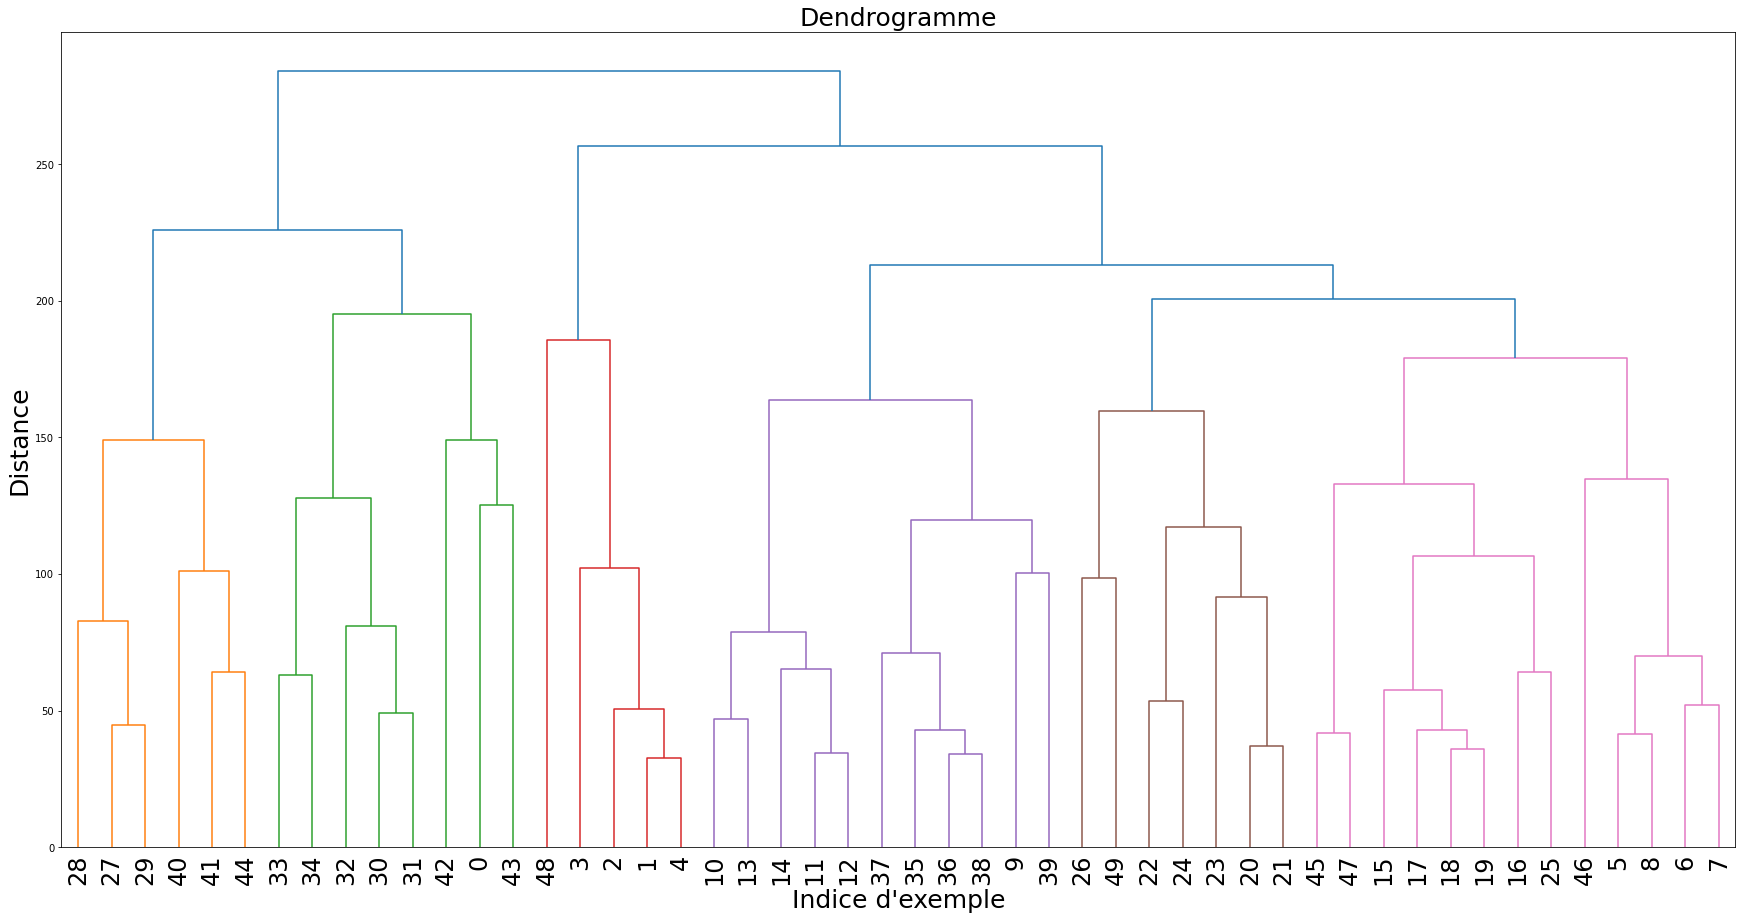

Clustering réalisé en : 7.8857 secondes.
Groupes résultants avec 10 clusters :
{4: [0, 42], 8: [1, 21, 23], 10: [2, 3, 4, 40, 43], 1: [5, 6, 45], 2: [7, 8, 14, 15, 16, 17, 18, 19, 27, 28, 29, 48, 49], 7: [9, 46], 6: [10, 11, 12, 13, 35, 36, 37, 38, 39], 3: [20, 22, 24, 47], 9: [25, 26, 41, 44], 5: [30, 31, 32, 33, 34]}


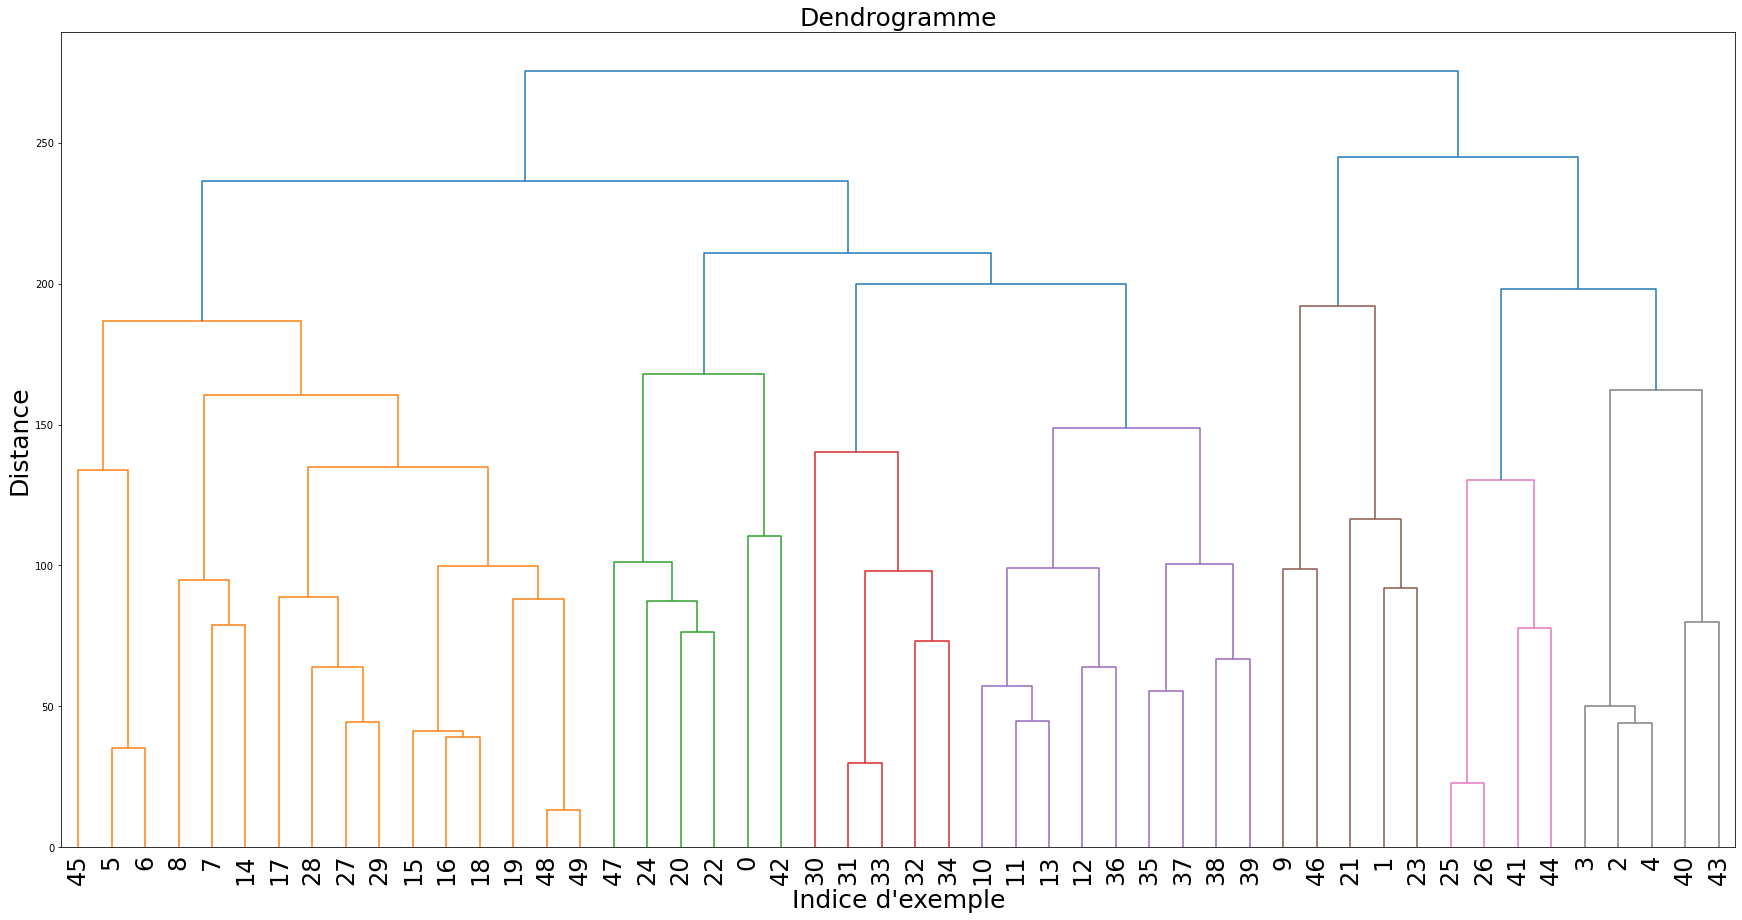

Clustering réalisé en : 8.7348 secondes.
Groupes résultants avec 10 clusters :
{3: [0, 1, 3, 4, 30, 31], 6: [2], 4: [5, 7, 9, 45, 48], 9: [6, 15, 16, 17, 18, 19, 39], 10: [8, 10, 11, 12, 13, 14, 35, 36, 37, 38, 40], 5: [20, 21, 22, 23, 24], 1: [25, 26, 27, 28, 29, 43], 7: [32, 33, 34], 2: [41, 42, 44], 8: [46, 47, 49]}


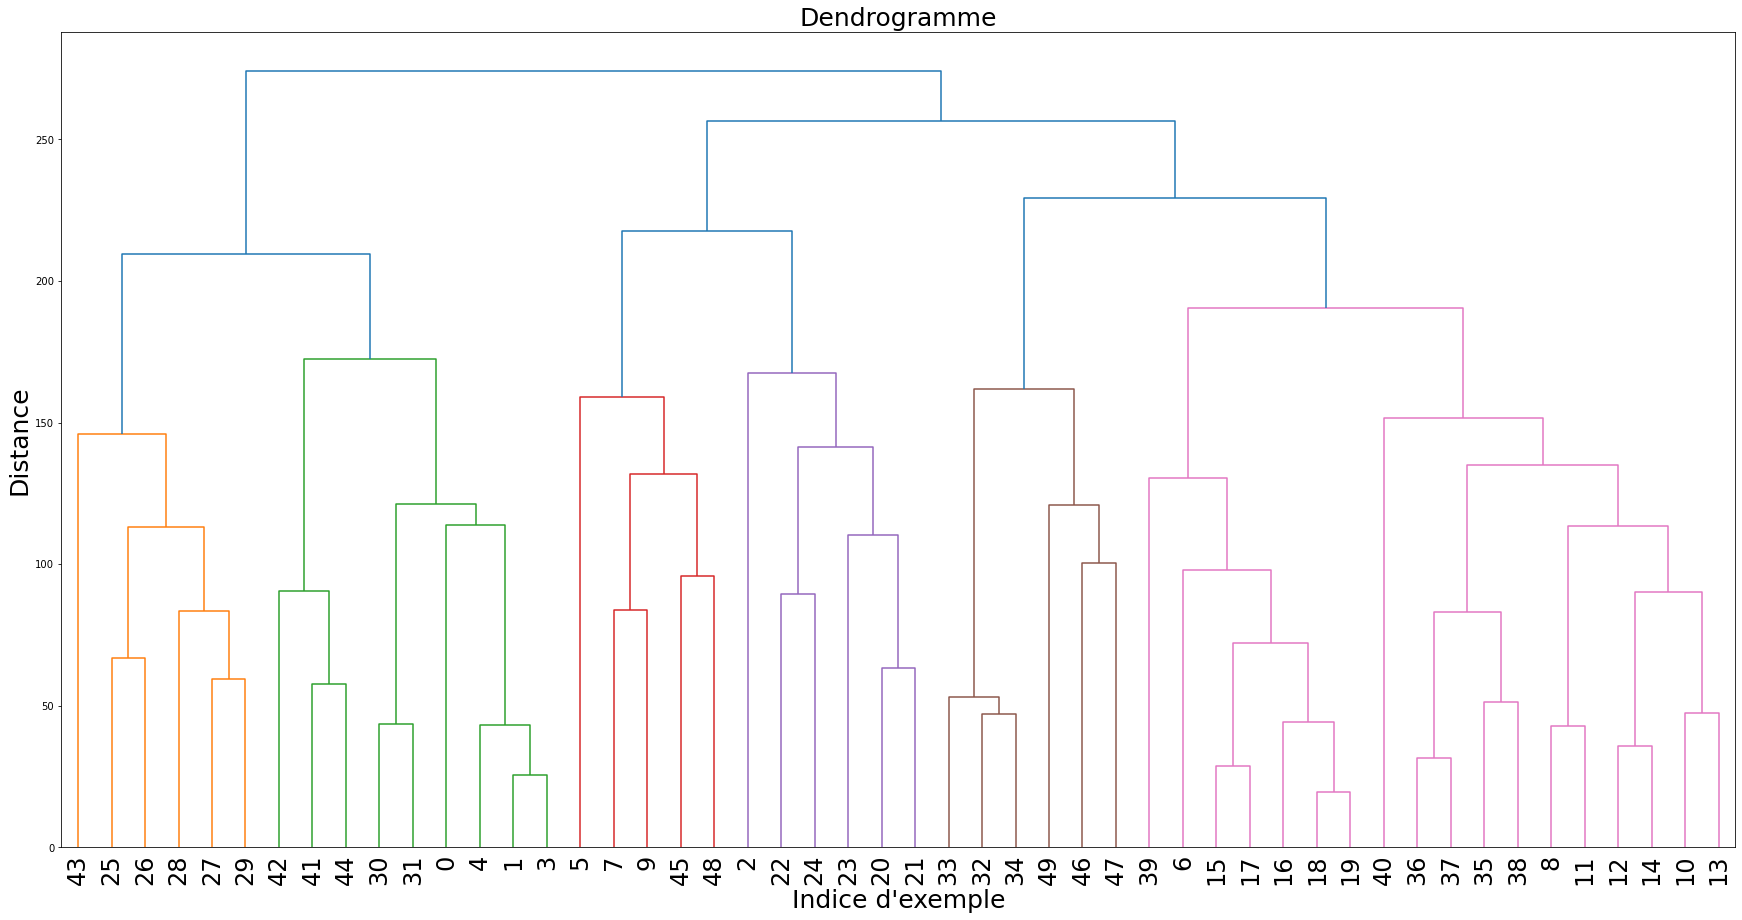

Clustering réalisé en : 7.4793 secondes.
Groupes résultants avec 10 clusters :
{7: [0, 2], 8: [1, 4], 6: [3], 1: [5, 7, 9, 10, 11, 12, 13, 14, 35, 37, 38, 39], 3: [6, 8], 2: [15, 16, 17, 18, 19, 27, 45, 46, 47, 48, 49], 5: [20, 22, 24], 4: [21, 23, 30, 31, 32, 33, 34], 9: [25, 26, 28, 29], 10: [36, 40, 41, 42, 43, 44]}


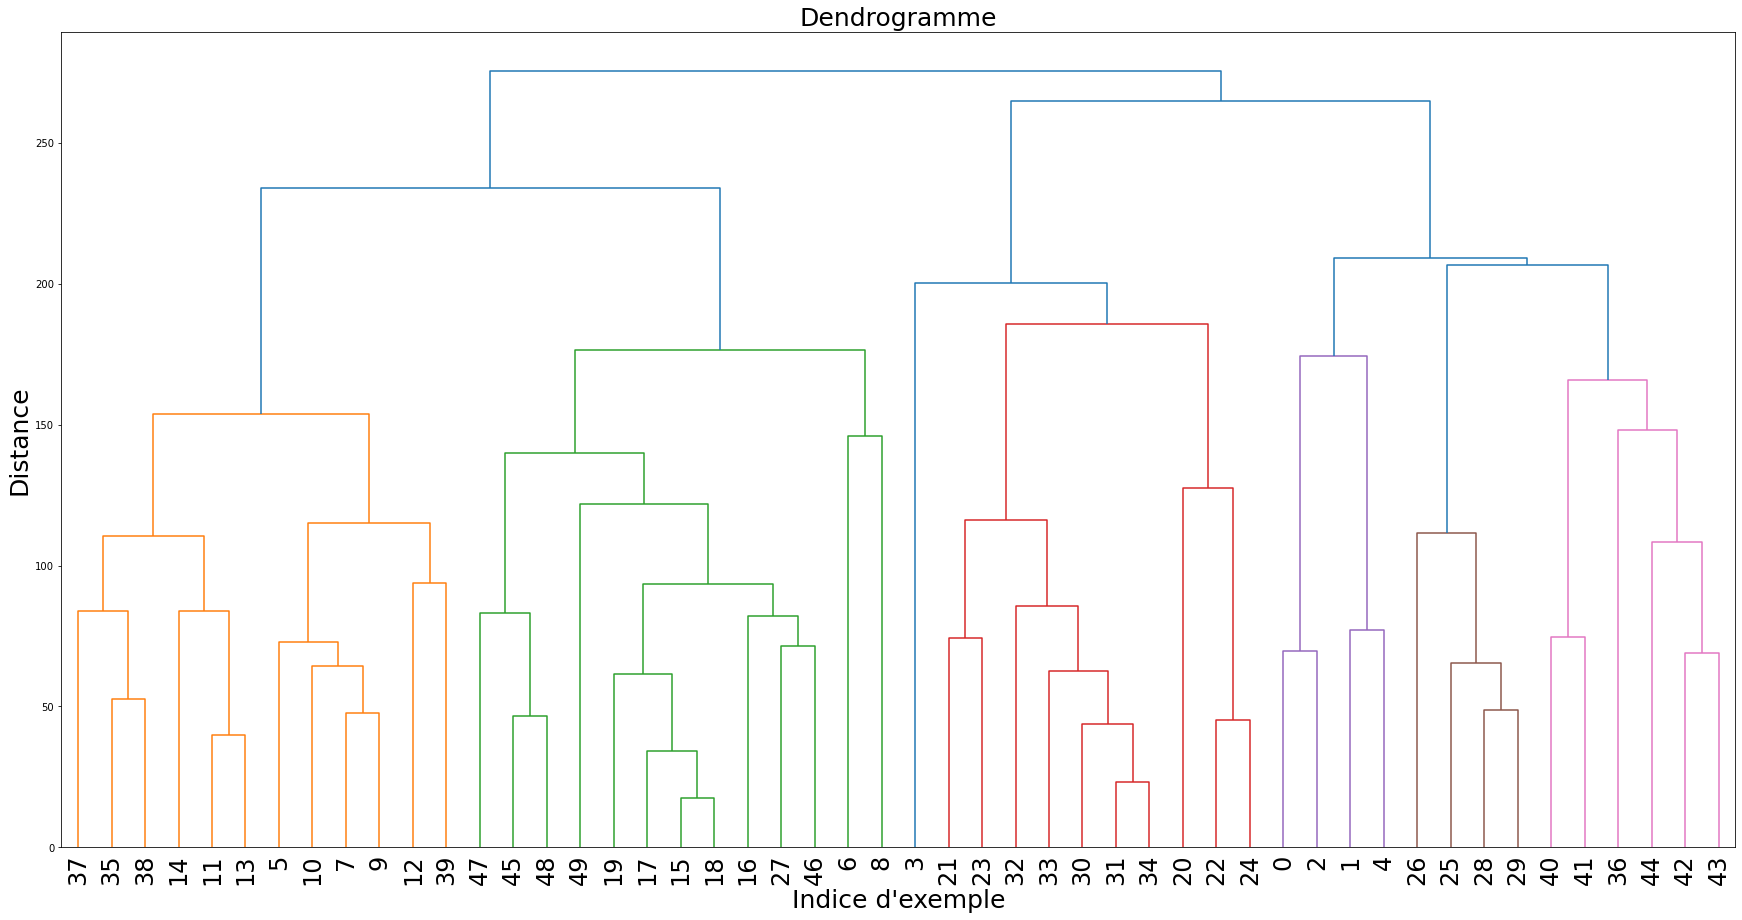

Clustering réalisé en : 7.1214 secondes.
Groupes résultants avec 10 clusters :
{7: [0, 1, 2, 3, 4, 40], 3: [5, 15, 16, 17, 18, 19, 26, 38, 48, 49], 4: [6, 7, 9], 2: [8, 10, 11, 12, 13, 14, 35, 36, 37, 39], 6: [20, 22, 46], 1: [21, 23, 24, 25, 30, 31, 32, 33, 34], 9: [27, 28], 8: [29, 43, 44], 10: [41, 42], 5: [45, 47]}


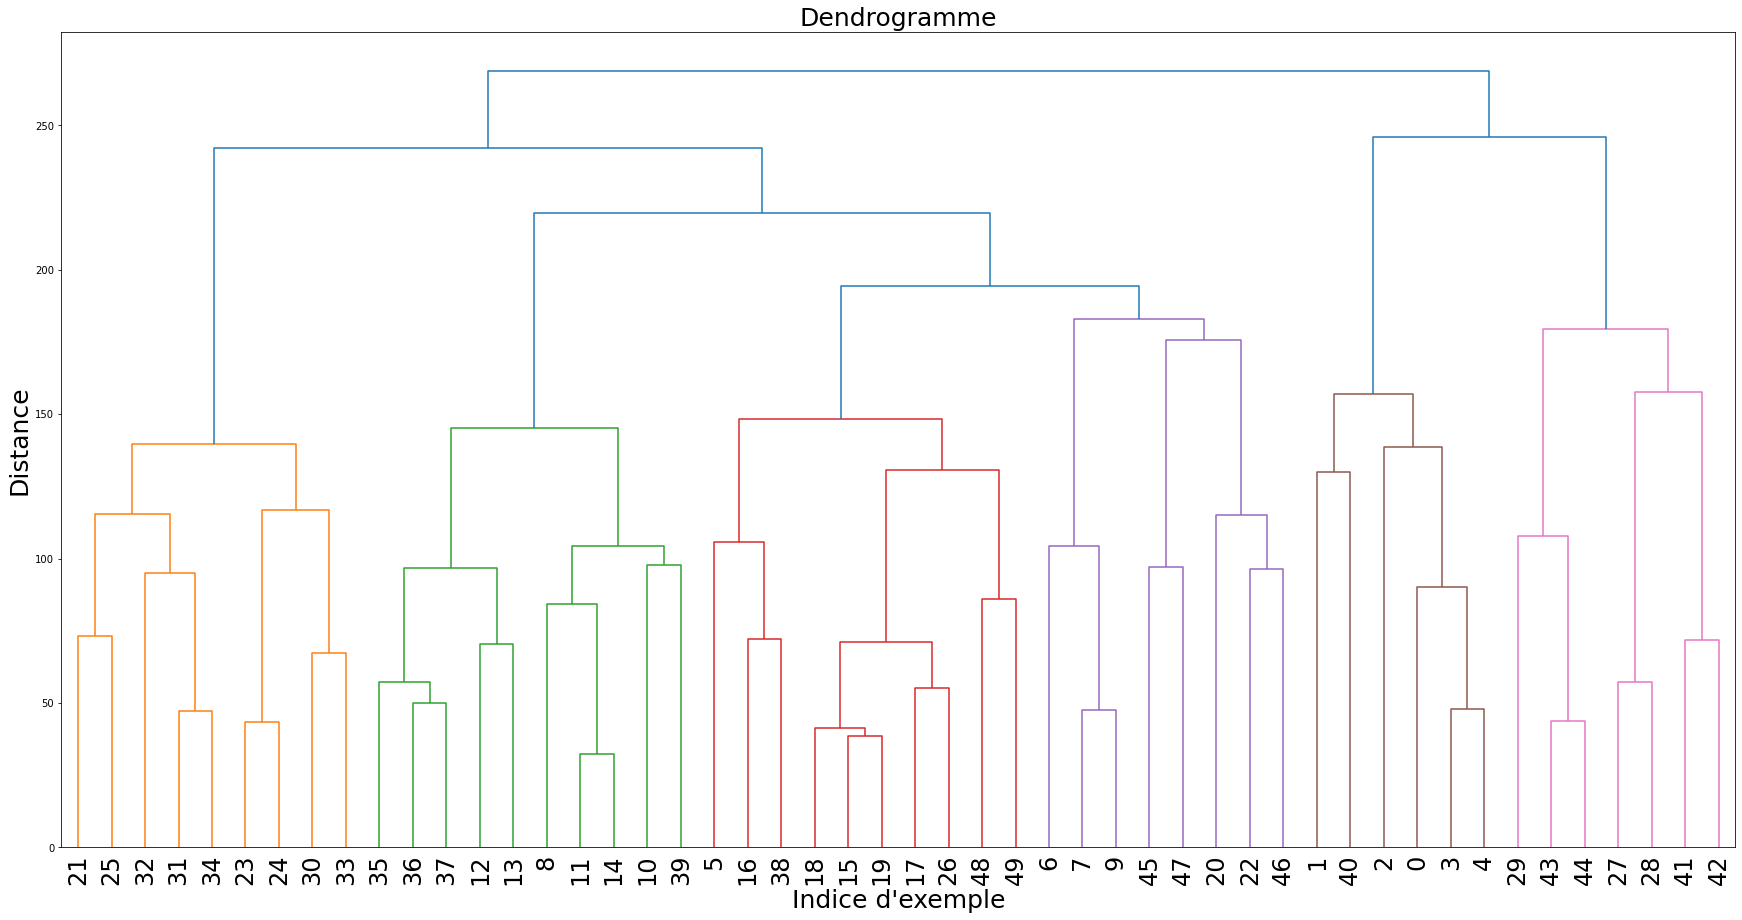

Clustering réalisé en : 6.9987 secondes.
Groupes résultants avec 10 clusters :
{3: [0, 1, 3], 4: [2, 4, 20, 21, 22, 23, 24], 10: [5, 6, 7, 8, 38, 46], 7: [9], 8: [10, 11, 12, 13, 14, 35, 36, 37, 39, 42], 5: [15, 16, 17, 18, 19, 40], 6: [25, 26, 30, 31, 32, 33, 34, 47, 48], 1: [27, 28, 29], 2: [41, 43, 44], 9: [45, 49]}


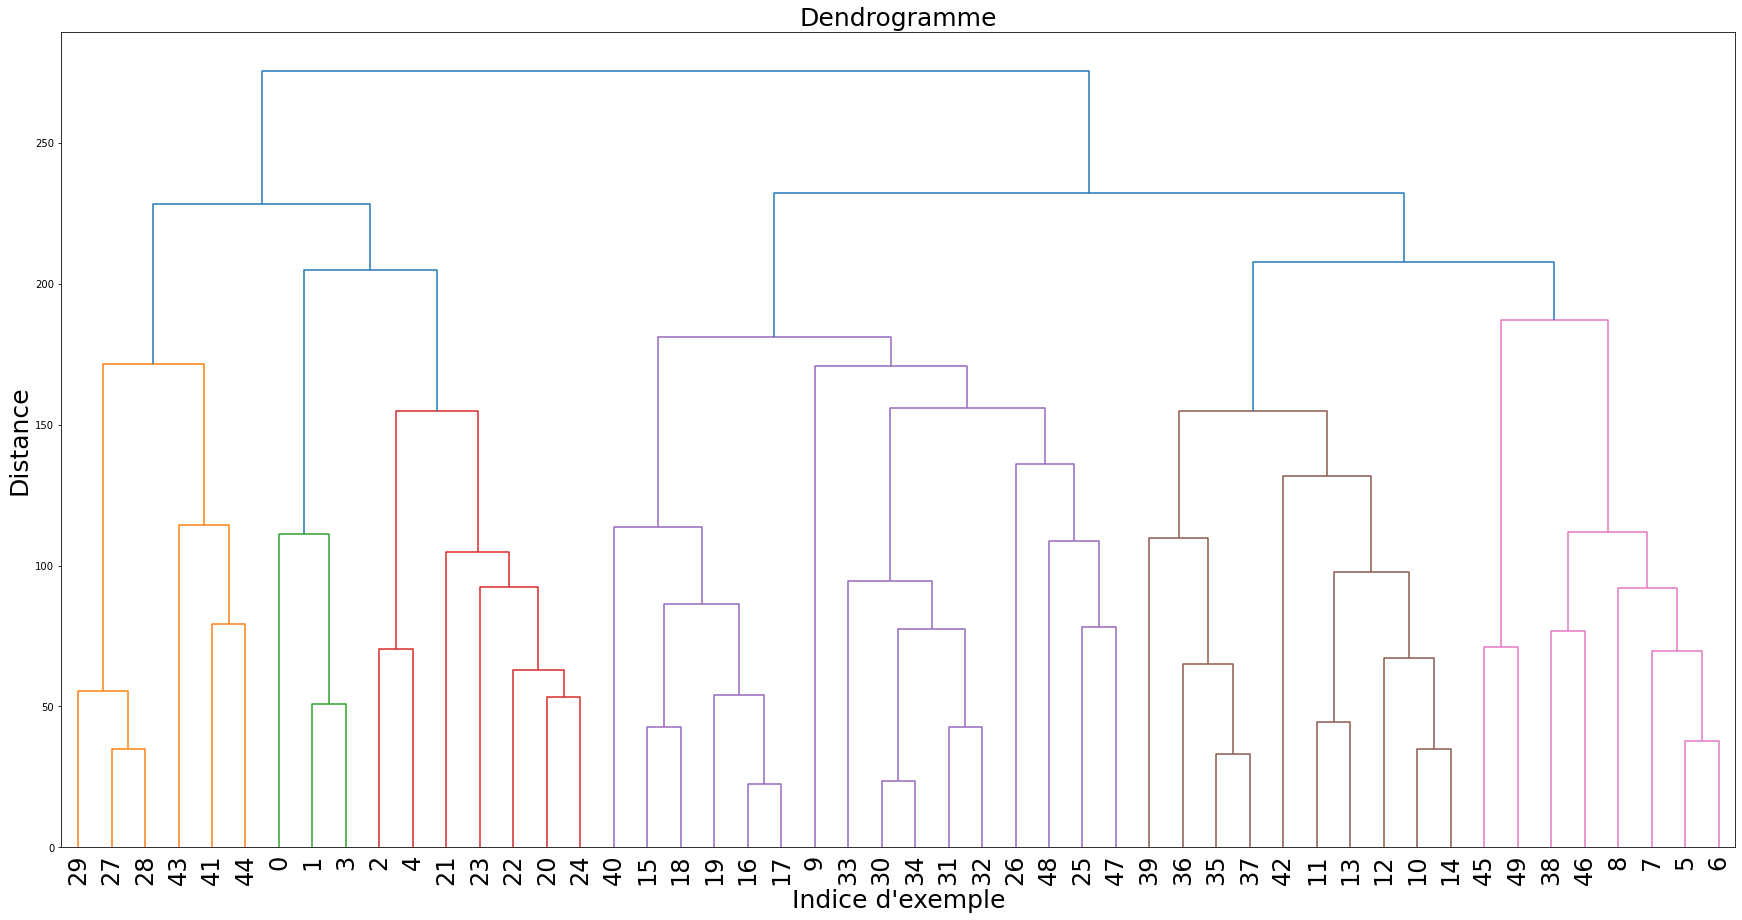

Clustering réalisé en : 7.1505 secondes.


In [50]:
liste_clust_complete = []

for i in range (10) : 
    Xpartitionne_elt, _ = liste_X_ypartitionne[i]
    
    tic = time.time()  # On lance le chrono
    _,clusters = clust.CHA_complete10(Xpartitionne_elt, verbose=False,dendrogramme=True)
    toc = time.time()  # On arrête le chrono

    tempsComplete = toc-tic
    
    liste_clust_complete.append(clusters)

    print(f'Clustering réalisé en : {(toc-tic):0.4f} secondes.')

In [51]:
# INDICE DE DUNN MOYEN

liste_dunn_index_complete = []

for i in range (n) : 
    Xpartitionne_elt, _ = liste_X_ypartitionne[i]
    
    dunn_index_complete = Dunn(np.array(Xpartitionne_elt), liste_clust_complete[i])

    print("indice de Dunn ", i, ": ", dunn_index_complete)
    
    liste_dunn_index_complete.append(dunn_index_complete)
    
mean_dunn_index_complete = np.mean(liste_dunn_index_complete)

print("dunn moyen : ", mean_dunn_index_complete)

indice de Dunn  0 :  0.4029602651072844
indice de Dunn  1 :  0.4852546915848334
indice de Dunn  2 :  0.29208267697052986
indice de Dunn  3 :  0.4951394441817435
indice de Dunn  4 :  0.44626676065781873
indice de Dunn  5 :  0.4182259982503164
indice de Dunn  6 :  0.4219924523328364
indice de Dunn  7 :  0.49715618376968007
indice de Dunn  8 :  0.5150767235832784
indice de Dunn  9 :  0.43607539063869055
dunn moyen :  0.4410230587077012


In [52]:
# EVALUATION DE L'ATTRIBUTION DES CLUSTERS

liste_nouveau_dict = []
liste_precisionComplete = []
liste_rappelComplete = []
liste_F1_Complete = []
liste_accuracyComplete = []

for i in range (n) : 
    
    Xpartitionne_elt, ypartitionne_elt = liste_X_ypartitionne[i]

    nouveau_dict = key_clust(liste_clust_complete[i], ypartitionne_elt)

    precisionComplete = precision_clusters(nouveau_dict, ypartitionne_elt)
    rappelComplete = rappel_clusters(nouveau_dict, ypartitionne_elt)
    F1_Complete = scoreF1(nouveau_dict, ypartitionne_elt)
    accuracyComplete = accuracy(ypartitionne_elt, nouveau_dict)
    
    liste_nouveau_dict.append(nouveau_dict)
    liste_precisionComplete.append(precisionComplete)
    liste_rappelComplete.append(rappelComplete)
    liste_F1_Complete.append(F1_Complete)
    liste_accuracyComplete.append(accuracyComplete)
    
    print("################# pour le clustering ", i, " #################")
    print()
    print("labels prédits sur les clusters : ", nouveau_dict)
    print()
    print("précision : ", precisionComplete)
    print()
    print("rappel : ", rappelComplete)
    print()
    print("scoreF1 : ", F1_Complete)
    print()
    print("accuracy : ",accuracyComplete)
    
mean_accuracyComplete = np.mean(liste_accuracyComplete)

print("********************* accuracy moyenne : ", mean_accuracyComplete, " *********************")

################# pour le clustering  0  #################

labels prédits sur les clusters :  {0: [1, 3], 2: [5, 6, 7, 9, 10, 11, 12, 13, 14], 1: [8, 44, 45], 3: [15, 16, 18, 19, 46, 47, 49], 5: [26, 27, 41, 43], 4: [20, 21, 22, 23, 24], 6: [28, 30, 31, 32, 33, 34], 7: [35, 36, 38, 39]}

précision :  {0: (2, 1.0), 2: (5, 0.5555555555555556), 1: (1, 0.3333333333333333), 3: (4, 0.5714285714285714), 5: (2, 0.5), 4: (5, 1.0), 6: (5, 0.8333333333333334), 7: (4, 1.0)}

rappel :  {0: (2, 0.4), 2: (5, 1.0), 1: (1, 0.2), 3: (4, 0.8), 5: (2, 0.4), 4: (5, 1.0), 6: (5, 1.0), 7: (4, 0.8)}

scoreF1 :  {0: 0.5714285714285715, 2: 0.7142857142857143, 1: 0.25, 3: 0.6666666666666666, 5: 0.4444444444444445, 4: 1.0, 6: 0.9090909090909091, 7: 0.888888888888889}

accuracy :  0.56
################# pour le clustering  1  #################

labels prédits sur les clusters :  {0: [4], 1: [5, 6, 7, 8, 35], 2: [9, 10, 11, 12, 13, 14, 36, 37, 38, 39], 3: [15, 16, 17, 18, 19, 27, 29, 45], 4: [20, 21, 22, 23, 24, 4

#### CHA Average

Groupes résultants avec 10 clusters :
{2: [0, 2, 4, 40, 42], 10: [1], 3: [3], 4: [5, 6, 7, 9, 10, 11, 12, 13, 14, 35, 36, 38, 39], 6: [8, 44, 45], 8: [15, 16, 17, 18, 19, 25, 29, 37, 48], 9: [20, 21, 22, 24], 7: [23, 46, 47, 49], 1: [26, 27, 41, 43], 5: [28, 30, 31, 32, 33, 34]}


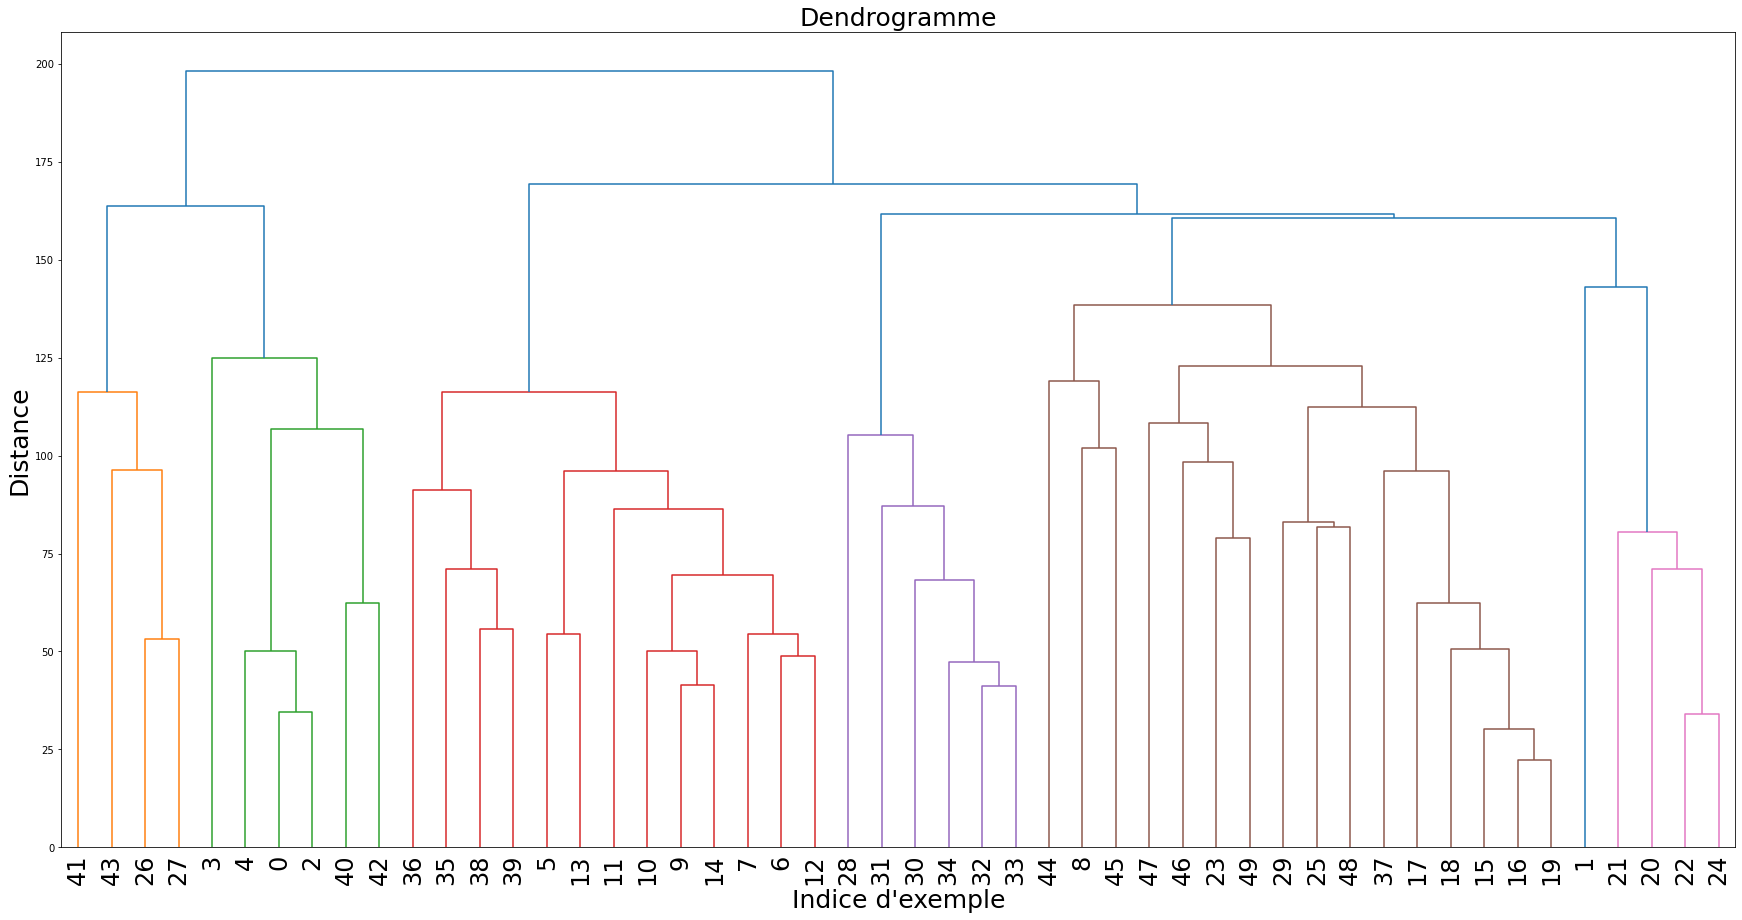

Clustering réalisé en : 6.9935 secondes.
Groupes résultants avec 10 clusters :
{1: [0, 1, 2, 3], 3: [4], 7: [5, 6, 7, 8, 35], 4: [9, 10, 11, 12, 13, 14, 36, 37, 38, 39], 8: [15, 16, 17, 18, 19, 26, 27, 29, 45, 47, 48, 49], 10: [20, 21, 22, 23, 24, 46], 5: [25, 28], 9: [30, 31, 32, 33, 34], 6: [40, 41, 43, 44], 2: [42]}


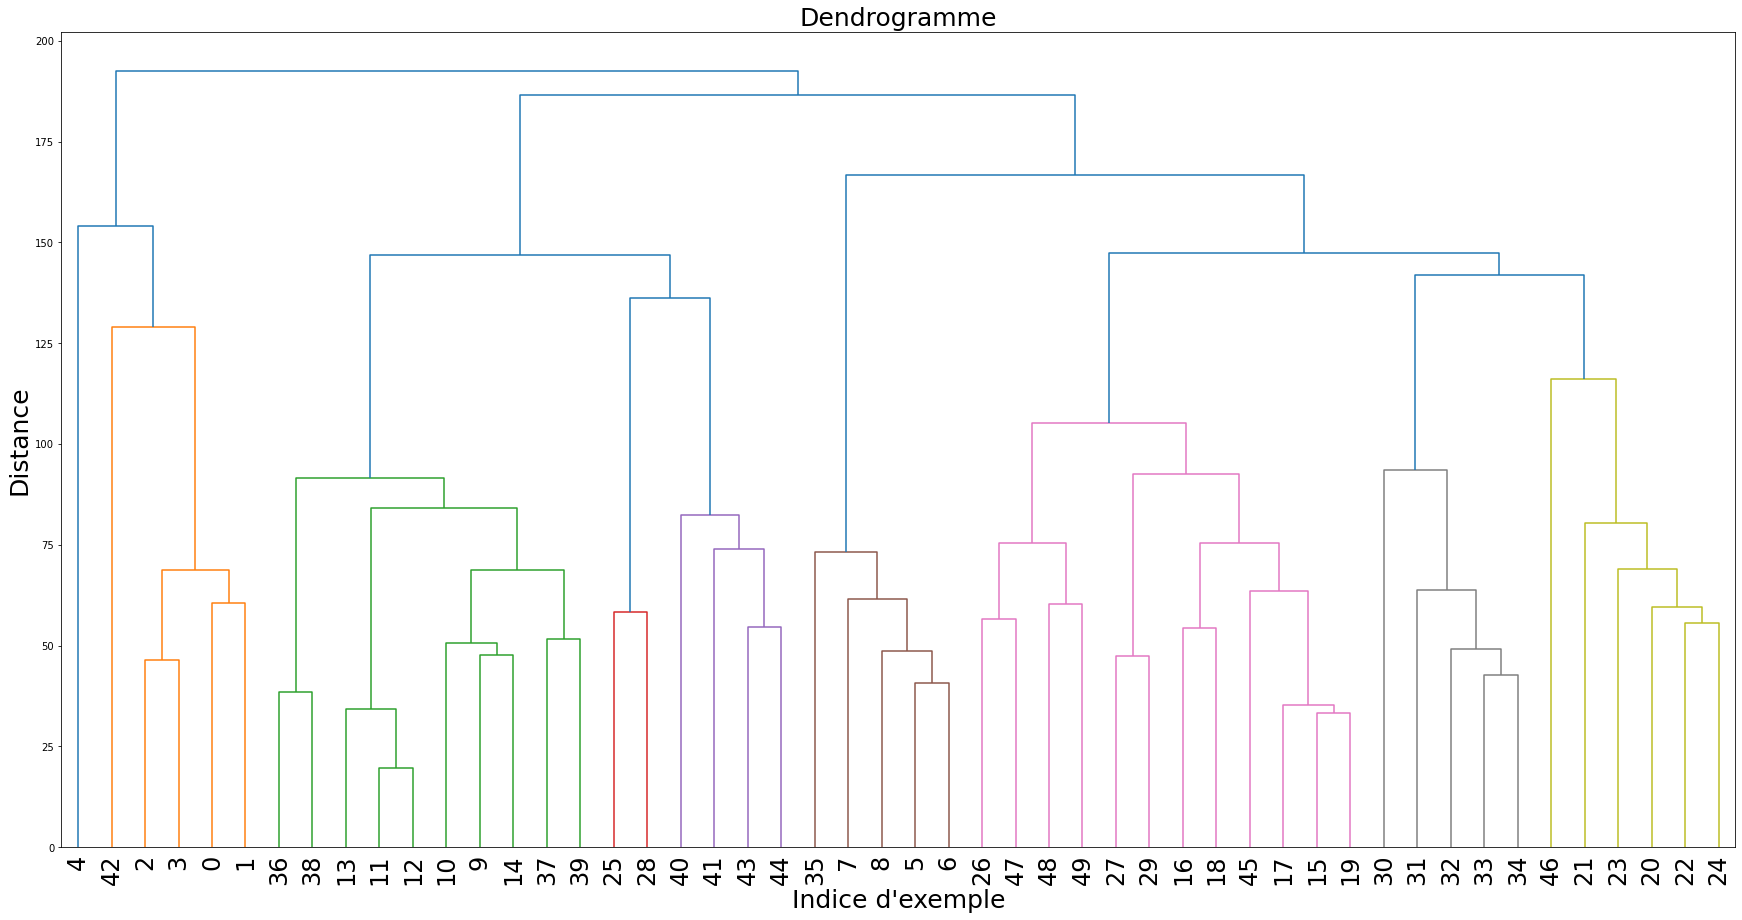

Clustering réalisé en : 6.9467 secondes.
Groupes résultants avec 10 clusters :
{1: [0, 1, 2, 3], 8: [4], 5: [5, 9, 10, 11, 12, 13, 14, 35, 36, 37, 38, 39, 42], 4: [6, 7], 9: [8, 15, 16, 17, 18, 19, 25, 27, 28, 29, 45, 46, 47, 48, 49], 10: [20, 21, 22, 23, 24], 3: [26], 6: [30, 31, 32, 33, 34], 7: [40], 2: [41, 43, 44]}


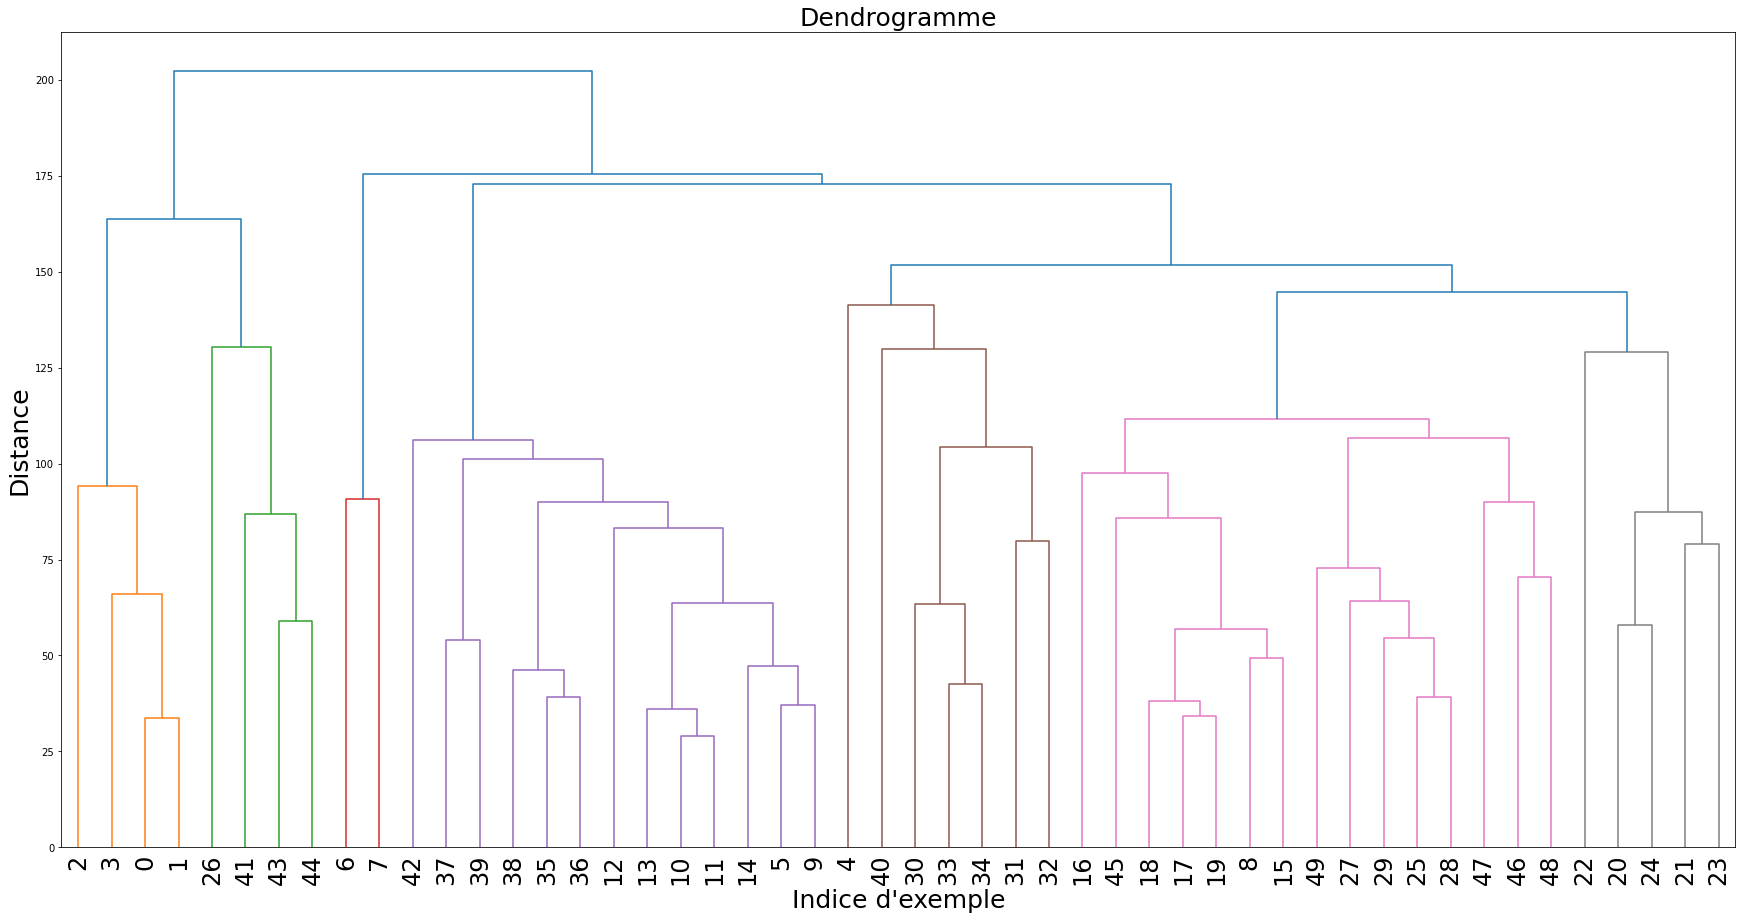

Clustering réalisé en : 7.0917 secondes.
Groupes résultants avec 10 clusters :
{2: [0, 1, 2], 1: [3, 4], 5: [5, 10, 11, 12, 13, 14, 35, 36], 8: [6, 7, 8], 7: [9, 26, 29, 30, 31, 32, 33, 34], 10: [15, 16, 17, 18, 19, 20, 45, 46, 47, 48, 49], 9: [21, 22, 23, 24], 4: [25, 27, 28, 37, 38, 39, 40, 42], 3: [41, 44], 6: [43]}


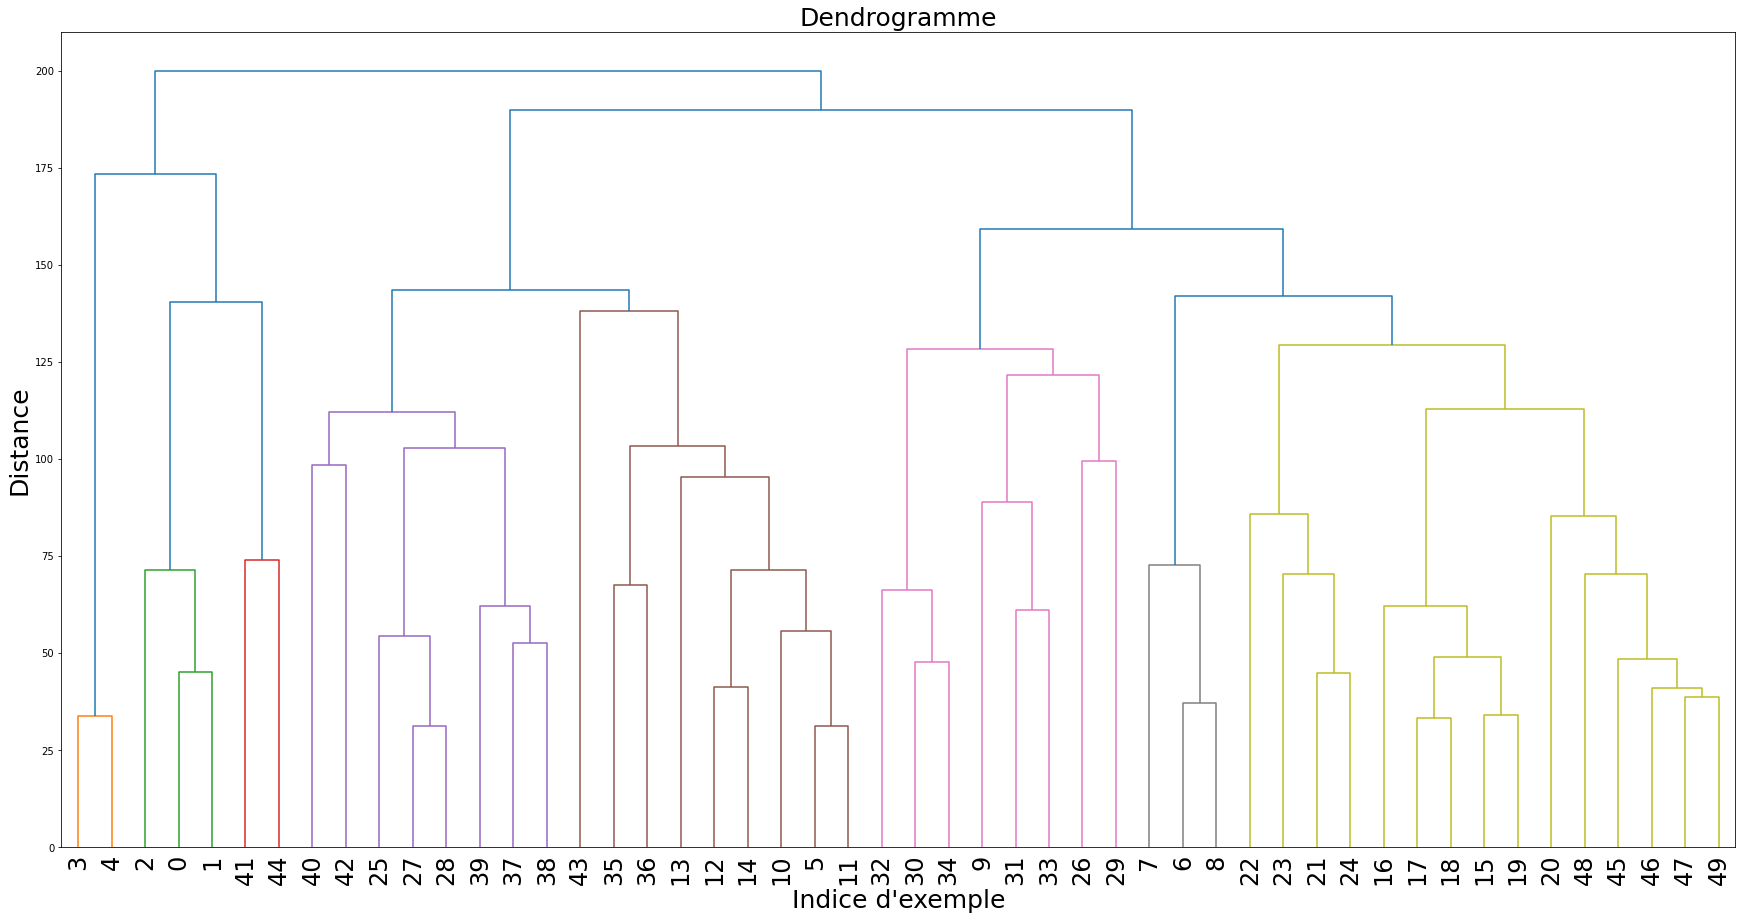

Clustering réalisé en : 6.9037 secondes.
Groupes résultants avec 10 clusters :
{6: [0, 43], 8: [1, 2, 3, 4], 2: [5, 6, 7, 8, 15, 16, 17, 18, 19, 25, 45, 47], 1: [9, 10, 11, 12, 13, 14, 35, 36, 37, 38, 39], 5: [20, 21, 22, 23, 24, 49], 4: [26, 30, 31, 32, 33, 34], 7: [27, 28, 29, 40, 41, 44], 9: [42], 3: [46], 10: [48]}


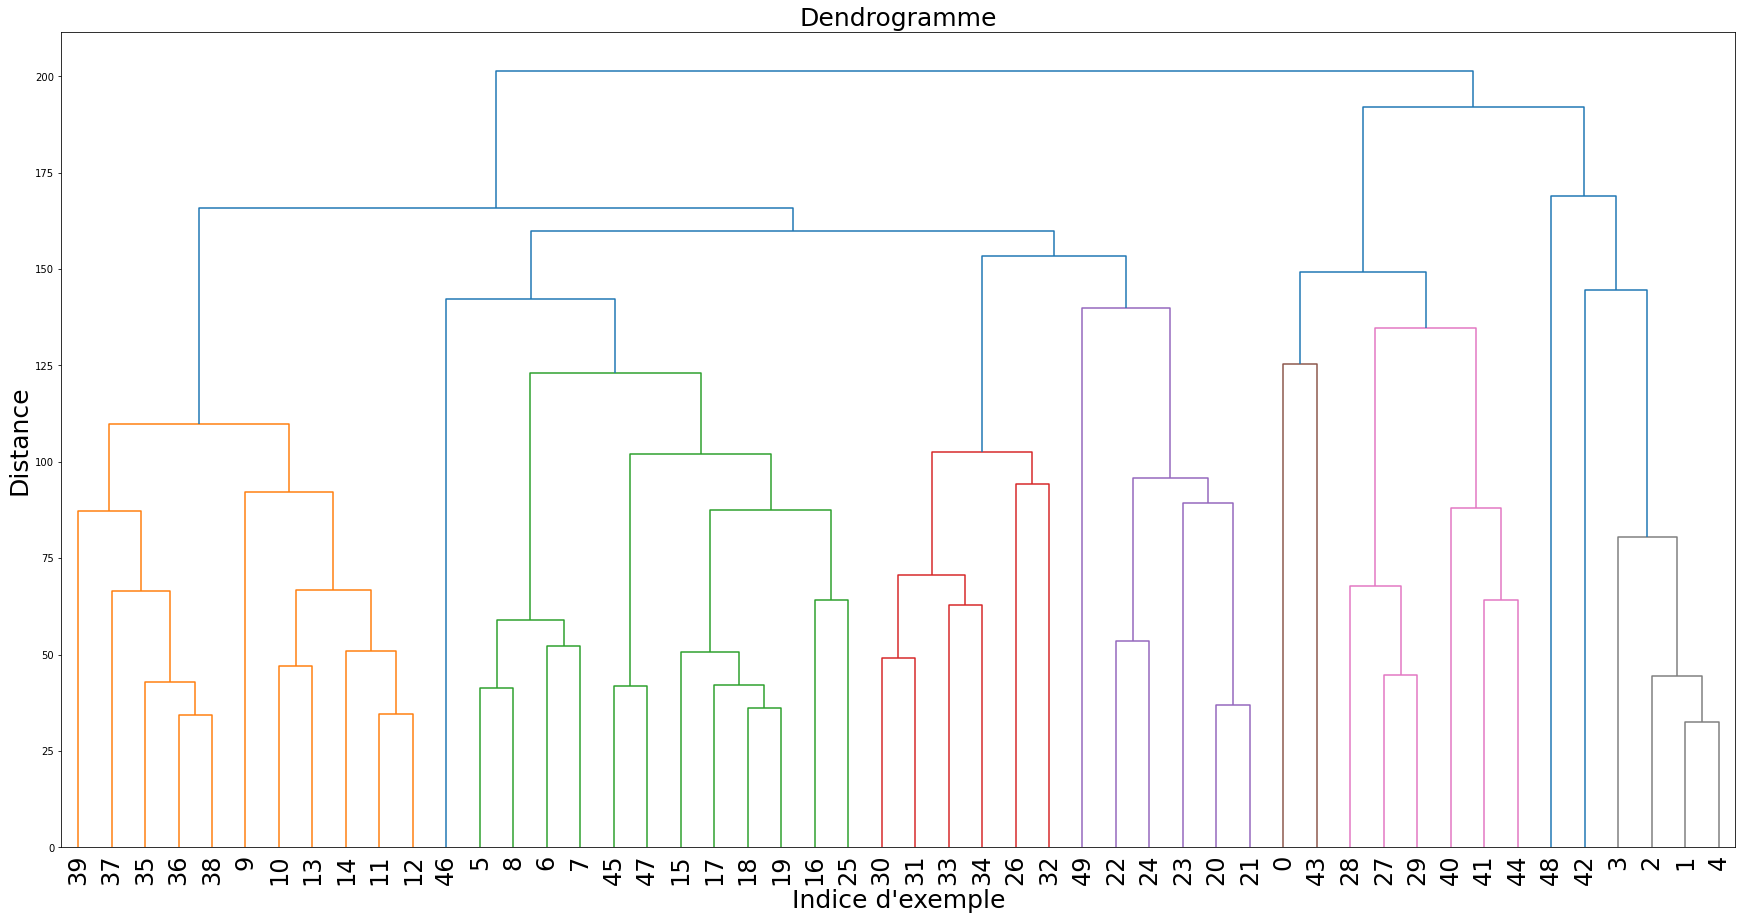

Clustering réalisé en : 7.1382 secondes.
Groupes résultants avec 10 clusters :
{9: [0, 42], 2: [1, 2, 3, 4], 4: [5, 6, 9, 46], 8: [7, 8, 15, 16, 17, 18, 19, 27, 28, 29, 48, 49], 10: [10, 11, 12, 13, 14, 35, 36, 37, 38, 39], 6: [20, 21, 22, 23, 24, 47], 1: [25, 26], 7: [30, 31, 32, 33, 34], 3: [40, 41, 43, 44], 5: [45]}


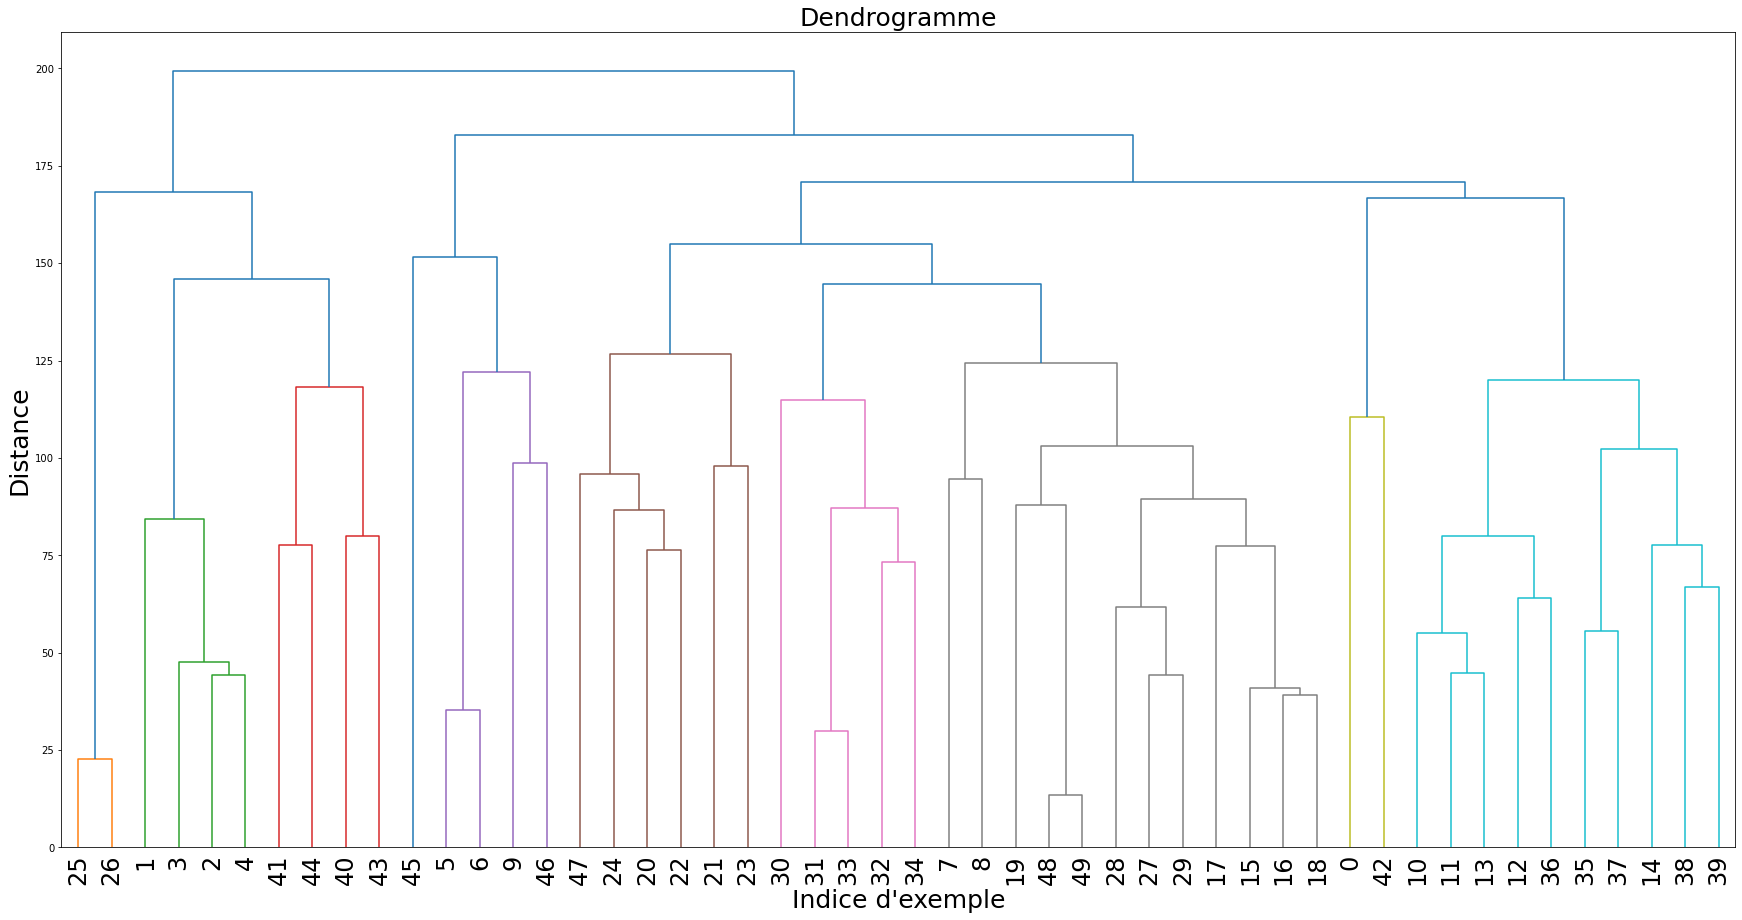

Clustering réalisé en : 6.8363 secondes.
Groupes résultants avec 10 clusters :
{2: [0, 1, 3, 4, 30, 31], 3: [2], 10: [5], 7: [6, 7, 9, 15, 16, 17, 18, 19, 39, 45, 46, 47, 48], 4: [8, 10, 11, 12, 13, 14, 35, 36, 37, 38, 40], 8: [20, 21, 22, 23, 24], 1: [25, 26, 27, 28, 29, 43], 5: [32, 33, 34], 6: [41, 42, 44], 9: [49]}


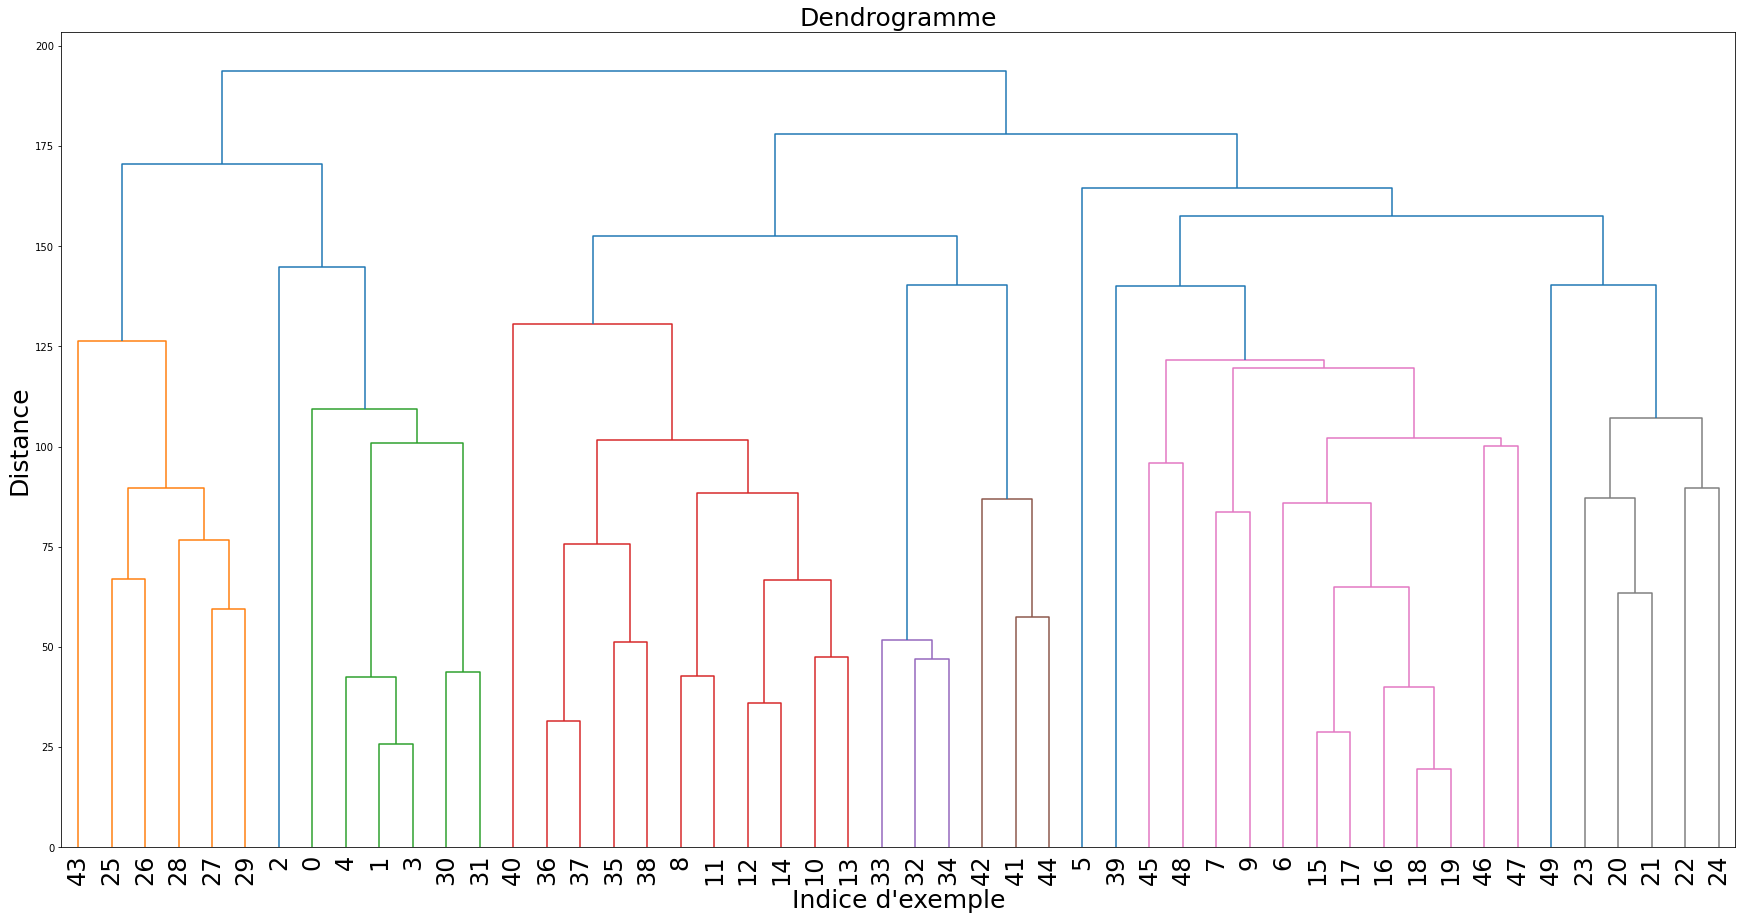

Clustering réalisé en : 7.0880 secondes.
Groupes résultants avec 10 clusters :
{1: [0, 1, 2, 4], 10: [3], 4: [5, 7, 9, 10, 11, 12, 13, 14, 35, 37, 38, 39], 8: [6, 15, 16, 17, 18, 19, 27, 45, 46, 47, 48, 49], 9: [8], 5: [20, 22, 24], 6: [21, 23, 30, 31, 32, 33, 34], 2: [25, 26, 28, 29], 7: [36], 3: [40, 41, 42, 43, 44]}


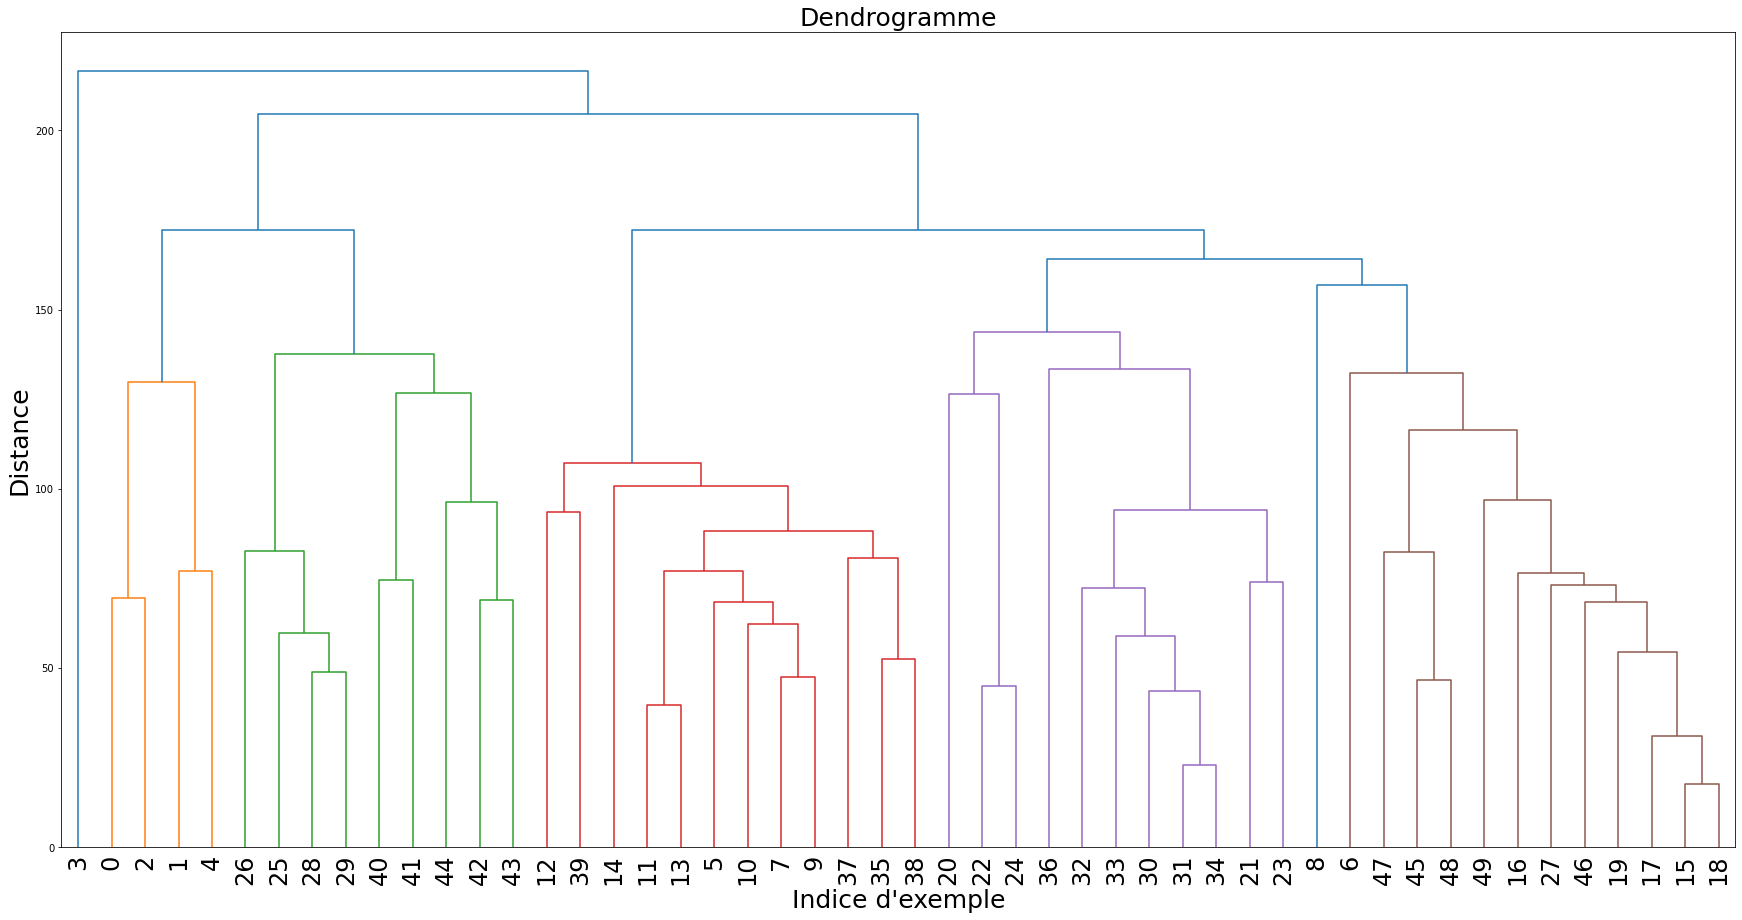

Clustering réalisé en : 6.9322 secondes.
Groupes résultants avec 10 clusters :
{3: [0, 1, 2, 3, 4], 7: [5, 6, 7, 9, 15, 16, 17, 18, 19, 26, 38, 48, 49], 6: [8, 10, 11, 12, 13, 14, 35, 36, 37, 39], 10: [20, 22, 46], 8: [21, 23, 24, 25, 30, 31, 32, 33, 34], 1: [27, 28], 2: [29, 43, 44], 4: [40], 5: [41, 42], 9: [45, 47]}


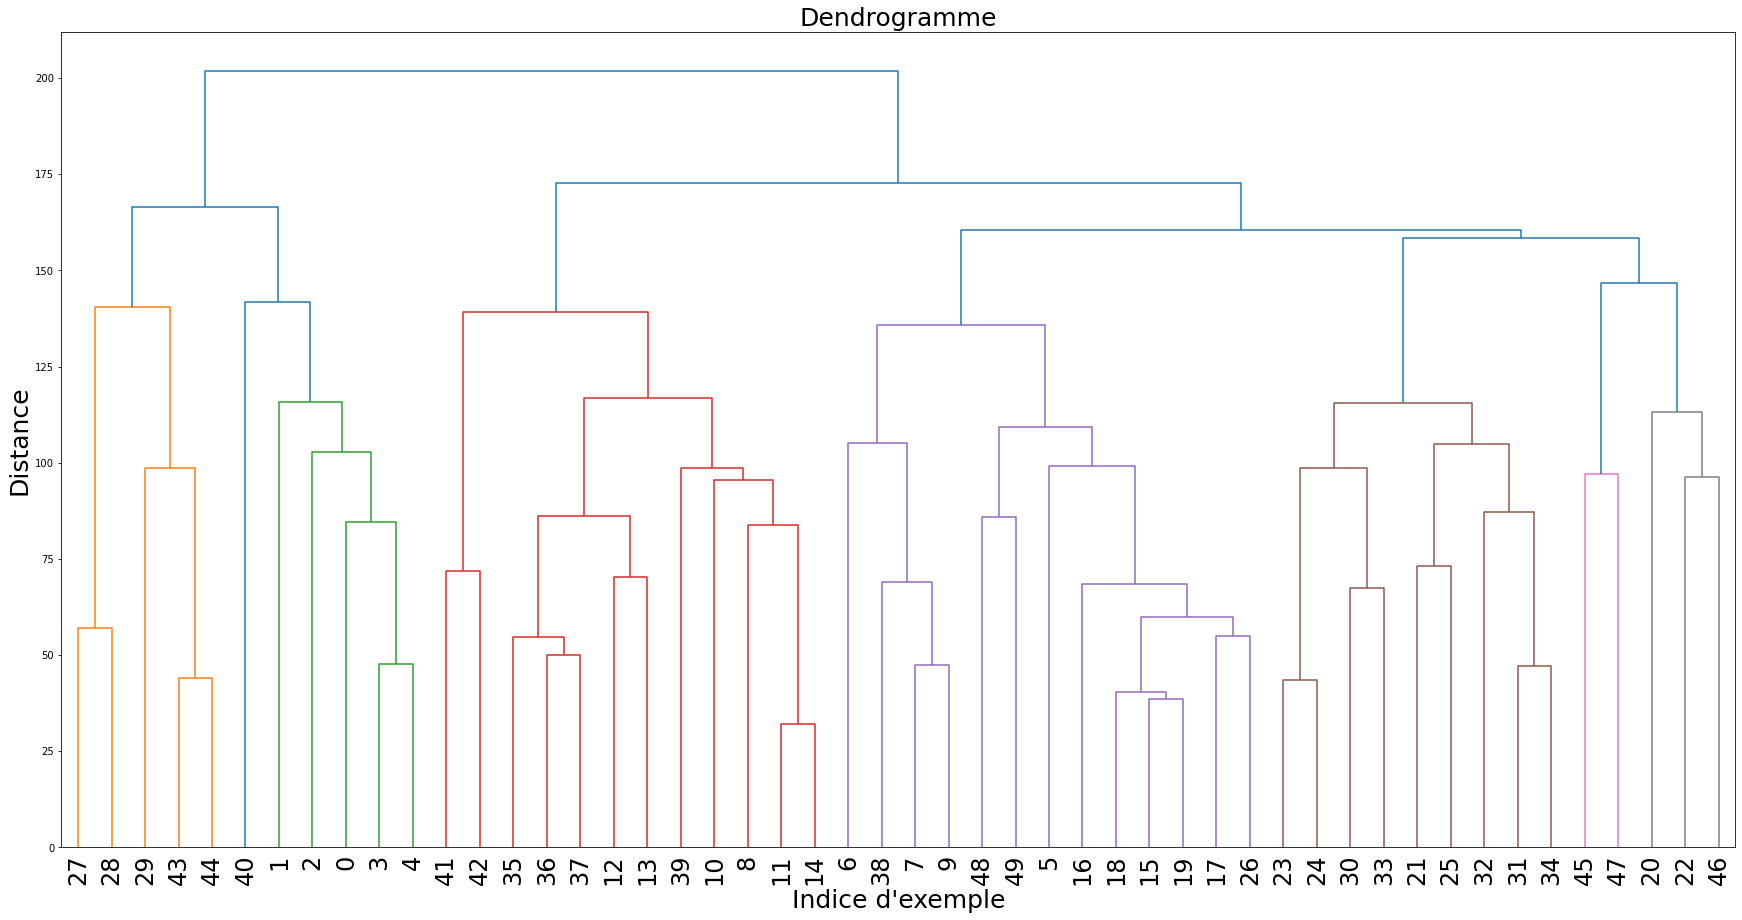

Clustering réalisé en : 6.8827 secondes.
Groupes résultants avec 10 clusters :
{7: [0, 1, 3], 8: [2, 4], 5: [5, 6, 7, 8, 38, 46], 3: [9], 2: [10, 11, 12, 13, 14, 35, 36, 37, 39, 42], 6: [15, 16, 17, 18, 19, 25, 26, 40, 47, 48], 10: [20, 21, 22, 23, 24], 1: [27, 28, 29, 41, 43, 44], 9: [30, 31, 32, 33, 34], 4: [45, 49]}


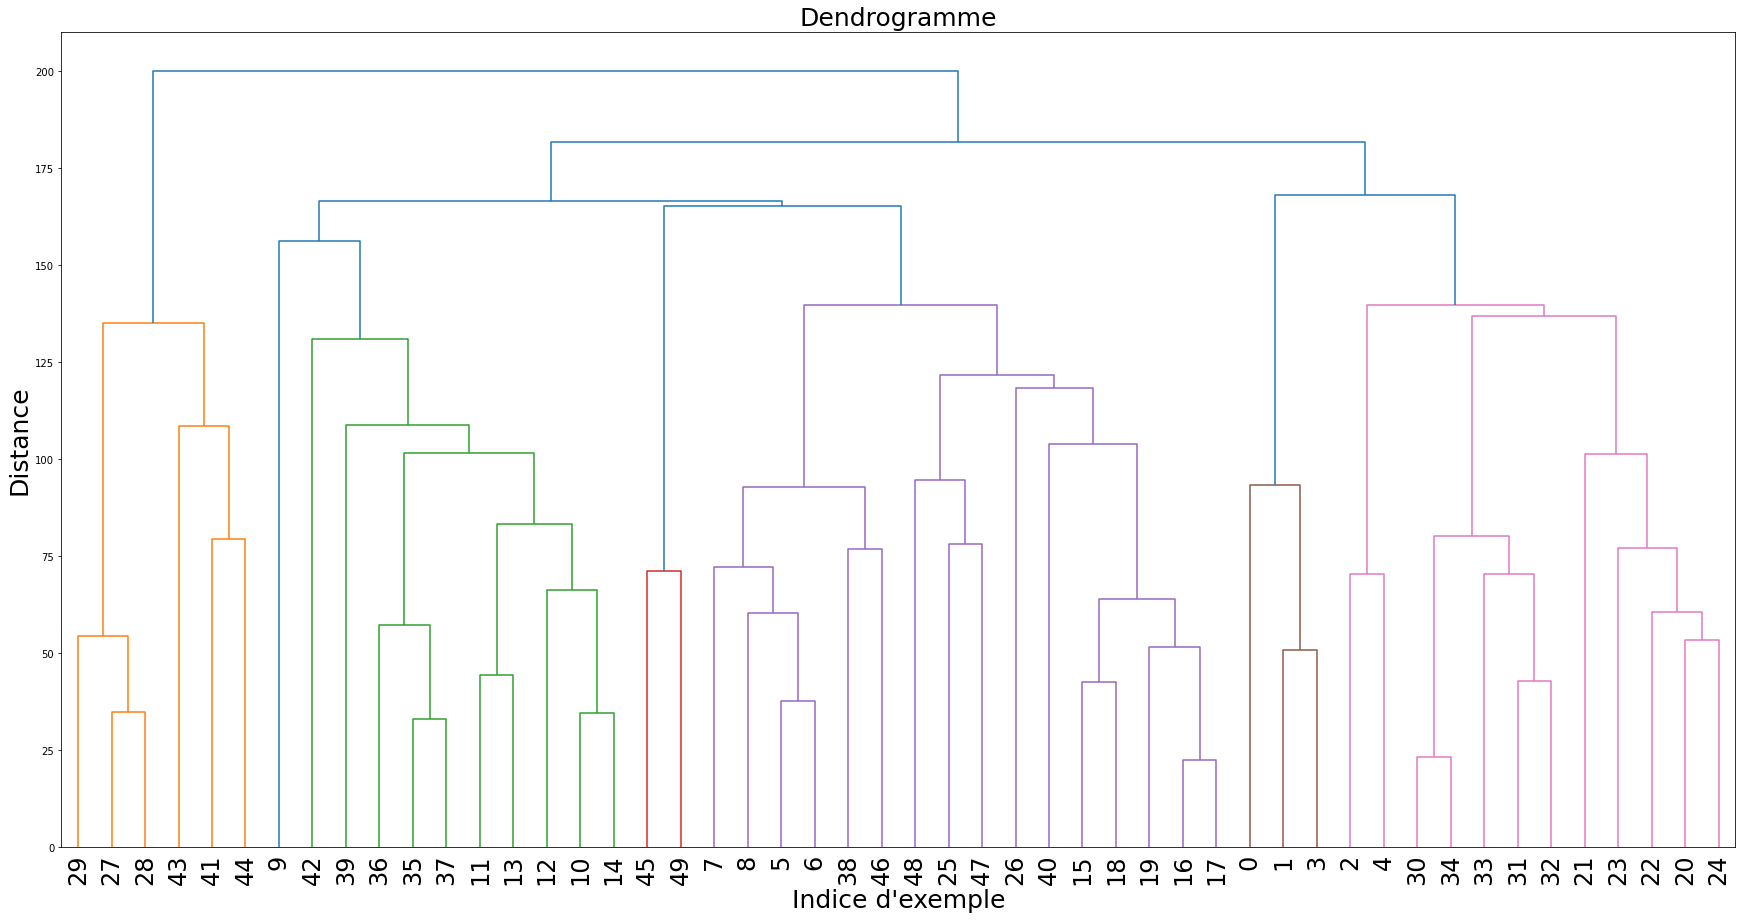

Clustering réalisé en : 7.2721 secondes.


In [53]:
liste_clust_average = []

for i in range (10) : 
    Xpartitionne_elt, _ = liste_X_ypartitionne[i]
    
    tic = time.time()  # On lance le chrono
    _,clusters = clust.CHA_average10(Xpartitionne_elt, verbose=False,dendrogramme=True)
    toc = time.time()  # On arrête le chrono

    tempsComplete = toc-tic
    
    liste_clust_average.append(clusters)

    print(f'Clustering réalisé en : {(toc-tic):0.4f} secondes.')

In [54]:
# INDICE DE DUNN MOYEN

liste_dunn_index_average = []

for i in range (n) : 
    Xpartitionne_elt, _ = liste_X_ypartitionne[i]
    
    dunn_index_average = Dunn(np.array(Xpartitionne_elt), liste_clust_average[i])

    print("indice de Dunn ", i, ": ", dunn_index_average)
    
    liste_dunn_index_average.append(dunn_index_average)
    
mean_dunn_index_average = np.mean(liste_dunn_index_average)

print("dunn moyen : ", mean_dunn_index_average)

indice de Dunn  0 :  0.35688540412221353
indice de Dunn  1 :  0.5530348426373644
indice de Dunn  2 :  0.4223633973897246
indice de Dunn  3 :  0.48225572612046463
indice de Dunn  4 :  0.46865847224581303
indice de Dunn  5 :  0.4717007151385044
indice de Dunn  6 :  0.442492820031073
indice de Dunn  7 :  0.4570222539614438
indice de Dunn  8 :  0.4123581822592199
indice de Dunn  9 :  0.47966382430192395
dunn moyen :  0.45464356382077453


In [55]:
# EVALUATION DE L'ATTRIBUTION DES CLUSTERS

liste_nouveau_dict = []
liste_precisionAverage = []
liste_rappelAverage = []
liste_F1_Average = []
liste_accuracyAverage = []

for i in range (n) : 
    
    Xpartitionne_elt, ypartitionne_elt = liste_X_ypartitionne[i]

    nouveau_dict = key_clust(liste_clust_average[i], ypartitionne_elt)

    precisionAverage = precision_clusters(nouveau_dict, ypartitionne_elt)
    rappelAverage = rappel_clusters(nouveau_dict, ypartitionne_elt)
    F1_Average = scoreF1(nouveau_dict, ypartitionne_elt)
    accuracyAverage = accuracy(ypartitionne_elt, nouveau_dict)
    
    liste_nouveau_dict.append(nouveau_dict)
    liste_precisionAverage.append(precisionAverage)
    liste_rappelAverage.append(rappelAverage)
    liste_F1_Average.append(F1_Average)
    liste_accuracyAverage.append(accuracyAverage)
    
    print("################# pour le clustering ", i, " #################")
    print()
    print("labels prédits sur les clusters : ", nouveau_dict)
    print()
    print("précision : ", precisionAverage)
    print()
    print("rappel : ", rappelAverage)
    print()
    print("scoreF1 : ", F1_Average)
    print()
    print("accuracy : ",accuracyAverage)
    
mean_accuracyAverage = np.mean(liste_accuracyAverage)

print("********************* accuracy moyenne : ", mean_accuracyAverage, " *********************")

################# pour le clustering  0  #################

labels prédits sur les clusters :  {0: [3], 2: [5, 6, 7, 9, 10, 11, 12, 13, 14, 35, 36, 38, 39], 1: [8, 44, 45], 3: [15, 16, 17, 18, 19, 25, 29, 37, 48], 4: [20, 21, 22, 24], 9: [23, 46, 47, 49], 5: [26, 27, 41, 43], 6: [28, 30, 31, 32, 33, 34]}

précision :  {0: (1, 1.0), 2: (5, 0.38461538461538464), 1: (1, 0.3333333333333333), 3: (5, 0.5555555555555556), 4: (4, 1.0), 9: (3, 0.75), 5: (2, 0.5), 6: (5, 0.8333333333333334)}

rappel :  {0: (1, 0.2), 2: (5, 1.0), 1: (1, 0.2), 3: (5, 1.0), 4: (4, 0.8), 9: (3, 0.6), 5: (2, 0.4), 6: (5, 1.0)}

scoreF1 :  {0: 0.33333333333333337, 2: 0.5555555555555556, 1: 0.25, 3: 0.7142857142857143, 4: 0.888888888888889, 9: 0.6666666666666665, 5: 0.4444444444444445, 6: 0.9090909090909091}

accuracy :  0.52
################# pour le clustering  1  #################

labels prédits sur les clusters :  {0: [4], 1: [5, 6, 7, 8, 35], 2: [9, 10, 11, 12, 13, 14, 36, 37, 38, 39], 3: [15, 16, 17, 18, 19, 26,

### Comparaison globale

#### Indice de Dunn

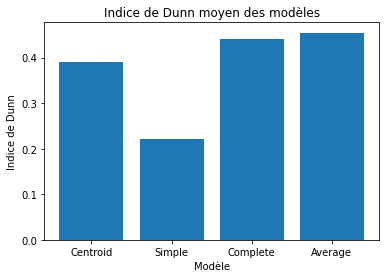

In [56]:
# Histogramme avec les 4 modèles
modeles = ['Centroid', 'Simple', 'Complete', 'Average']
liste_dunn = [mean_dunn_index_centroid, mean_dunn_index_simple, mean_dunn_index_complete, mean_dunn_index_average]  # Valeurs associées à chaque catégorie

# Création de l'histogramme
plt.bar(modeles, liste_dunn)

# Ajout de labels et de titres
plt.xlabel('Modèle')
plt.ylabel('Indice de Dunn')
plt.title("Indice de Dunn moyen des modèles")

# Affichage de l'histogramme
plt.show()

#### Accuracy des clusters

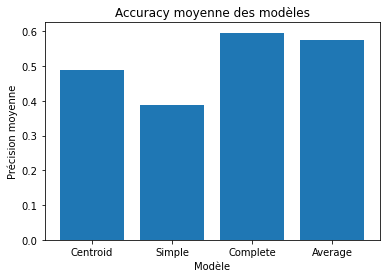

In [57]:
# Histogramme avec les 4 modèles
modeles = ['Centroid', 'Simple', 'Complete', 'Average']
liste_accuracies = [mean_accuracyCentroid, mean_accuracySimple, mean_accuracyComplete, mean_accuracyAverage]  # Valeurs associées à chaque catégorie

# Création de l'histogramme
plt.bar(modeles, liste_accuracies)

# Ajout de labels et de titres
plt.xlabel('Modèle')
plt.ylabel('Précision moyenne')
plt.title("Accuracy moyenne des modèles")

# Affichage de l'histogramme
plt.show()

Observation : les indices de Dunn (moyen) et accuracies (moyen) des modèles de CHA réalisés sur 10 échantillons ne semblent pas significativement différents des valeurs mesurées précedemment avec 1 seul échatillon. 

On suppose alors qu'un échatillon de 50 écritures sur un total de 10992 est suffisant pour se faire une bonne idée de la qualité d'un clustering.

## Conclusion

### Modèle à choisir

#### CHA

Concernant l'indice de Dunn, les différents modèles de clustering ne dépassent que rarement 0,5. 

Cela signifie que les CHA ne parviennent que dans une certaine mesure à définir des clusters à la fois compacts et espacés entre eux.

Dans le contexte de chiffres manuscrits, ces résultats nous montrent que deux écritures de chiffres différents peuvent se ressembler, mais aussi que deux écritures d'un même chiffre peuvent significativement différer.

#################################################

Pour ce qui est l'accuracy, les modèles tournent autour de 0,5. 

C'est meilleur que du hasard (où on aurait environ 0,1), mais moins bon que tous les modèles d'apprentissage supervisé traités dans le TME précedent (KNN, Perceptron, Arbre de décision).

#################################################

Le CHA simple a visiblement été moins bon que les autres pour toutes les méthodes d'évaluation : indice de Dunn, accuracy, précision, rappel, score F1.

Le simple linkage n'est pas aussi pertinent que les autres type de linkage pour le dataset présent. Il fusionne deux clusters par rapport à leur points les plus proches.

Par rapport aux chiffres manuscrits, cela semble indiquer qu'il existe de nombreux exemples d'une écriture de label 'x' dont l'écriture la plus ressemblante est de label 'y/z/...' mais pas 'x'. 

Le CHA simple ne sera donc pas choisi pour la reconnaissance de chiffres manuscrits.

#### K moyennes

Pour tous les k allant de 2 à 10, l'algorithme des k moyennes a un indice de Dunn bien plus faible que les CHA.

Apparemment, il ne fait des clusters ni compact, ni espacés entre eux.

Pourtant l'accuracy des clusters obtenus quand k = 10 est supérieure aux accuracies des CHA. Malgré un clustering indiqué -à priori- de moins bonne qualité par l'indice de Dunn, le dataset a été mieux classifé.

#### Synthèse

On a établi que notre dataset d'écriture de chiffres manuscrits possède des exemples de chiffres disctincts mais qui se ressemblent ainsi que des exemples d'un même chiffre mais qui se ressemblent peu.

De ce fait, il est compliqué de constituer des clusters clairement distinguables, comme le montre l'indice de Dunn des CHA et k moyennes.

Malgré cela, k moyennes se démarque en termes d'accuracy. Les exemples évoqués plus haut peuvent être considérés comme des valeurs aberrantes. k moyennes semblent bien gérer ces valeurs aberrantes, d'où une classification plus satisfaisante que les CHA.

Dans le contexte de la reconnaissance de chiffres manuscrits, l'algorithme des k moyennes est la méthode de clustering la plus pertinente.

### Pistes d'expérimentations complémentaires

1 - Evaluer les clustering hiérarchiques sur des nombres de clusters variant. On pourrait obtenir de meilleures accuracies.

2 - Evaluer les clustering hiérarchiques et k moyennes sur davantage d'échantillons afin de s'assurer de la stabilité des clusters obtenus.